# The landscape of cancer driver genes
Landscape of all cancer driver genes detected by the method across all cohorts

In [192]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import os
import numpy as np
import warnings
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import re
from itertools import chain
from matplotlib.ticker import MaxNLocator

In [193]:
# Names and colors

colors_dic = {"Oncodrive3D" : "#ffad48", 
              "HotMAPS" : "#024b79", 
              "OncodriveCLUSTL" : "#43b7c2", 
              "smRegions" : "lightgray", 
              "CBaSE" : "lightgray", 
              "dNdScv" : "lightgray", 
              "MutPanning" : "lightgray", 
              "OncodriveFML" : "lightgray",
              "Random" : "pink"}

names_dic = {"o3d" : "Oncodrive3D", 
             "hotmaps" : "HotMAPS", 
             "clustl" : "OncodriveCLUSTL", 
             "smreg" : "smRegions", 
             "cbase" : "CBaSE", 
             "dndscv" : "dNdScv", 
             "mutpan" : "MutPanning", 
             "fml" : "OncodriveFML",
             "random" : "Random"}

In [194]:
SUBDIR = "human_mane_raw"
RUN = "run_2024-07-01_16-04-14"
# lst_methods = ["o3d", "hotmaps", "clustl", "smreg", "cbase", "seismic", "dndscv", "mutpan", "fml", "random"]
# lst_methods = ["o3d", "hotmaps", "clustl", "random"]

datasets = f"/workspace/projects/clustering_3d/o3d_analysys/datasets/"
input_path = f"{datasets}/input/cancer_202404"
cohort_df = pd.read_csv(f"{input_path}/cohorts.tsv", sep="\t")
o3d_output_dir = f"{datasets}/output/cancer_202404/o3d_output/{SUBDIR}/{RUN}"
intogen_output = f"{datasets}/output/cancer_202404/intogen_output"
genetable_path = f"/workspace/projects/clustering_3d/o3d_analysys/o3d_paper/data/results/{SUBDIR}/{RUN}.genetable.tsv"
cgc_df = pd.read_csv(f"{input_path}/CGC_list_v99.tsv", sep = "\t")
display(cgc_df)

oncokb_df = pd.read_csv(f"{input_path}/oncokb_list_20240712.tsv", sep = "\t")
oncokb_df = oncokb_df[["Hugo Symbol", "OncoKB Annotated", "MSK-IMPACT", "MSK-HEME", "FOUNDATION ONE", "FOUNDATION ONE HEME", "Vogelstein"]]
oncokb_df

Gene Symbol                                               Name  \
0          A1CF                     APOBEC1 complementation factor   
1          ABI1                                   abl-interactor 1   
2          ABL1  v-abl Abelson murine leukemia viral oncogene h...   
3          ABL2     c-abl oncogene 2, non-receptor tyrosine kinase   
4         ACKR3                      atypical chemokine receptor 3   
..          ...                                                ...   
738      ZNF429                            zinc finger protein 429   
739      ZNF479                            zinc finger protein 479   
740      ZNF521                            zinc finger protein 521   
741       ZNRF3                             zinc and ring finger 3   
742       ZRSR2  zinc finger (CCCH type), RNA-binding motif and...   

     Entrez GeneId        Genome Location  Tier Hallmark  Chr Band Somatic  \
0          29974.0   10:50799421-50885675     2      NaN  10q11.23     yes   
1          10006.0   10:26746593-26860935     1      Yes   10p12.1     yes   
2             25.0  9:130713946-130885683     1      Yes   9q34.12     yes   
3             27.0  1:179099327-179229601     1      NaN    1q25.2     yes   
4          57007.0  2:236569641-236582358     1      Yes    2q37.3     yes   
..             ...                    ...   ...      ...       ...     ...   
738       353088.0   19:21505564-21538078     2      NaN     19p12     yes   
739        90827.0    7:57119614-57139864     2      NaN    7p11.2     yes   
740        25925.0   18:25061926-25352152     1      NaN   18q11.2     yes   
741        84133.0   22:28883592-29057487     2      NaN   22q12.1     yes   
742         8233.0    X:15790472-15823260     1      Yes    Xp22.2     yes   

    Germline                              Tumour Types(Somatic)  \
0        NaN                                           melanoma   
1        NaN                                                AML   
2        NaN                                    CML, ALL, T-ALL   
3        NaN                                                AML   
4        NaN                                             lipoma   
..       ...                                                ...   
738      NaN                                                GBM   
739      NaN  lung cancer, bladder carcinoma, prostate carci...   
740      NaN                                                ALL   
741      NaN  colorectal cancer, adrenocortical carcinoma, g...   
742      NaN                                           MDS, CLL   

    Tumour Types(Germline) Cancer Syndrome Tissue Type Molecular Genetics  \
0                      NaN             NaN           E                NaN   
1                      NaN             NaN           L                Dom   
2                      NaN             NaN           L                Dom   
3                      NaN             NaN           L                Dom   
4                      NaN             NaN           M                Dom   
..                     ...             ...         ...                ...   
738                    NaN             NaN           O                NaN   
739                    NaN             NaN           E                NaN   
740                    NaN             NaN           L                Dom   
741                    NaN             NaN           E                NaN   
742                    NaN             NaN           L                Rec   

       Role in Cancer Mutation Types Translocation Partner Other Germline Mut  \
0            oncogene            Mis                   NaN                NaN   
1         TSG, fusion              T                 KMT2A                NaN   
2    oncogene, fusion         T, Mis     BCR, ETV6, NUP214                NaN   
3    oncogene, fusion              T                  ETV6                NaN   
4    oncogene, fusion              T                 HMGA2                NaN   
..        

Hugo Symbol OncoKB Annotated MSK-IMPACT MSK-HEME FOUNDATION ONE  \
0           ABL1              Yes        Yes      Yes            Yes   
1           AKT1              Yes        Yes      Yes            Yes   
2            ALK              Yes        Yes      Yes            Yes   
3          AMER1              Yes        Yes      Yes            Yes   
4            APC              Yes        Yes      Yes            Yes   
...          ...              ...        ...      ...            ...   
1149     ZFP36L1              Yes         No       No             No   
1150     ZFP36L2              Yes         No       No             No   
1151       ZNF24               No         No       No             No   
1152      ZNF331               No         No       No             No   
1153      ZNF750              Yes         No       No             No   

     FOUNDATION ONE HEME Vogelstein  
0                    Yes        Yes  
1                    Yes        Yes  
2                    Yes        Yes  
3                    Yes        Yes  
4                    Yes        Yes  
...                  ...        ...  
1149                  No         No  
1150                  No         No  
1151                 Yes         No  
1152                  No         No  
1153                  No         No  

[1154 rows x 7 columns]

In [195]:
oncokb_df = pd.read_csv(f"{input_path}/oncokb_list_20240712.tsv", sep = "\t")
oncokb_df = oncokb_df[["Hugo Symbol", "OncoKB Annotated", "MSK-IMPACT", "MSK-HEME", "FOUNDATION ONE", "FOUNDATION ONE HEME", "Vogelstein"]]
oncokb_df

Hugo Symbol OncoKB Annotated MSK-IMPACT MSK-HEME FOUNDATION ONE  \
0           ABL1              Yes        Yes      Yes            Yes   
1           AKT1              Yes        Yes      Yes            Yes   
2            ALK              Yes        Yes      Yes            Yes   
3          AMER1              Yes        Yes      Yes            Yes   
4            APC              Yes        Yes      Yes            Yes   
...          ...              ...        ...      ...            ...   
1149     ZFP36L1              Yes         No       No             No   
1150     ZFP36L2              Yes         No       No             No   
1151       ZNF24               No         No       No             No   
1152      ZNF331               No         No       No             No   
1153      ZNF750              Yes         No       No             No   

     FOUNDATION ONE HEME Vogelstein  
0                    Yes        Yes  
1                    Yes        Yes  
2                    Yes        Yes  
3                    Yes        Yes  
4                    Yes        Yes  
...                  ...        ...  
1149                  No         No  
1150                  No         No  
1151                 Yes         No  
1152                  No         No  
1153                  No         No  

[1154 rows x 7 columns]

In [196]:
genetable = pd.read_csv(genetable_path, sep="\t", dtype={1 : str, 2 : str, 3 : int})
genetable = genetable[[not cohort.startswith("ICGC") for cohort in genetable["Cohort"]]].reset_index(drop=True)
genetable_subset = genetable[genetable["Cohort"].str.startswith("TCGA")]
genetable_subset

Gene Uniprot_ID o3d_status  CGC  Fish  o3d_rank  o3d_pval  \
3062778    NFE2L2     Q16236  Processed    1     0       0.0       0.0   
3062779      TP53     K7PPA8  Processed    1     0       1.0       0.0   
3062780    PIK3CA     P42336  Processed    1     0       2.0       0.0   
3062781    CDKN2A     K7PML8  Processed    1     0       3.0       0.0   
3062782      HRAS     P01112  Processed    1     0       4.0       0.0   
...           ...        ...        ...  ...   ...       ...       ...   
4582141     XKRY2        NaN        NaN    0     1       NaN       NaN   
4582142    BCORL2        NaN        NaN    0     0       NaN       NaN   
4582143  CYorf15A        NaN        NaN    0     0       NaN       NaN   
4582144  CYorf15B        NaN        NaN    0     0       NaN       NaN   
4582145   SELENOF        NaN        NaN    0     0       NaN       NaN   

         o3d_qval  cbase_rank  cbase_pval  ...  clustl_pval  clustl_qval  \
3062778       0.0         6.0    0.000000  ...     0.002892     0.380525   
3062779       0.0        11.0    0.000000  ...     0.000055     0.073971   
3062780       0.0        53.0    0.000388  ...     0.000004     0.007465   
3062781       0.0         5.0    0.000000  ...     0.000399     0.266155   
3062782       0.0       990.0    0.033670  ...     0.003380     0.380525   
...           ...         ...         ...  ...          ...          ...   
4582141       NaN         NaN         NaN  ...          NaN          NaN   
4582142       NaN         NaN         NaN  ...          NaN          NaN   
4582143       NaN         NaN         NaN  ...          NaN          NaN   
4582144       NaN         NaN         NaN  ...          NaN          NaN   
4582145       NaN         NaN         NaN  ...          NaN          NaN   

         fml_rank  fml_pval  fml_qval  smreg_rank    smreg_pval    smreg_qval  \
3062778       3.0  0.000001  0.001441         NaN           NaN           NaN   
3062779       1.0  0.000001  0.001441         0.0  9.534979e-56  1.202361e-51   
3062780      29.0  0.000310  0.148955         1.0  8.013395e-12  5.052445e-08   
3062781       5.0  0.000001  0.001441         NaN           NaN           NaN   
3062782    2313.0  0.129510  0.927878      2046.0  1.413890e-01  7.547557e-01   
...           ...       ...       ...         ...           ...           ...   
4582141       NaN       NaN       NaN         NaN           NaN           NaN   
4582142       NaN       NaN       NaN         NaN           NaN           NaN   
4582143       NaN       NaN       NaN         NaN           NaN           NaN   
4582144       NaN       NaN       NaN         NaN           NaN           NaN   
4582145       NaN       NaN       NaN         NaN           NaN           NaN   

         Cancer         Cohort  
3062778    LUSC  TCGA_WXS_LUSC  
3062779    LUSC  TCGA_WXS_LUSC  
3062780    LUSC  TCGA_WXS_LUSC  
3062781    LUSC  TCGA_WXS_LUSC  
3062782    LUSC  TCGA_WXS_LUSC  
...         ...            ...  
4582141    PGNG  TCGA_WXS_PGNG  
4582142    PGNG  TCGA_WXS_PGNG  
4582143    PGNG  TCGA_WXS_PGNG  
4582144    PGNG  TCGA_WXS_PGNG  
4582145    PGNG  TCGA_WXS_PGNG  

[686729 rows x 31 columns]

## Cancer type specific CGC

In [197]:
def capitalize_words(text):
    
    return ' '.join(word.capitalize() for word in text.split())


def is_in_sub(tissue, sub_dict):

    key_ix = np.array([key in tissue for key in sub_dict.keys()]).flatten()
    is_in = key_ix.any()

    if is_in:
        tissue = np.array(list(sub_dict.keys()))[key_ix]
        return is_in, tissue
    else:
        return is_in, np.nan


def get_parent_tissues_dict(lst_tissues, oncotree_df):

    tissue_parent_dict = {}
    upper_ttypes = ["SOLID", "BOWEL", "OTHER", "CANCER", "NON_SOLID", np.nan]
    for tissue in lst_tissues:
        parent = tissue
        while parent not in upper_ttypes:
            if parent not in upper_ttypes:
                if parent not in upper_ttypes:
                    tissue_parent_dict[tissue] = parent
                    parent = oncotree_df[oncotree_df["ID"] == parent].PARENT.values
                    if len(parent) == 0:
                        parent = "OTHER"
                    else:
                        parent = parent[0]

    return tissue_parent_dict


def get_cgc_ttypes_to_process(cgc_ttypes):
    """
    Save ttypes that are not directly found in our data
    """
    
    cgc_ttypes_to_process = []
    for tissues in cgc_ttypes:
        if not pd.isnull(tissues):
            tissues = tissues.split(",")
            for tissue in tissues:
                tissue = tissue.lstrip()
                if tissue not in all_ids and tissue not in cgc_ttypes_to_process:
                    cgc_ttypes_to_process.append(tissue)
    
    return cgc_ttypes_to_process
    

def get_cgc_ttypes_dict(cgc_ttypes_to_process, cgc_tissue_internal_dict):
    """
    Get a dictionary to map any tissue appearing in the 
    tissue lst of CGC genes to known tissue annotation
    """
    
    cgc_tissue_dict = {}
    n_to_process_0 = len(cgc_ttypes_to_process)
    n = 0
    n_to_process = 0
    
    while n_to_process < n_to_process_0:
        #print("iter", n, n_to_process, n_to_process_0)
        n_to_process_0 = len(cgc_ttypes_to_process)
        n += 1
        # Process the ttypes trying to retrieve a reference tissue
        for tissue in cgc_ttypes_to_process:
            is_sub, sub_tissue = is_in_sub(tissue, cgc_tissue_internal_dict)
            if tissue.upper() in all_ids:
                cgc_tissue_dict[tissue] = tissue.upper()
                cgc_ttypes_to_process.remove(tissue)
            elif capitalize_words(tissue) in oncotree_names:
                cgc_tissue_dict[tissue] = oncotree_df[oncotree_df["NAMES"] == capitalize_words(tissue)].ID.values[0]
                cgc_ttypes_to_process.remove(tissue)
            elif is_sub:
                # if len(sub_tissue) > 1:
                #     print(tissue, "LEN > 1", sub_tissue)
                sub_tissue = sub_tissue[0]
                cgc_tissue_dict[tissue] = cgc_tissue_internal_dict[sub_tissue]
                cgc_ttypes_to_process.remove(tissue)
    
        n_to_process = len(cgc_ttypes_to_process)
    
    for tissue in cgc_ttypes_to_process:
        cgc_tissue_dict[tissue] = "OTHER"

    return cgc_tissue_dict


cgc_tissue_internal_dict = {
    "pancrea" : "PANCREAS",
    "oesophag" : "STOMACH",
    "stomach" : "STOMACH",
    "thyroid" : "THYROID",
    "neuroblastoma" : "BRAIN",
    "colorectal" : "COADREAD",
    "ovarian" : "OVARY",
    "glioma" : "BRAIN",
    "colon" : "COADREAD",
    "CNS" : "CNS",
    "lung" : "LUNG",
    "endometri" : "UCEC",
    "melanoma" : "SKIN",
    "uterine" : "UTERUS",
    "breast" : "BRCA",
    "gastric" : "STOMACH",
    "hepato" : "LIVER",
    "hepatic" : "LIVER",
    "AML" : "AML",
    "head" : "HEAD_NECK",
    "neck" : "HEAD_NECK",
    "renal" : "KIDNEY",
    "leukaemia" : "LEUKAEMIA",
    "AEL" : "LEUKAEMIA",
    "AL" : "LEUKAEMIA",
    "central nervous system" : "CNS",
    "skin" : "SKIN",
    "biliary" : "LIVER",
    "kidney" : "KIDNEY",
    "intracranial" : "HEAD_NECK",
    "prostate" : "PROSTATE",
    "pulmonary" : "LUNG",
    "ovary" : "OVARY",
    "epithelio" : "SKIN",
    "CLL" : "LEUKAEMIA",
    "lymphoma" : "LYMPHOMA",
    "soft tissue" : "SOFT_TISSUE",
    "bladder" : "BLADDER",
    "squamous cell" : "CUP",
    "GBM" : "GB",
    "prostae" : "PROSTATE",
    "sarcoma" : "SARC",
    "urothelial" : "BLADDER",
    "Lung" : "LUNG",
    "urothelial" : "UTERUS",
    "salivary" : "HEAD_NECK",
    "intestine" : "COADREAD",
    "bone" : "BONE",
    "peritoneal" : "PERITONEUM",
}

In [198]:
# Soft tissue issue (to discuss)
cohort_df.COHORT = cohort_df.COHORT.replace("TCGA_WXS_SOFT_TISSUE", "TCGA_WXS_SARC")
cohort_df.CANCER_TYPE = cohort_df.CANCER_TYPE.replace("SOFT_TISSUE", "SARC")
cohort_df.CANCER_TYPE = cohort_df.CANCER_TYPE.replace("SARCNOS", "SARC")
cohort_df.CANCER_TYPE.unique()

array(['BLCA', 'EGC', 'LMS', 'STAD', 'MEL', 'AML', 'HCC', 'UCEC', 'EPM',
       'COADREAD', 'GB', 'ANSC', 'RCC', 'OS', 'BCC', 'RMS', 'PRAD', 'ACC',
       'WDTC', 'ES', 'UTUC', 'GIST', 'LIPO', 'MBL', 'ANGS', 'GBC', 'ALL',
       'LUNG', 'BRCA', 'RBL', 'CLLSLL', 'BLADDER', 'SCLC', 'NSCLC',
       'STOMACH', 'SKCM', 'NETNOS', 'SARC', 'COAD', 'HNSC', 'SIC', 'CHOL',
       'ESCC', 'DLBCLNOS', 'GBM', 'HGGNOS', 'NBL', 'ESCA', 'CSCC', 'SKIN',
       'CCRCC', 'LUAD', 'CEAD', 'PLMESO', 'LGGNOS', 'PAAD', 'LNM', 'OVT',
       'LUSC', 'SACA', 'CESC', 'PANCREAS', 'ACYC', 'MT', 'PROSTATE',
       'READ', 'PCM', 'BL', 'VULVA', 'CML', 'PAST', 'MLYM', 'NPC', 'UCS',
       'ATRT', 'PANET', 'NHL', 'CHRCC', 'MDS', 'LIHB', 'WT', 'MGCT', 'UM',
       'THYM', 'PRCC', 'PGNG'], dtype=object)

In [199]:
oncotree_df = pd.read_csv(f"{datasets}/input/cancer_202404/oncotree.tsv", sep="\t")
oncotree_df

ID         PARENT                                 NAMES
0       AA    SOFT_TISSUE                Aggressive Angiomyxoma
1    AASTR           DIFG                Anaplastic Astrocytoma
2      ABC       DLBCLNOS                 Activated B-cell Type
3      ABL         AMLNOS             Acute Basophilic Leukemia
4      ACA  ADRENAL_GLAND                Adrenocortical Adenoma
..     ...            ...                                   ...
883   WDLS           LIPO       Well-Differentiated Liposarcoma
884   WDTC        THYROID    Well-Differentiated Thyroid Cancer
885     WM            LPL         Waldenstrom Macroglobulinemia
886  WPSCC           PSCC  Warty Penile Squamous Cell Carcinoma
887     WT         KIDNEY                          Wilms' Tumor

[888 rows x 3 columns]

In [200]:
cohorts_id = cohort_df.CANCER_TYPE.unique() 
oncotree_id = oncotree_df.ID.unique()
oncotree_parentid = oncotree_df.PARENT.unique()
oncotree_names = oncotree_df.NAMES.unique()
all_ids = np.concatenate((cohorts_id, oncotree_id, oncotree_parentid))
cgc_ttypes = cgc_df["Tumour Types(Somatic)"].unique()
len(all_ids)

1143

In [201]:
oncotree_parentid

array(['SOFT_TISSUE', 'DIFG', 'DLBCLNOS', 'AMLNOS', 'ADRENAL_GLAND',
       'BRCA', 'SACA', 'LGT', 'MDS/MPN', 'CUP', 'SELT', 'CPT', 'MEL',
       'BONE', 'SKIN', 'SOLID', 'BOWEL', 'ENCG', 'MBN', 'OTHER', 'MTNN',
       'MNM', 'ALCL', 'LNM', 'LNET', 'EMBT', 'AMBL', 'AMBLNWS', 'AMLRGA',
       'AML', 'AMPULLA_OF_VATER', 'MNET', 'MNGT', 'EPMT', 'RMS', 'OHNCA',
       'SM', 'ALAL', 'GINET', 'PBS', 'BGCT', 'PROSTATE', 'BREAST',
       'BRAIN', 'BLADDER', 'LCLC', 'ALL', 'BLLRGA', 'BLL', 'PT', 'PSCC',
       'BTOV', 'OVT', 'CERVIX', 'COADREAD', nan, 'CHDM', 'MMBC', 'ODGC',
       'NCCRCC', 'RCC', 'KIDNEY', 'CEAD', 'MPN', 'HL', 'PTLD', 'MP',
       'IPN', 'OS', 'OM', 'MCD', 'CML', 'CMML', 'NSCLC', 'SCHW', 'LUNG',
       'APAD', 'SBC', 'CHS', 'LIPO', 'FL', 'DMBL', 'STAD', 'HDCN',
       'STOMACH', 'CHOL', 'MZL', 'MBC', 'NSGCT', 'EGC', 'USARC', 'ET',
       'TLL', 'GTD', 'BFN', 'LIVER', 'SCST', 'GBC', 'ICPN', 'GB', 'CEMU',
       'PNS', 'UTERUS', 'SBLU', 'DCS', 'ESS', 'GINETES', 'MBT', 'OOVC',
 

In [202]:
print(len(cgc_df["Tumour Types(Somatic)"].unique()))

423


In [203]:
# Convert CGC tissue list into the known tissue annotation

cgc_ttypes_to_process = get_cgc_ttypes_to_process(cgc_ttypes)
cgc_ttypes_dict = get_cgc_ttypes_dict(cgc_ttypes_to_process, cgc_tissue_internal_dict)

cgc_df["CANCER_TYPE"] = cgc_df["Tumour Types(Somatic)"].apply(lambda x: ["OTHER"] if pd.isnull(x) else x.split(","))
cgc_df["CANCER_TYPE"] = cgc_df["CANCER_TYPE"].apply(lambda x: ["OTHER" if pd.isnull(tissue) else tissue.lstrip() if tissue.lstrip() not in cgc_ttypes_dict.keys() else cgc_ttypes_dict[tissue.lstrip()] for tissue in x])
cgc_df["CANCER_TYPE"]

0                          [MEL]
1                          [AML]
2          [CML, ALL, LEUKAEMIA]
3                          [AML]
4                        [OTHER]
                 ...            
738                        [GBM]
739    [LUNG, BLADDER, PROSTATE]
740                        [ALL]
741     [COADREAD, ACC, STOMACH]
742             [MDS, LEUKAEMIA]
Name: CANCER_TYPE, Length: 743, dtype: object

In [204]:
# Get lst of unique tissue appearing in CGC lst
flattened_list = list(chain.from_iterable(cgc_df["CANCER_TYPE"].values))
unique_cgc_ttypes = np.unique(flattened_list)
unique_cgc_ttypes

array(['ACC', 'ACML', 'ACYC', 'AFH', 'ALCL', 'ALL', 'AML', 'ANGL', 'ANGS',
       'ARMS', 'ASPS', 'BILIARY_TRACT', 'BL', 'BLADDER', 'BONE', 'BRAIN',
       'BRCA', 'BREAST', 'CCRCC', 'CCS', 'CHBL', 'CHOL', 'CHS', 'CML',
       'CMML', 'CNL', 'CNS', 'COAD', 'COADREAD', 'CUP', 'DESM', 'DFSP',
       'DIPG', 'EMCHS', 'ERMS', 'ES', 'ESS', 'FA', 'FL', 'GB', 'GBM',
       'GIST', 'GNG', 'HCC', 'HEAD_NECK', 'HL', 'HMBL', 'JMML', 'KIDNEY',
       'LCH', 'LEUKAEMIA', 'LIHB', 'LIPO', 'LIVER', 'LM', 'LUAD', 'LUNG',
       'LYMPHOMA', 'MBL', 'MCD', 'MCHS', 'MCL', 'MDS', 'MEL', 'MFS',
       'MNG', 'MPN', 'MYCHS', 'MZL', 'NBL', 'NFIB', 'NHL', 'NSCLC', 'ODG',
       'OTHER', 'OVARY', 'PANCREAS', 'PAST', 'PERITONEUM', 'PGNG', 'PHC',
       'PMBL', 'PPB', 'PROSTATE', 'PTAD', 'RAML', 'RBL', 'RCC', 'RMS',
       'SARC', 'SCLC', 'SKCM', 'SKIN', 'SMZL', 'SOFT_TISSUE', 'STOMACH',
       'SYNS', 'TGCT', 'THAP', 'THYROID', 'UCEC', 'ULM', 'UM', 'UTERUS',
       'WM'], dtype='<U13')

In [205]:
# Get a dict to upper parent tissue for each tissue appearing in CGC lst and our cohorts

cgc_tissue_parent_dict = get_parent_tissues_dict(unique_cgc_ttypes, oncotree_df)

cohorts_tissue_parent_dict = get_parent_tissues_dict(cohort_df.CANCER_TYPE.unique(), oncotree_df)
cohorts_tissue_parent_dict["SARC"] = "SOFT_TISSUE"
cohorts_tissue_parent_dict["SOFT_TISSUE"] = "SOFT_TISSUE"
cohorts_tissue_parent_dict

{'BLCA': 'BLADDER',
 'EGC': 'STOMACH',
 'LMS': 'SOFT_TISSUE',
 'STAD': 'STOMACH',
 'MEL': 'SKIN',
 'AML': 'MYELOID',
 'HCC': 'LIVER',
 'UCEC': 'UTERUS',
 'EPM': 'BRAIN',
 'COADREAD': 'COADREAD',
 'GB': 'BRAIN',
 'ANSC': 'ANSC',
 'RCC': 'KIDNEY',
 'OS': 'BONE',
 'BCC': 'SKIN',
 'RMS': 'SOFT_TISSUE',
 'PRAD': 'PROSTATE',
 'ACC': 'ADRENAL_GLAND',
 'WDTC': 'THYROID',
 'ES': 'BONE',
 'UTUC': 'BLADDER',
 'GIST': 'SOFT_TISSUE',
 'LIPO': 'SOFT_TISSUE',
 'MBL': 'BRAIN',
 'ANGS': 'SOFT_TISSUE',
 'GBC': 'BILIARY_TRACT',
 'ALL': 'LYMPH',
 'LUNG': 'LUNG',
 'BRCA': 'BREAST',
 'RBL': 'EYE',
 'CLLSLL': 'LYMPH',
 'BLADDER': 'BLADDER',
 'SCLC': 'LUNG',
 'NSCLC': 'LUNG',
 'STOMACH': 'STOMACH',
 'SKCM': 'SKIN',
 'NETNOS': 'CUP',
 'SARC': 'SOFT_TISSUE',
 'COAD': 'COADREAD',
 'HNSC': 'HEAD_NECK',
 'SIC': 'SIC',
 'CHOL': 'BILIARY_TRACT',
 'ESCC': 'STOMACH',
 'DLBCLNOS': 'LYMPH',
 'GBM': 'BRAIN',
 'HGGNOS': 'BRAIN',
 'NBL': 'PNS',
 'ESCA': 'STOMACH',
 'CSCC': 'SKIN',
 'SKIN': 'SKIN',
 'CCRCC': 'KIDNEY',
 'LUA

In [206]:
# Get general cancer type for our cohorts
cohort_df["GENERAL_CANCER_TYPE"] = cohort_df.CANCER_TYPE.apply(lambda x: cohorts_tissue_parent_dict[x])
cohort_df

COHORT CANCER_TYPE PLATFORM  MUTATIONS  SAMPLES  \
0         HARTWIG_WGS_BLCA_2023        BLCA      WGS    5017561      144   
1          HARTWIG_WGS_EGC_2023         EGC      WGS     573540       21   
2          HARTWIG_WGS_LMS_2023         LMS      WGS     339549       43   
3    CBIOP_WGS_STAD_ONCOSG_2018        STAD      WGS     861309      147   
4      CBIOP_WXS_CM_VALLEN_2018         MEL      WXS     132960      151   
..                          ...         ...      ...        ...      ...   
266               TCGA_WXS_PRCC        PRCC      WXS      34566      276   
267               TCGA_WXS_PRAD        PRAD      WXS      34239      494   
268             TCGA_WXS_PLMESO      PLMESO      WXS       3980       82   
269               TCGA_WXS_SARC        SARC      WXS      31484      234   
270               TCGA_WXS_PGNG        PGNG      WXS       2666      178   

    GENERAL_CANCER_TYPE  
0               BLADDER  
1               STOMACH  
2           SOFT_TISSUE  
3               STOMACH  
4                  SKIN  
..                  ...  
266              KIDNEY  
267            PROSTATE  
268              PLEURA  
269         SOFT_TISSUE  
270         SOFT_TISSUE  

[271 rows x 6 columns]

In [207]:
# Get general cancer type for CGC lst
cgc_df["GENERAL_CANCER_TYPE"] = cgc_df["CANCER_TYPE"].apply(lambda x: 
                                                            ["OTHER" if pd.isnull(tissue) or tissue == "OTHER" else 
                                                             cgc_tissue_parent_dict[tissue] for tissue in x] if len(x) > 0 else ["OTHER"])
cgc_df = cgc_df[["Gene Symbol", "Tumour Types(Somatic)", "CANCER_TYPE", "GENERAL_CANCER_TYPE", "Synonyms"]]
cgc_df

Gene Symbol                              Tumour Types(Somatic)  \
0          A1CF                                           melanoma   
1          ABI1                                                AML   
2          ABL1                                    CML, ALL, T-ALL   
3          ABL2                                                AML   
4         ACKR3                                             lipoma   
..          ...                                                ...   
738      ZNF429                                                GBM   
739      ZNF479  lung cancer, bladder carcinoma, prostate carci...   
740      ZNF521                                                ALL   
741       ZNRF3  colorectal cancer, adrenocortical carcinoma, g...   
742       ZRSR2                                           MDS, CLL   

                   CANCER_TYPE                 GENERAL_CANCER_TYPE  \
0                        [MEL]                              [SKIN]   
1                        [AML]                           [MYELOID]   
2        [CML, ALL, LEUKAEMIA]         [MYELOID, LYMPH, LEUKAEMIA]   
3                        [AML]                           [MYELOID]   
4                      [OTHER]                             [OTHER]   
..                         ...                                 ...   
738                      [GBM]                             [BRAIN]   
739  [LUNG, BLADDER, PROSTATE]           [LUNG, BLADDER, PROSTATE]   
740                      [ALL]                             [LYMPH]   
741   [COADREAD, ACC, STOMACH]  [COADREAD, ADRENAL_GLAND, STOMACH]   
742           [MDS, LEUKAEMIA]                [MYELOID, LEUKAEMIA]   

                                              Synonyms  
0    ACF,ACF64,ACF65,APOBEC1CF,ASP,CCDS73133.1,ENSG...  
1    ABI-1,CCDS7150.1,E3B1,ENSG00000136754.17,NM_00...  
2    ABL,CCDS35165.1,ENSG00000097007.17,JTK7,NM_007...  
3    ABLL,ARG,CCDS30947.1,ENSG00000143322.19,NM_007...  
4    CCDS2516.1,CMKOR1,CXCR7,ENSG00000144476.5,GPR1...  
..                                                 ...  
738  CCDS42537.1,ENSG00000197013.9,NM_001001415.2,N...  
739  CCDS43590.1,ENSG00000185177.12,KR19,NM_033273....  
740  CCDS32806.1,EHZF,ENSG00000198795.10,Evi3,NM_01...  
741  BK747E2.3,CCDS56225.1,ENSG00000183579.15,FLJ22...  
742  CCDS14172.1,ENSG00000169249.12,NM_005089.3,NP_...  

[743 rows x 5 columns]

## Heatmap

In [208]:
def get_hits(genetable_df, alpha=0.01):
    
    genetable_df = genetable_df[genetable_df["o3d_qval"] < 0.01]
    genetable_df = genetable_df[["Gene", "Uniprot_ID", "Cancer", "Cohort", "CGC", "Fish", "o3d_qval"]].reset_index(drop=True)
    genetable_df = genetable_df.rename(columns={"o3d_qval" : "Oncodrive3D"})
    genetable_df["Oncodrive3D"] = 1
    
    return genetable_df


def get_cgc_specific(hits_df, cgc_df, cohorts_parent_dict):

    hits_df["General_cancer"] = hits_df.Cancer.apply(lambda x: cohorts_parent_dict[x])
    hits_df["CGC_specific"] = hits_df.apply(lambda x: 
                                        x["General_cancer"] in cgc_df[cgc_df["Gene Symbol"] == x["Gene"]].GENERAL_CANCER_TYPE.values[0] 
                                        if x["CGC"] == 1 else 0, axis=1).astype(int)
    hits_df["Not_CGC"] = hits_df.apply(lambda x: 1 if x["CGC"] != 1 else 0, axis=1)
    hits_df["CGC_not_specific"] = hits_df.apply(lambda x: 1 if x["CGC"] == 1 and x["CGC_specific"] == 0 else 0, axis=1)

    return hits_df


def get_cgc_specific_count_for_ttype(hits_df_ttype):

    hits_df_ttype = hits_df_ttype[["Gene", "Oncodrive3D", "CGC_specific", "Not_CGC", "CGC_not_specific"]].drop_duplicates().reset_index(drop=True)
    hits_df_ttype = hits_df_ttype.drop(columns=["Gene"]).sum()

    return hits_df_ttype


def get_gene_cohorts_binary(genetable_df, 
                            cohort_df, 
                            top_cohorts_n=None, 
                            top_genes_n=None, 
                            anomaly_dict=None,
                            rm_empty_cols=True,
                            log_score=True,
                            cgc_specific=False,
                            cgc_df=None, 
                            cohorts_parent_dict=None,
                            grouped_by_cancer=False):

    hits_df = get_hits(genetable_df)

    # Count by general cancer
    if grouped_by_cancer:
        hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)
        hits_df = hits_df.drop(columns=["Uniprot_ID", "Cancer", "Cohort", "Fish"]).drop_duplicates().reset_index(drop=True)
        target_col = "General_cancer"
        # Get count of cancer a gene has been detected as significant across all cohorts
        gene_hits_count = hits_df.groupby("Gene").apply(lambda x: len(x)).reset_index(name="Oncodrive3D").sort_values("Oncodrive3D", ascending=False).set_index("Gene")
        # For a general cancer type get the number of unique CGC genes in that cancer, other cancer, not CGC
        cohort_hits_count = hits_df.groupby("General_cancer").apply(lambda x: get_cgc_specific_count_for_ttype(x)).sort_values("Oncodrive3D", ascending=False)

    # Count by cohort
    else:
        target_col = "Cohort"
        if cgc_specific:
            hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_parent_dict)
            cohort_cgc_count = hits_df.groupby("Cohort").apply(lambda x: pd.Series({
                    "CGC_specific": sum(x["CGC_specific"]),
                    "CGC_not_specific": sum(x["CGC_not_specific"]),
                    "Not_CGC": sum(x["Not_CGC"])
                })).reset_index()
        else:
            hits_df["Not_CGC"] = hits_df.apply(lambda x: 1 if x["CGC"] != 1 else 0, axis=1)
            cohort_cgc_count = hits_df.groupby("Cohort").apply(lambda x: pd.Series({
                "CGC": sum(x["CGC"]),
                "Not_CGC": sum(x["Not_CGC"])
            })).reset_index()
    
        gene_hits_count = hits_df.groupby("Gene").sum()[["Oncodrive3D"]].sort_values("Oncodrive3D", ascending=False)
        cohort_hits_count = hits_df.groupby("Cohort").sum()[["Oncodrive3D"]].sort_values("Oncodrive3D", ascending=False)
    
    if top_genes_n is None:
        top_genes_n = len(gene_hits_count)
    if top_cohorts_n is None:
        top_cohorts_n = len(cohort_hits_count)
    top_genes = gene_hits_count[:top_genes_n].index
    top_cohorts = cohort_hits_count[:top_cohorts_n].index

    # Get df anomaly and binary
    df_anomaly = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    df_binary = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    for cohort in top_cohorts:
        genes = hits_df[hits_df[target_col] == cohort].Gene.values
        genes = [gene for gene in genes if gene in df_anomaly.columns]
        # Df anomaly
        scores = [np.log(anomaly_dict[f"{gene}-{cohort}"]) if log_score else anomaly_dict[f"{gene}-{cohort}"] for gene in genes]    
        df_anomaly.loc[cohort, genes] = scores
        # Df binary
        df_binary.loc[cohort, genes] = 1

    df_anomaly = df_anomaly.T 
    df_binary = df_binary.T 
    if len(cohort_df) == 1:
        df_anomaly = df_anomaly.loc[hits_df.Gene]
        df_binary = df_binary.loc[hits_df.Gene]
        
    if rm_empty_cols:
        df_anomaly = df_anomaly.loc[:, ~(df_anomaly == 0).all()]
        df_binary = df_binary.loc[:, ~(df_binary == False).all()]

    gene_hits_count = gene_hits_count.loc[df_anomaly.index]
    cohort_hits_count = cohort_hits_count.loc[[cohort for cohort in cohort_hits_count.index if cohort in df_anomaly.columns]]

    if not grouped_by_cancer:
        cohort_hits_count = cohort_hits_count.merge(cohort_cgc_count, on="Cohort")
    
    return df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count
    

def get_gene_annotation(df, genetable):
    
    cgc_genes = genetable[genetable["CGC"] == 1].Gene.unique()
    fish_genes = genetable[genetable["Fish"] == 1].Gene.unique()
    gene_annotation = ["CGC" if gene in cgc_genes else "Fishy" if gene in fish_genes else "Not annotated" for gene in df.index]
    gene_annotation = pd.Series(gene_annotation, name="Annotation")
    lut = {"CGC": '#ff7f0e', 
           "Fishy": '#2ca02c', 
           "Not annotated": '#7f7f7f',
           "Not CGC" : '#7f7f7f'}
    gene_colors = gene_annotation.map(lut)
    
    return gene_colors, lut


def get_anomaly_df(genetable_df, o3d_output_dir):
    
    lst_cohort = []
    for cohort in genetable_df.Cohort.unique():
        cohort = "TCGA_WXS_SOFT_TISSUE" if cohort == "TCGA_WXS_SARC" else cohort
        df_cohort = pd.read_csv(f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_genes.csv")
        df_cohort = df_cohort[["Cohort", "Gene", "Uniprot_ID", "qval", "C_gene", "C_pos", "Score_obs_sim_top_vol"]]
        df_cohort = df_cohort.dropna(subset="qval").rename(columns={"Score_obs_sim_top_vol" : "Clustering_score"})
        lst_cohort.append(df_cohort)

    anomaly_df = pd.concat(lst_cohort).reset_index(drop=True)
    anomaly_df = anomaly_df.merge(genetable_df[["Cohort", "Gene", "CGC", "Fish"]].drop_duplicates(), on=["Cohort", "Gene"], how="left")
    anomaly_df.Cohort = anomaly_df.Cohort.replace("TCGA_WXS_SOFT_TISSUE", "TCGA_WXS_SARC")
    
    return anomaly_df


def create_custom_colormap(cmap="Reds"):
    colors = sns.color_palette(cmap, as_cmap=True)
    colors = colors(np.linspace(0, 0.9, 256)) # Soften the dark color
    
    return LinearSegmentedColormap.from_list("CustomReds", colors)


def plot_landscape(df, gene_colors, lut, 
                   gene_hits_count, cohort_hits_count,
                   df_anomaly=None,
                   figsize=(16,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.1),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.3, 0.015, .2],
                   intogen_label=False,
                   intogen_label_table=None,
                   filename=None,
                   divergent_palette=False,
                   color_gene=False,
                   plot_cgc_specific=False,
                   right_ax_ylabel="Cohort count"):
    
    if df_anomaly is not None:
        df_binary = df
        df = df_anomaly
        cmap = "vlag"
        cmap = create_custom_colormap()
    else:
        colors = ["lightgray", "gray"] 
        cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
    if divergent_palette:
        cmap = sns.color_palette("coolwarm", as_cmap=True)

    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    #col_labels = [ctype_dict[cohort] for cohort  in col_labels]

    gene_sums = gene_hits_count["Oncodrive3D"].values
    cohort_sums = cohort_hits_count["Oncodrive3D"].values
    
    if plot_cgc_specific:
        cgc_specific = cohort_hits_count["CGC_specific"].values
        cgc_not_specific = cohort_hits_count["CGC_not_specific"].values
        not_cgc = cohort_hits_count["Not_CGC"].values  
    else:
        cgc = cohort_hits_count["CGC"].values
        not_cgc = cohort_hits_count["Not_CGC"].values

    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(2, 2, figsize=figsize, gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios})
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,1]

    # Create the heatmap
    if df_anomaly is not None and divergent_palette:
        vmax = df_anomaly.max().max()
        vmin = -vmax
    else:
        vmax, vmin = None, None
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=0.5, 
                linecolor="black", vmax=vmax, vmin=vmin)
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)

    # Add bars for the top axis
    ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black", lw=0.5)
    ax4.set_yticks(np.arange(len(gene_sums)))
    ax4.set_yticklabels([])
    ax4.set_xlabel(right_ax_ylabel, fontsize=10.5)
    ax4.invert_yaxis()

    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top')
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['right'].set_visible(False)

    # Add bars for the right axis
    
    if plot_cgc_specific:                #                #ffbb80
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, 
                color="#fec34e", edgecolor='black', label='CGC in cancer', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_not_specific, bottom=cgc_specific, 
                color="#ffe5b3", edgecolor='black', label='CGC in other cancer', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), not_cgc, bottom=np.array(cgc_specific) + np.array(cgc_not_specific), 
                color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)
    else:
        ax1.bar(np.arange(len(cohort_hits_count)), cgc, color="#ffbb80", edgecolor='black', label='CGC', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, bottom=cgc, color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)
    ax1.set_xticks(np.arange(len(cohort_sums)))
    ax1.set_ylabel("Gene count", fontsize=11)
    ax1.set_xticklabels([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Details
    ax2.remove()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    ax1.margins(x=ax1_margin, tight=True)
    ax4.margins(y=ax4_margin, tight=True)

    handles, labels = ax3.get_legend_handles_labels()
    if intogen_label:
        handles.append(mpatches.Patch(facecolor=lut["Detected"], edgecolor="black", label='Detected', lw=0.5))
        handles.append(mpatches.Patch(facecolor=lut["Not detected"], edgecolor="black", label="Not detected", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, 
                            title="Detected in IntOGen", title_fontsize=11, fontsize=11)
    elif plot_cgc_specific:
        handles.append(mpatches.Patch(facecolor="#fec34e", edgecolor="black", label='CGC in cancer', lw=0.5))
        handles.append(mpatches.Patch(facecolor="#ffe5b3", edgecolor="black", label="CGC in other cancer", lw=0.5))
        handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    else:
        handles.append(mpatches.Patch(facecolor="#ffbb80", edgecolor="black", label='CGC', lw=0.5))
        handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    if color_gene:
        for i, label in enumerate(ax3.get_yticklabels()):
            label.set_color(gene_colors[i])
        for text in legend.get_texts():
            text.set_color(lut[text.get_text()])
    
    if df_anomaly is not None:
        # Set cbar
        cbar_ax = fig.add_axes(cbar_loc) 
        cbar = fig.colorbar(ax3.collections[0], cax=cbar_ax)
        cbar.set_label('Log clustering score', fontsize=11) 
        
        # Overlay stars on top of the heatmap
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                if df_binary.iloc[i, j] == 1:
                    ax3.text(j + 0.5, i + 0.65, '*', ha='center', va='center', fontsize=12, color='black')
           
        # Overlay ^ for IntOGen hits
        if intogen_label_table is not None:   
            for i in range(len(row_labels)):
                for j in range(len(col_labels)):
                    if intogen_label_table.iloc[i, j] == 1:
                        ax3.text(j + 0.5, i + 0.65, '^', ha='center', va='top', fontsize=12, color='black')

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


def plot_o3d_cgc_hits(hits_df, filename=None):
    """
    Plot summary CGC hits of Oncodrive3D across genetable
    """
    
    s = hits_df[["Oncodrive3D", "CGC", "CGC_specific", "CGC_not_specific", "Not_CGC"]].sum()
    s.index = "All", "CGC", "CGC\nin\ncancer", "CGC\nin\nother\ncancer", "Not CGC"
    
    plt.figure(figsize=(4, 3))
    plt.bar(s.index, s.values, color=["#A1C9F4", "#ffa04d", "#fec34e", "#ffe5b3", "#d9d9d9"], edgecolor='black', lw=0.5)
    
    plt.xlabel(None)
    plt.ylabel('Genes-cohorts count', fontsize=12)
    plt.xticks(fontsize=11)
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [209]:
# genetable_subset[["Gene", "Cohort", "CGC"]]
# #cohort_df = pd.read_csv(f"{datasets}/cohorts.tsv", sep="\t")
# cohort_ttype_dict = {cohort : ttype for cohort, ttype in cohort_df[["COHORT", "CANCER_TYPE"]].values}
# cohort_ttype_dict

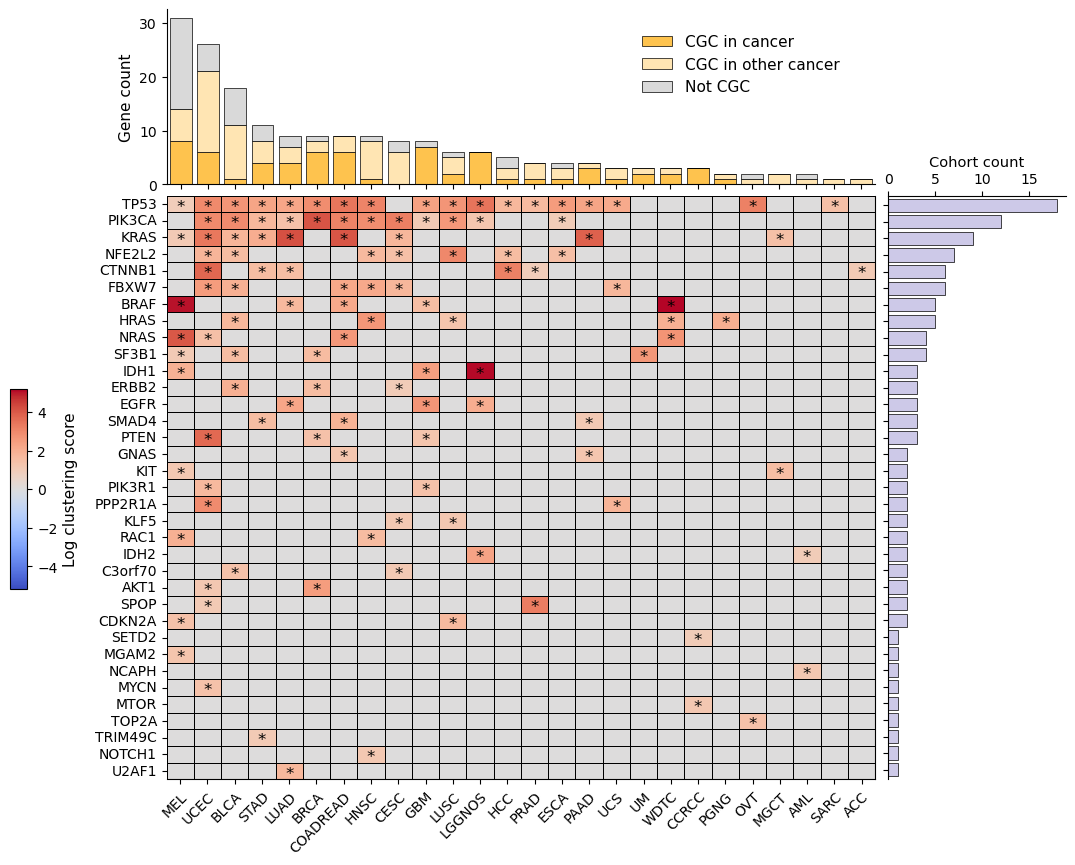

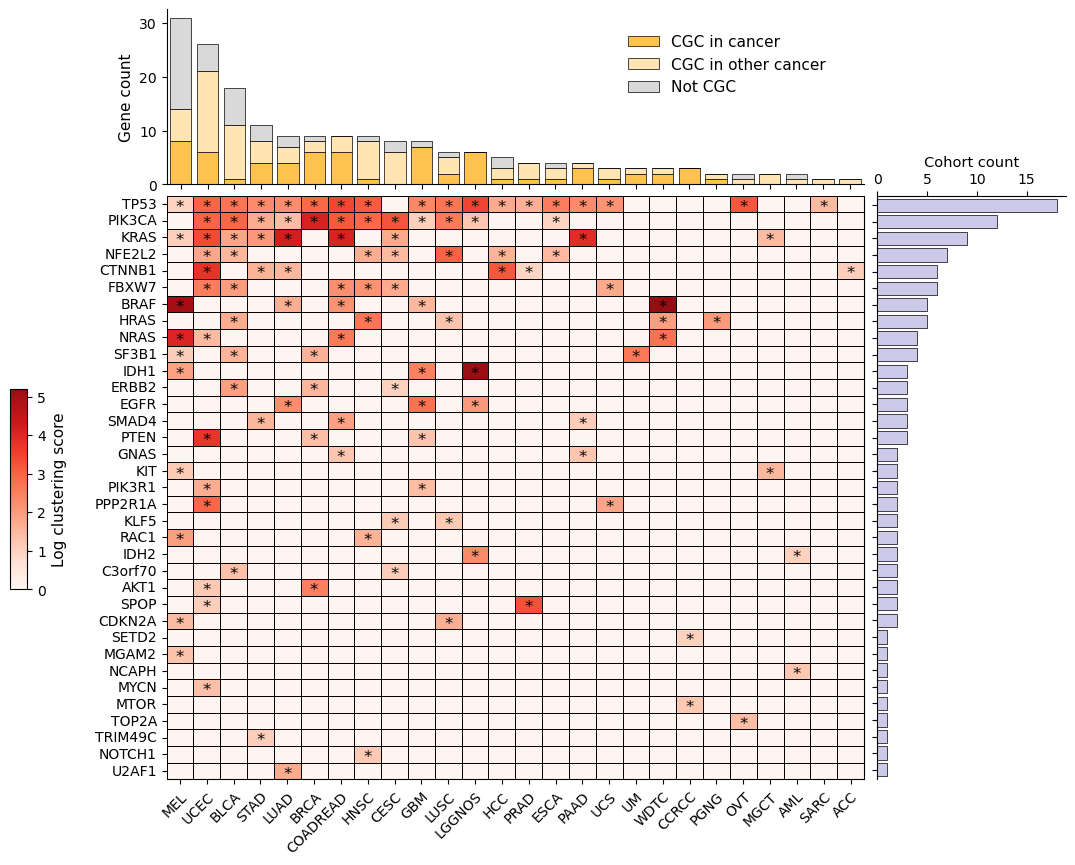

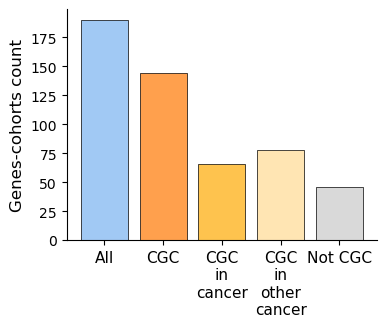

In [210]:
top_cohorts_n=None
top_genes_n=35

o3d_output = get_anomaly_df(genetable_subset, o3d_output_dir)
anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["Cohort"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                             cohort_df, 
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             anomaly_dict=anomaly_dict,
                                                                                             cgc_specific=True,
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict)

df_anomaly.columns = [cohort.split("_")[2] for cohort in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               df_anomaly=df_anomaly,
               figsize=(11.6,10),
               width_ratios=[1, 0.25],
               height_ratios=[0.3, 1],
               legend_box=(-0.2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.03, 
               hspace=0.03,
               divergent_palette=True,
               plot_cgc_specific=True)

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               df_anomaly=df_anomaly,
               figsize=(11.6,10),
               width_ratios=[1, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-0.2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.03, 
               hspace=0.03,
               filename="landscape_heatmap_tcga.png",
               plot_cgc_specific=True)


# Get summary CGC hits across genetable
plot_o3d_cgc_hits(hits_df)

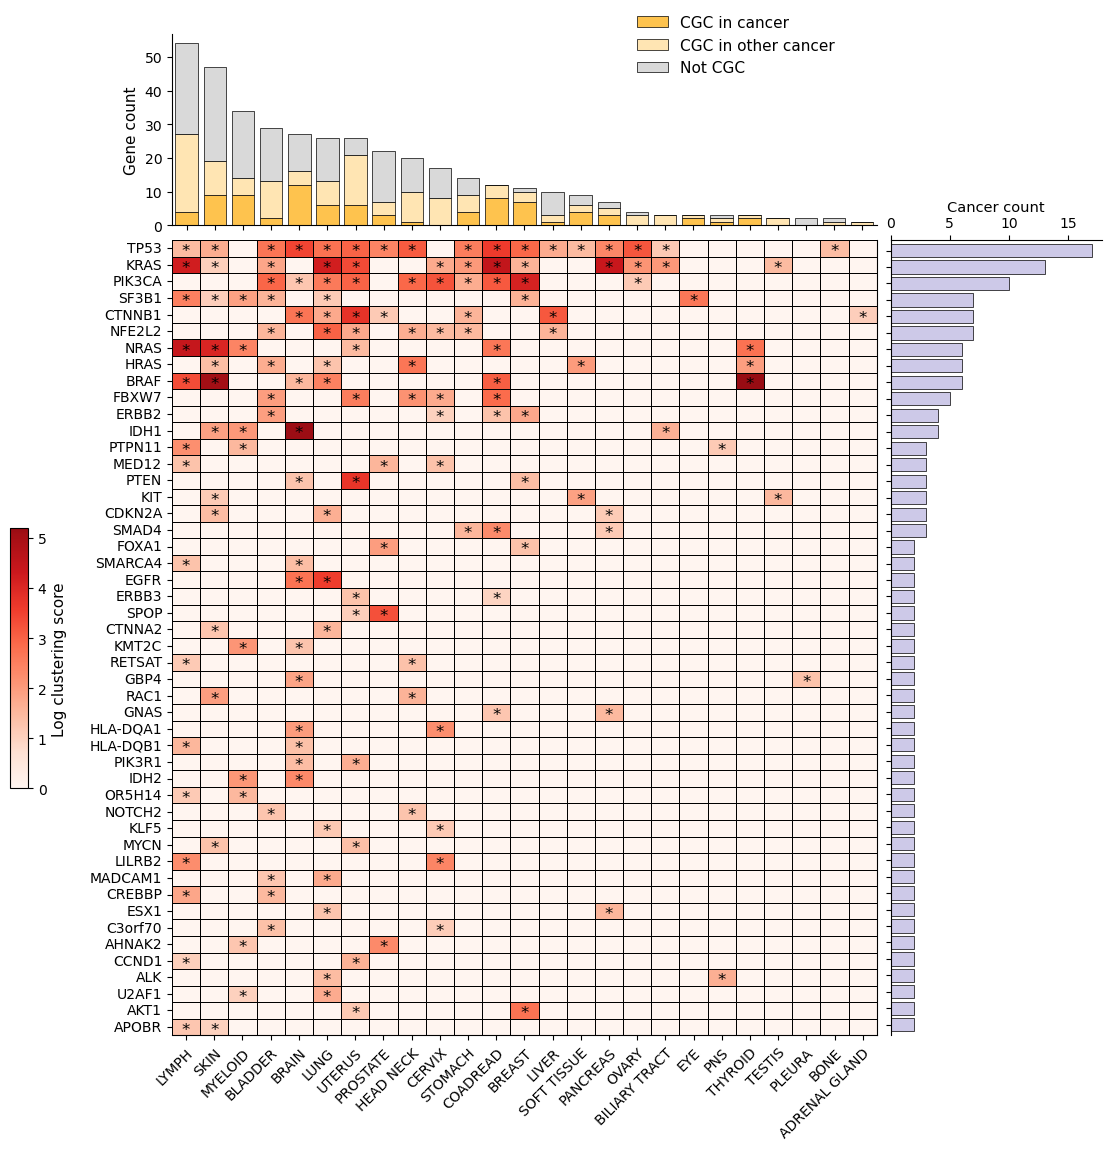

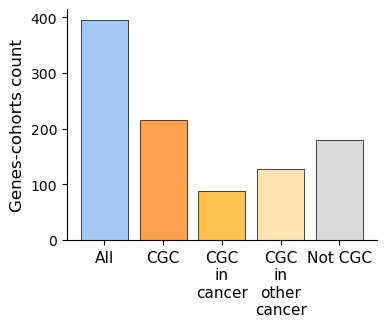

In [211]:
top_cohorts_n=None
top_genes_n=48 

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()

anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["GENERAL_CANCER_TYPE"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             anomaly_dict=anomaly_dict,
                                                                                             cgc_specific=True,
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)

# Landscape
plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               df_anomaly=df_anomaly,
               figsize=(12,13),
               width_ratios=[1, 0.3],
               height_ratios=[0.24, 1],
               legend_box=(-0.2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.03, 
               hspace=0.03,
               plot_cgc_specific=True,
               right_ax_ylabel="Cancer count")
    

# Get summary CGC hits across genetable
plot_o3d_cgc_hits(hits_df)

### Annotated landscape with fixed gene sorting

In [212]:
def get_gene_cohorts_binary(genetable_df, 
                            cohort_df, 
                            o3d_output_dir,
                            top_cohorts_n=None, 
                            top_genes_n=None, 
                            rm_empty_cols=True,
                            log_score=True,
                            cgc_df=None, 
                            cohorts_parent_dict=None,
                            grouped_by_cancer=False,
                            sort_by_score_only=False):

    # Get hits df and clustering score info
    hits_df = get_hits(genetable_df)
    o3d_output = get_anomaly_df(genetable_df, o3d_output_dir)

    # Count by general cancer
    if grouped_by_cancer:
        o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
        o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()
        anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
                                                                                  o3d_output["GENERAL_CANCER_TYPE"].values, 
                                                                                  o3d_output["Clustering_score"].values)}
        max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)
        target_col = "General_cancer"
        
    # Count by cohort
    else:
        o3d_output = get_anomaly_df(genetable_df, o3d_output_dir)
        anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                                  o3d_output["Cohort"].values, 
                                                                                  o3d_output["Clustering_score"].values)}
        max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)
        target_col = "Cohort"

    hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)
    cols_to_drop = ["Uniprot_ID", "Cancer", "Fish"]
    if grouped_by_cancer:
        cols_to_drop.append("Cohort")
    hits_df = hits_df.drop(columns=cols_to_drop).drop_duplicates().reset_index(drop=True)
    
    # Get count of cancer a gene has been detected as significant across all cohorts
    gene_hits_count = hits_df.groupby("Gene").apply(lambda x: len(x)).reset_index(name="Oncodrive3D")
    gene_hits_count = gene_hits_count.merge(max_score_df[["Gene", "Clustering_score"]], on="Gene", how="left")
    if sort_by_score_only:
        gene_hits_count = gene_hits_count.sort_values('Clustering_score', ascending=False).set_index("Gene")
    else:
        gene_hits_count = gene_hits_count.sort_values(by=['Oncodrive3D', 'Clustering_score'], ascending=[False, False]).set_index("Gene")
    # For a general cancer type get the number of unique CGC genes in that cancer, other cancer, not CGC
    cohort_hits_count = hits_df.groupby(target_col).apply(lambda x: get_cgc_specific_count_for_ttype(x)).sort_values("Oncodrive3D", ascending=False)
    
    if top_genes_n is None:
        top_genes_n = len(gene_hits_count)
    if top_cohorts_n is None:
        top_cohorts_n = len(cohort_hits_count)
    top_genes = gene_hits_count[:top_genes_n].index
    top_cohorts = cohort_hits_count[:top_cohorts_n].index

    # Get df anomaly and binary
    df_anomaly = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    df_binary = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    for cohort in top_cohorts:
        genes = hits_df[hits_df[target_col] == cohort].Gene.values
        genes = [gene for gene in genes if gene in df_anomaly.columns]
        # Df anomaly
        scores = [np.log(anomaly_dict[f"{gene}-{cohort}"]) if log_score else anomaly_dict[f"{gene}-{cohort}"] for gene in genes]    
        df_anomaly.loc[cohort, genes] = scores
        # Df binary
        df_binary.loc[cohort, genes] = 1

    df_anomaly = df_anomaly.T 
    df_binary = df_binary.T 
    if len(cohort_df) == 1:
        df_anomaly = df_anomaly.loc[hits_df.Gene]
        df_binary = df_binary.loc[hits_df.Gene]
        
    if rm_empty_cols:
        df_anomaly = df_anomaly.loc[:, ~(df_anomaly == 0).all()]
        df_binary = df_binary.loc[:, ~(df_binary == False).all()]

    gene_hits_count = gene_hits_count.loc[df_anomaly.index]
    cohort_hits_count = cohort_hits_count.loc[[cohort for cohort in cohort_hits_count.index if cohort in df_anomaly.columns]]

    return df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count


def plot_landscape(df, 
                   gene_colors, 
                   lut, 
                   gene_hits_count, 
                   cohort_hits_count,
                   colors_dict,
                   names_dict,
                   annot_df,
                   df_anomaly=None,
                   figsize=(16,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.1),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   ax6_margin=0.018,
                   ax6_xmargin=0.07,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.3, 0.015, .2],
                   intogen_label=False,
                   intogen_label_table=None,
                   filename=None,
                   divergent_palette=False,
                   color_gene=False,
                   plot_cgc_specific=False,
                   right_ax_ylabel="Cohort count"):
    
    if df_anomaly is not None:
        df_binary = df
        df = df_anomaly
        cmap = "vlag"
        cmap = create_custom_colormap()
    else:
        colors = ["lightgray", "gray"] 
        cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
    if divergent_palette:
        cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    #col_labels = [ctype_dict[cohort] for cohort  in col_labels]
    
    gene_sums = gene_hits_count["Oncodrive3D"].values
    cohort_sums = cohort_hits_count["Oncodrive3D"].values
    
    if plot_cgc_specific:
        cgc_specific = cohort_hits_count["CGC_specific"].values
        cgc_not_specific = cohort_hits_count["CGC_not_specific"].values
        not_cgc = cohort_hits_count["Not_CGC"].values  
    else:
        cgc = cohort_hits_count["CGC"].values
        not_cgc = cohort_hits_count["Not_CGC"].values
    
    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(2, 4, 
                           figsize=figsize, 
                           gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios})
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,3]
    ax5 = ax[0,2]
    ax6 = ax[1,1]
    ax7 = ax[0,3]
    ax8 = ax[1,2]
    
    # Create the heatmap
    if df_anomaly is not None and divergent_palette:
        vmax = df_anomaly.max().max()
        vmin = -vmax
    else:
        vmax, vmin = None, None
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=0.5, 
                linecolor="black", vmax=vmax, vmin=vmin)
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)
    
    # Add bars for the right axis
    ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black", lw=0.5)
    ax4.set_yticks(np.arange(len(gene_sums)))
    ax4.set_yticklabels([])
    ax4.set_xlabel(right_ax_ylabel, fontsize=10.5)
    ax4.invert_yaxis()
    
    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top')
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['right'].set_visible(False)


    # Add annotation track
    # ====================
    lst_dbs = ["cgc", "oncokb", "msk_impact", "fondone", "vogelstein", "intogen"]
    lst_methods = ["hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
    
    genes = annot_df['Gene']
    annot_methods_df = annot_df.copy()[lst_methods]
    annot_df = annot_df[lst_dbs]
    
    # Loop through each column
    indices = annot_df.index.tolist()
    ax6.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_df.columns):
        # Get the indices where the value is 1
        indices = annot_df.index[annot_df[col] == 1].tolist()
        ax6.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax6.set_yticks(np.arange(len(gene_sums)))
    ax6.set_yticklabels([])
    ax6.set_xticks(range(len(annot_df.columns)))
    ax6.set_xticklabels([names_dict[col] for col in annot_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    ax6.invert_yaxis()
    ax6.xaxis.tick_top()
    ax6.xaxis.set_label_position('top')


    # Annotation Intogen methods
    # ==========================
    
    # Loop through each column
    indices = annot_methods_df.index.tolist()
    ax8.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_methods_df.columns):
        indices = annot_methods_df.index[annot_methods_df[col] == 1].tolist()
        ax8.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax8.set_yticks(np.arange(len(gene_sums)))
    ax8.set_yticklabels([])
    ax8.set_xticks(range(len(annot_methods_df.columns)))
    ax8.set_xticklabels([names_dict[col] for col in annot_methods_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    ax8.invert_yaxis()
    
    ax8.xaxis.tick_top()
    ax8.xaxis.set_label_position('top')

    
    # Add bars for the top axis 
    # =========================

    if plot_cgc_specific: 
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, 
                color="#fec34e", edgecolor='black', label='CGC in cancer', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_not_specific, bottom=cgc_specific, 
                color="#ffe5b3", edgecolor='black', label='CGC in other cancer', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), not_cgc, bottom=np.array(cgc_specific) + np.array(cgc_not_specific), 
                color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)
    else:
        ax1.bar(np.arange(len(cohort_hits_count)), cgc, color="#ffbb80", edgecolor='black', label='CGC', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, bottom=cgc, color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)
    ax1.set_xticks(np.arange(len(cohort_sums)))
    ax1.set_ylabel("Gene count", fontsize=11)
    ax1.set_xticklabels([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    
    # Details
    # =======
    
    ax2.remove()
    ax5.remove()
    ax7.remove()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    ax1.margins(x=ax1_margin, tight=True)
    ax4.margins(y=ax4_margin, tight=True)
    ax6.margins(y=ax6_margin, x=ax6_xmargin, tight=True)
    ax8.margins(y=ax6_margin, x=ax6_xmargin, tight=True)
    
    handles, labels = ax3.get_legend_handles_labels()
    if intogen_label:
        handles.append(mpatches.Patch(facecolor=lut["Detected"], edgecolor="black", label='Detected', lw=0.5))
        handles.append(mpatches.Patch(facecolor=lut["Not detected"], edgecolor="black", label="Not detected", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, 
                            title="Detected in IntOGen", title_fontsize=11, fontsize=11)
    elif plot_cgc_specific:
        handles.append(mpatches.Patch(facecolor="#fec34e", edgecolor="black", label='CGC in cancer', lw=0.5))
        handles.append(mpatches.Patch(facecolor="#ffe5b3", edgecolor="black", label="CGC in other cancer", lw=0.5))
        handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    else:
        handles.append(mpatches.Patch(facecolor="#ffbb80", edgecolor="black", label='CGC', lw=0.5))
        handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    if color_gene:
        for i, label in enumerate(ax3.get_yticklabels()):
            label.set_color(gene_colors[i])
        for text in legend.get_texts():
            text.set_color(lut[text.get_text()])
    
    if df_anomaly is not None:
        # Cbar
        cbar_ax = fig.add_axes(cbar_loc) 
        cbar = fig.colorbar(ax3.collections[0], cax=cbar_ax)
        cbar.set_label('Log clustering score', fontsize=11) 
        
        # Overlay stars on top of the heatmap
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                if df_binary.iloc[i, j] == 1:
                    ax3.text(j + 0.5, i + 0.65, '*', ha='center', va='center', fontsize=12, color='black')
           
        # Overlay ^ for IntOGen hits
        if intogen_label_table is not None:   
            for i in range(len(row_labels)):
                for j in range(len(col_labels)):
                    if intogen_label_table.iloc[i, j] == 1:
                        ax3.text(j + 0.5, i + 0.65, '^', ha='center', va='top', fontsize=12, color='black')

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


def get_annot_gene_df(genes_lst,
                      genetable_df,
                      intogen_drivers_df, 
                      oncokb_df, 
                      cgc_df, 
                      alpha = 0.01,
                      lst_methods = ["hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]):

    genes = pd.Series(genes_lst)
    
    unique_hits_dict = {}
    unique_hits_dict["cgc"] = cgc_df["Gene Symbol"].values
    unique_hits_dict["oncokb"] = oncokb_df.loc[oncokb_df["OncoKB Annotated"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["msk_impact"] = oncokb_df.loc[oncokb_df["MSK-IMPACT"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["msk_heme"] = oncokb_df.loc[oncokb_df["MSK-HEME"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["fondone"] = oncokb_df.loc[oncokb_df["FOUNDATION ONE"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["fondone_heme"] = oncokb_df.loc[oncokb_df["FOUNDATION ONE HEME"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["vogelstein"] = oncokb_df.loc[oncokb_df["Vogelstein"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["intogen"] = intogen_drivers_df.SYMBOL.values
    
    # Get unique hits for each method in Intogen and O3D
    for method in lst_methods:
        unique_hits_dict[method] = genetable_df[genetable_df[f"{method}_qval"] < alpha].Gene.unique()
    
    # Get df
    annot_df = {}
    annot_df["Gene"] = genes
    for annot in unique_hits_dict.keys():
        annot_df[annot] = genes.isin(unique_hits_dict[annot]).astype(int)
    
    return pd.DataFrame(annot_df)

In [213]:
colors_dict = {"Oncodrive3D" : "#ffad48", 
              "HotMAPS" : "#024b79", 
              "OncodriveCLUSTL" : "#43b7c2", 
              "smRegions" : "#c2f1ce", 
              "CBaSE" : "#ffb8b3", 
              "SEISMIC" : "#ede5ff", 
              "dNdScv" : "#edd7c5", 
              "MutPanning" : "#cee4d8", 
              "OncodriveFML" : "#bbd9f6",
              "IntOGen" : "#A6D854",
              "OncoKB" : "#66C2A5",
              "CGC" : "#FFA04D",
              "MSK-IMPACT" : "#FB9A99",
              "MSK-IMPACT Heme" : "#E31A1C",
              "FoundationOne" : "#CAB2D6",
              "FoundationOne Heme" : "#6A3D9A",
              "Vogelstein" : "#E5C494"}

names_dict = {"o3d" : "Oncodrive3D", 
             "hotmaps" : "HotMAPS", 
             "clustl" : "OncodriveCLUSTL", 
             "smreg" : "smRegions", 
             "cbase" : "CBaSE", 
             "seismic" : "SEISMIC", 
             "dndscv" : "dNdScv", 
             "mutpan" : "MutPanning", 
             "fml" : "OncodriveFML",
             "intogen" : "IntOGen",
             "oncokb" : "OncoKB",
             "cgc" : "CGC",
             "msk_impact" : "MSK-IMPACT",
             "msk_heme" : "MSK-IMPACT Heme",
             "fondone" : "FoundationOne",
             "fondone_heme" : "FoundationOne Heme", 
             "vogelstein" : "Vogelstein"}

annot_cols = ["Gene", 
              "cgc", 
              "oncokb", 
              "msk_impact", 
              "fondone", 
              "vogelstein", 
              "intogen", 
              "hotmaps", 
              "clustl", 
              "smreg", 
              "cbase",
              "dndscv", 
              "mutpan", 
              "fml"]

drivers_df = pd.read_table(f"{input_path}/drivers.tsv")
uniq_drivers_df = pd.read_table(f"{input_path}/unique_drivers.tsv")

/tmp/jobs/spellegrini/9964934/ipykernel_20268/917191271.py:33: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)


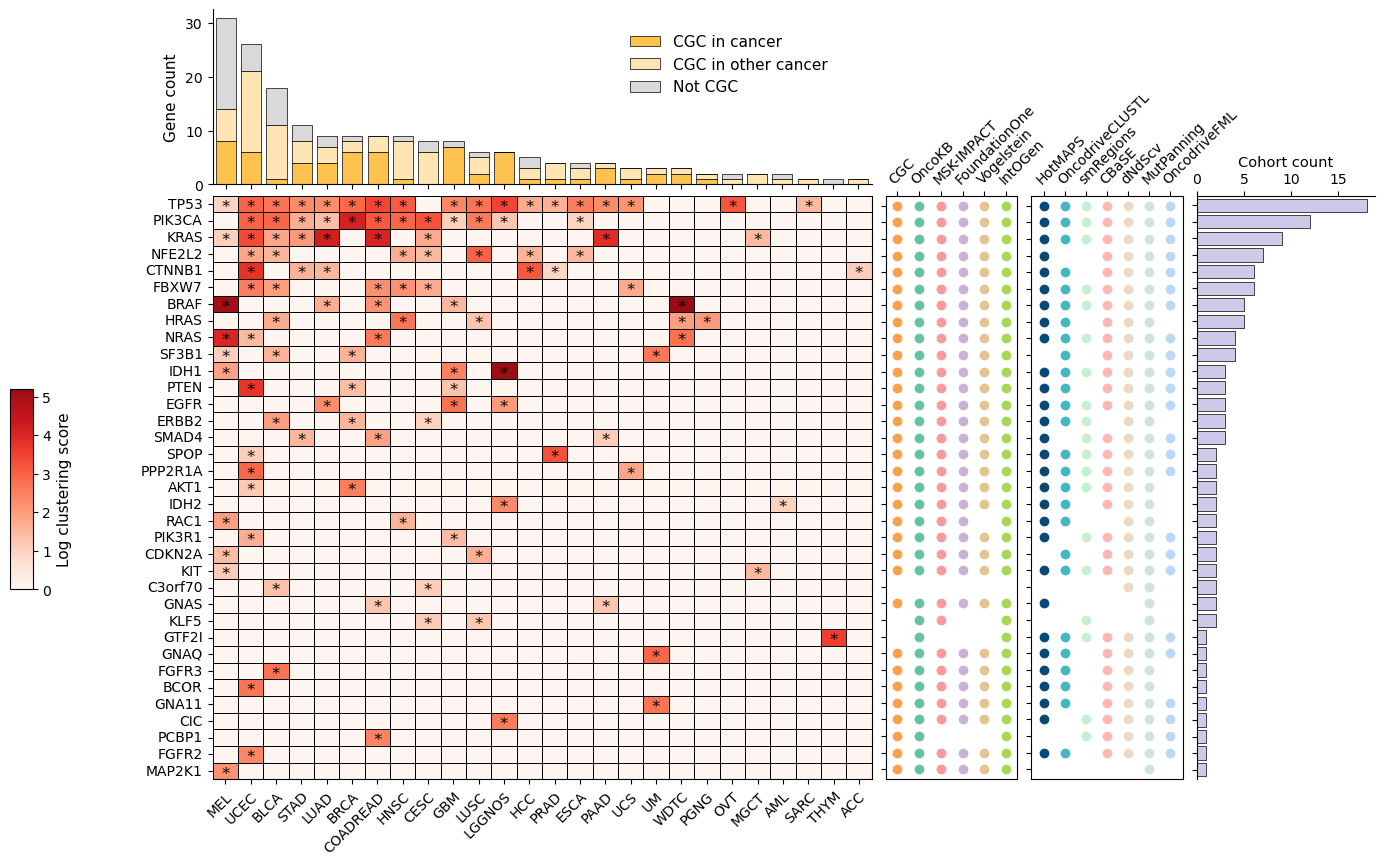

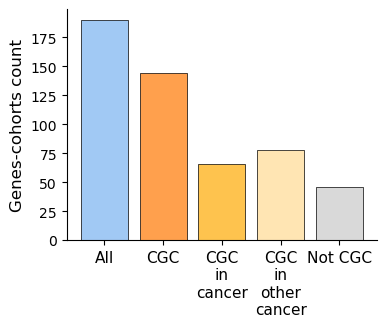

In [214]:
top_cohorts_n=None
top_genes_n=35

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=False)

df_anomaly.columns = [cohort.split("_")[2] for cohort in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable_subset, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(15,10),
               width_ratios=[1, 0.2, 0.23, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.03,
               filename="landscape_heatmap_tcga.png",
               plot_cgc_specific=True)


# Get summary CGC hits across genetable
plot_o3d_cgc_hits(hits_df)

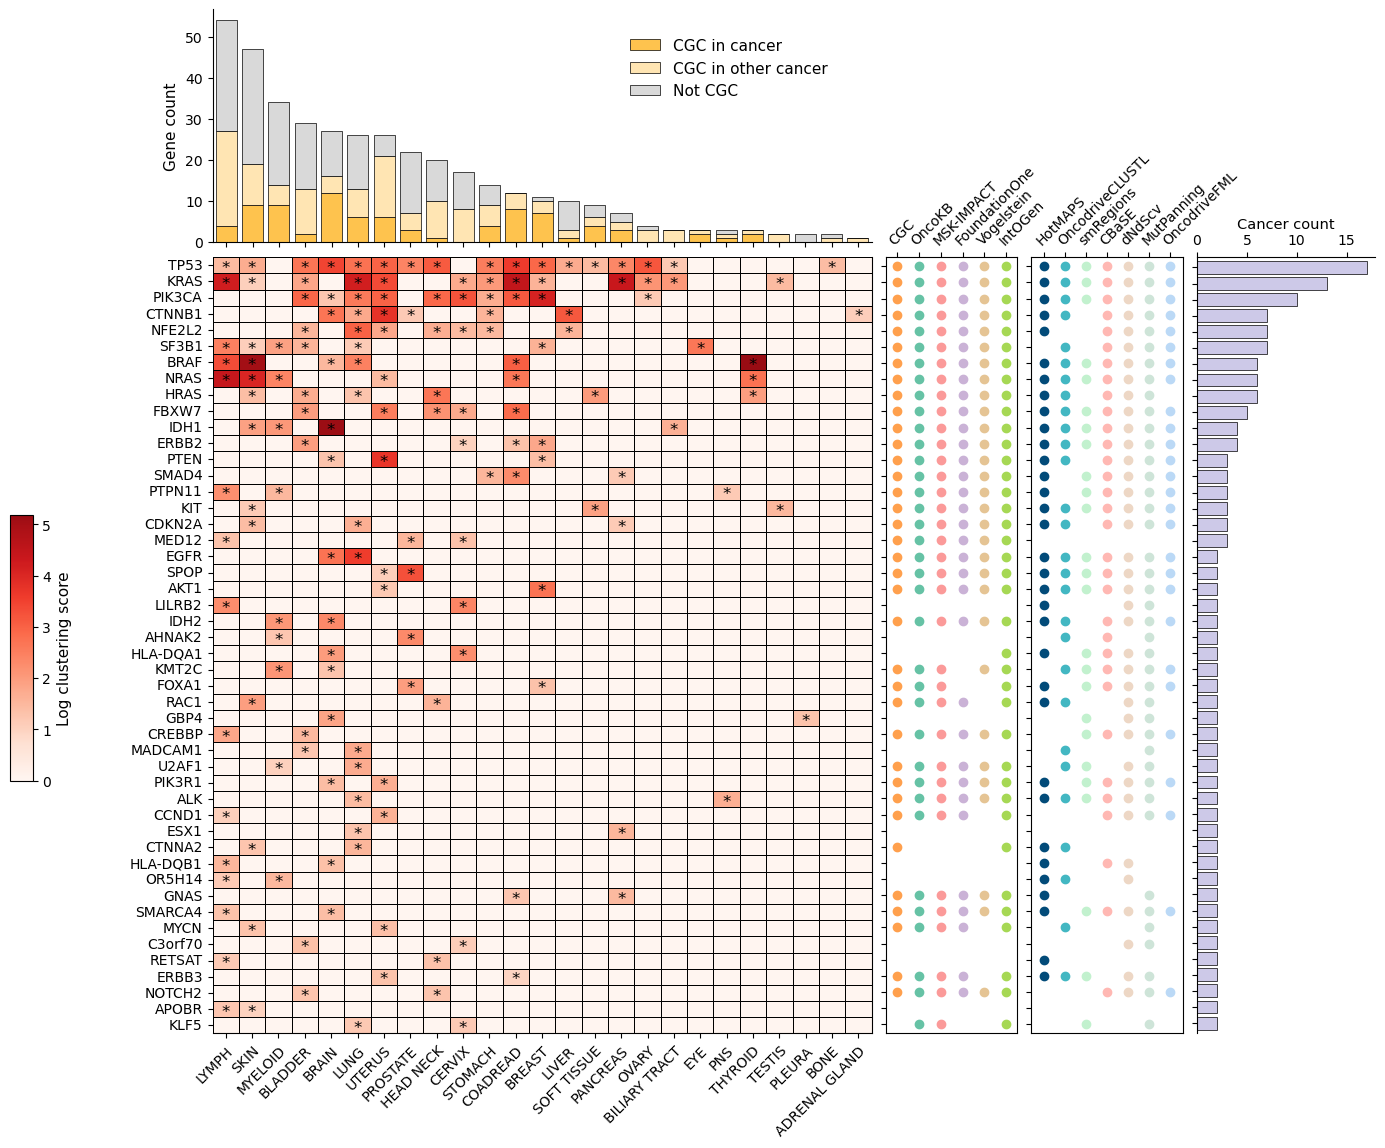

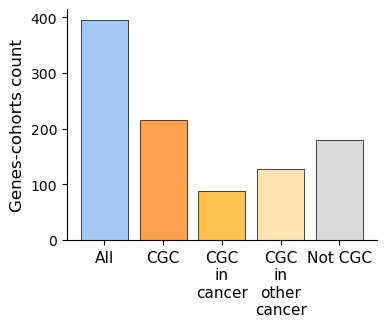

In [215]:
top_cohorts_n=None
top_genes_n=48

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)[annot_cols]

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(15,13.3),
               width_ratios=[1, 0.2, 0.23, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.012,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.03,
               plot_cgc_specific=True,
               right_ax_ylabel="Cancer count",
               filename="landscape_heatmap.png",)

# Get summary CGC hits across genetable
plot_o3d_cgc_hits(hits_df)

### Sort by max score and add max score track

In [216]:
def plot_landscape(df, 
                   gene_hits_count, 
                   cohort_hits_count,
                   colors_dict,
                   names_dict,
                   annot_df,
                   df_anomaly=None,
                   figsize=(15,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.1),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   ax6_margin=0.018,
                   ax6_xmargin=0.07,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.3, 0.015, .2],
                   intogen_label=False,
                   intogen_label_table=None,
                   filename=None,
                   plot_max_score=False,
                   right_ax_ylabel="Cohort count"):
    

    df_binary = df
    df = df_anomaly
    cmap = create_custom_colormap()
    
    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    #col_labels = [ctype_dict[cohort] for cohort  in col_labels]
    
    gene_sums = gene_hits_count["Oncodrive3D"].values
    cohort_sums = cohort_hits_count["Oncodrive3D"].values
    
    cgc_specific = cohort_hits_count["CGC_specific"].values
    cgc_not_specific = cohort_hits_count["CGC_not_specific"].values
    not_cgc = cohort_hits_count["Not_CGC"].values  

    ncols = 5 if plot_max_score else 4
    
    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(2, ncols, 
                           figsize=figsize, 
                           gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios})
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,3]
    ax5 = ax[0,2]
    ax6 = ax[1,1]
    ax7 = ax[0,3]
    ax8 = ax[1,2]
    ax9 = ax[0,4] if plot_max_score else None
    ax10 = ax[1,4] if plot_max_score else None
    
    # Create the heatmap
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=0.5, 
                linecolor="black")
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)

    
    # Add counts of cohort or cancer for each gene
    # ============================================
    
    ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black", lw=0.5)
    ax4.set_yticks(np.arange(len(gene_sums)))
    ax4.set_yticklabels([])
    ax4.set_xlabel(right_ax_ylabel, fontsize=10.5)
    ax4.invert_yaxis()
    
    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top')
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['right'].set_visible(False)

    
    # Add max score track
    # ===================
    max_scores = np.log(gene_hits_count["Clustering_score"])
    norm = Normalize(vmin=df_anomaly.min().min(), vmax=df_anomaly.max().max())
    colors = cmap(norm(max_scores))

    
    ax10.barh(np.arange(len(gene_sums)), max_scores, color=colors, edgecolor="black", lw=0.5)
    ax10.set_yticks(np.arange(len(gene_sums)))
    ax10.set_yticklabels([])
    ax10.set_xlabel("Max log\nclustering score", fontsize=10.5)
    ax10.invert_yaxis()
    
    ax10.xaxis.tick_top()
    ax10.xaxis.set_label_position('top')
    ax10.spines['bottom'].set_visible(False)
    ax10.spines['right'].set_visible(False)

    
    # Add annotation track
    # ====================
    lst_dbs = ["cgc", "oncokb", "msk_impact", "fondone", "vogelstein", "intogen"]
    lst_methods = ["hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
    
    genes = annot_df['Gene']
    annot_methods_df = annot_df.copy()[lst_methods]
    annot_df = annot_df[lst_dbs]
    
    # Loop through each column
    indices = annot_df.index.tolist()
    ax6.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_df.columns):
        # Get the indices where the value is 1
        indices = annot_df.index[annot_df[col] == 1].tolist()
        ax6.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax6.set_yticks(np.arange(len(gene_sums)))
    ax6.set_yticklabels([])
    ax6.set_xticks(range(len(annot_df.columns)))
    ax6.set_xticklabels([names_dict[col] for col in annot_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    ax6.invert_yaxis()
    ax6.xaxis.tick_top()
    ax6.xaxis.set_label_position('top')


    # Annotation Intogen methods
    # ==========================
    
    # Loop through each column
    indices = annot_methods_df.index.tolist()
    ax8.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_methods_df.columns):
        indices = annot_methods_df.index[annot_methods_df[col] == 1].tolist()
        ax8.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax8.set_yticks(np.arange(len(gene_sums)))
    ax8.set_yticklabels([])
    ax8.set_xticks(range(len(annot_methods_df.columns)))
    ax8.set_xticklabels([names_dict[col] for col in annot_methods_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    ax8.invert_yaxis()
    
    ax8.xaxis.tick_top()
    ax8.xaxis.set_label_position('top')

    
    # Add bars for the top axis 
    # =========================

    ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, 
            color="#fec34e", edgecolor='black', label='CGC in cancer', lw=0.5)
    ax1.bar(np.arange(len(cohort_hits_count)), cgc_not_specific, bottom=cgc_specific, 
            color="#ffe5b3", edgecolor='black', label='CGC in other cancer', lw=0.5)
    ax1.bar(np.arange(len(cohort_hits_count)), not_cgc, bottom=np.array(cgc_specific) + np.array(cgc_not_specific), 
            color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)

    ax1.set_xticks(np.arange(len(cohort_sums)))
    ax1.set_ylabel("Gene count", fontsize=11)
    ax1.set_xticklabels([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    
    # Details
    # =======
    
    ax2.remove()
    ax5.remove()
    ax7.remove()
    if plot_max_score:
        ax9.remove()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    ax1.margins(x=ax1_margin, tight=True)
    ax4.margins(y=ax4_margin, tight=True)
    ax6.margins(y=ax6_margin, x=ax6_xmargin, tight=True)
    ax8.margins(y=ax6_margin, x=ax6_xmargin, tight=True)
    ax10.margins(y=ax4_margin, tight=True)
    
    handles, labels = ax3.get_legend_handles_labels()
    handles.append(mpatches.Patch(facecolor="#fec34e", edgecolor="black", label='CGC in cancer', lw=0.5))
    handles.append(mpatches.Patch(facecolor="#ffe5b3", edgecolor="black", label="CGC in other cancer", lw=0.5))
    handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
    legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    
    if df_anomaly is not None:
        # Cbar
        cbar_ax = fig.add_axes(cbar_loc) 
        cbar = fig.colorbar(ax3.collections[0], cax=cbar_ax)
        cbar.set_label('Log clustering score', fontsize=11) 
        
        # Overlay stars on top of the heatmap
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                if df_binary.iloc[i, j] == 1:
                    ax3.text(j + 0.5, i + 0.65, '*', ha='center', va='center', fontsize=12, color='black')
           
        # Overlay ^ for IntOGen hits
        if intogen_label_table is not None:   
            for i in range(len(row_labels)):
                for j in range(len(col_labels)):
                    if intogen_label_table.iloc[i, j] == 1:
                        ax3.text(j + 0.5, i + 0.65, '^', ha='center', va='top', fontsize=12, color='black')

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

#### TCGA

/tmp/jobs/spellegrini/9964934/ipykernel_20268/917191271.py:33: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)


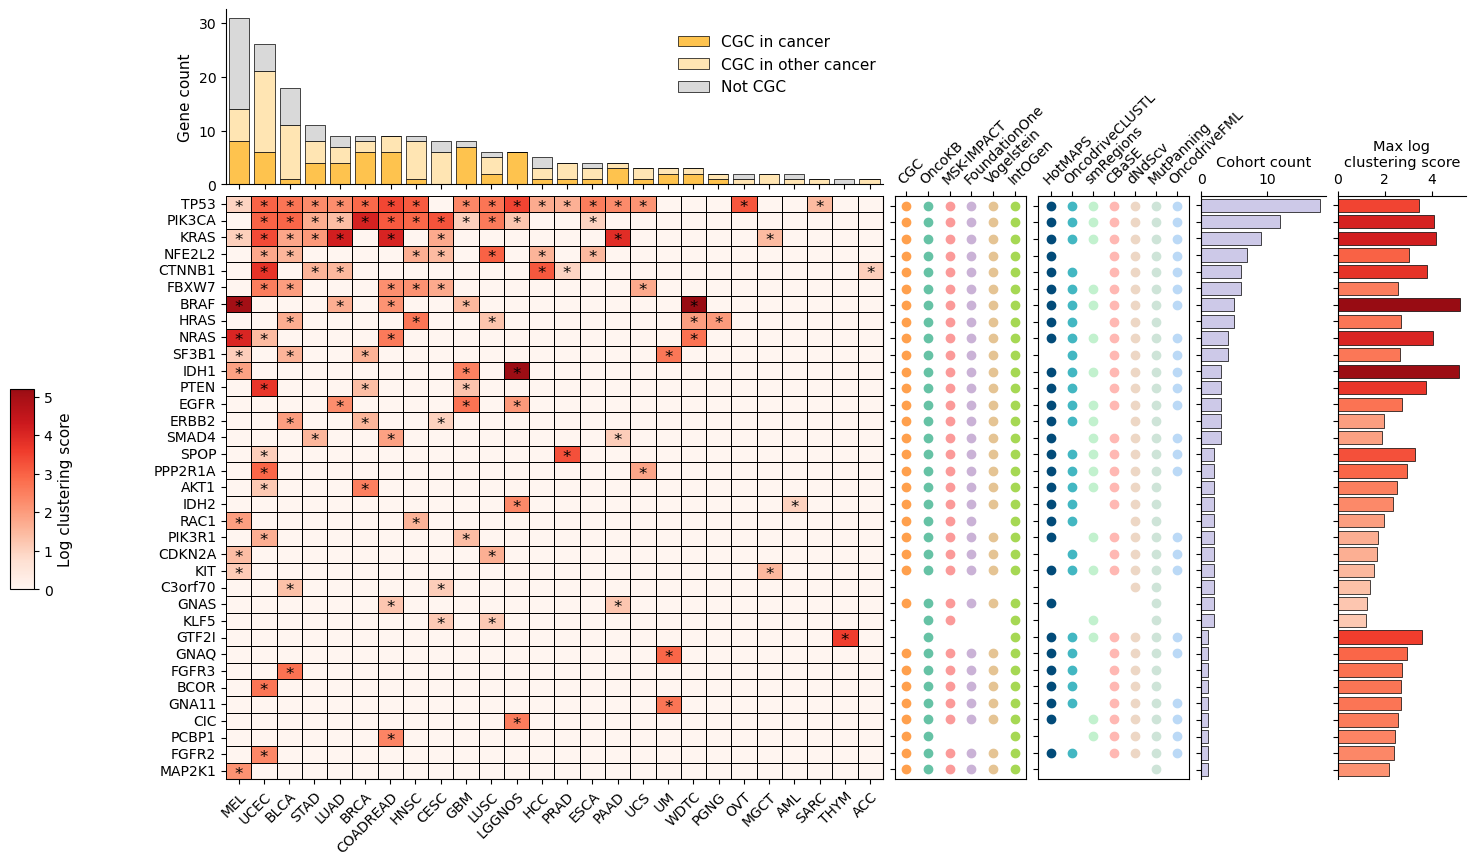

In [217]:
top_cohorts_n=None
top_genes_n=35
df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=False,
                                                                                             sort_by_score_only=False)

df_anomaly.columns = [cohort.split("_")[2] for cohort in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable_subset, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(16,10),
               width_ratios=[1, 0.2, 0.23, 0.19, 0.195],
               height_ratios=[0.3, 1],
               legend_box=(-3.5, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.03,
               plot_max_score=True)

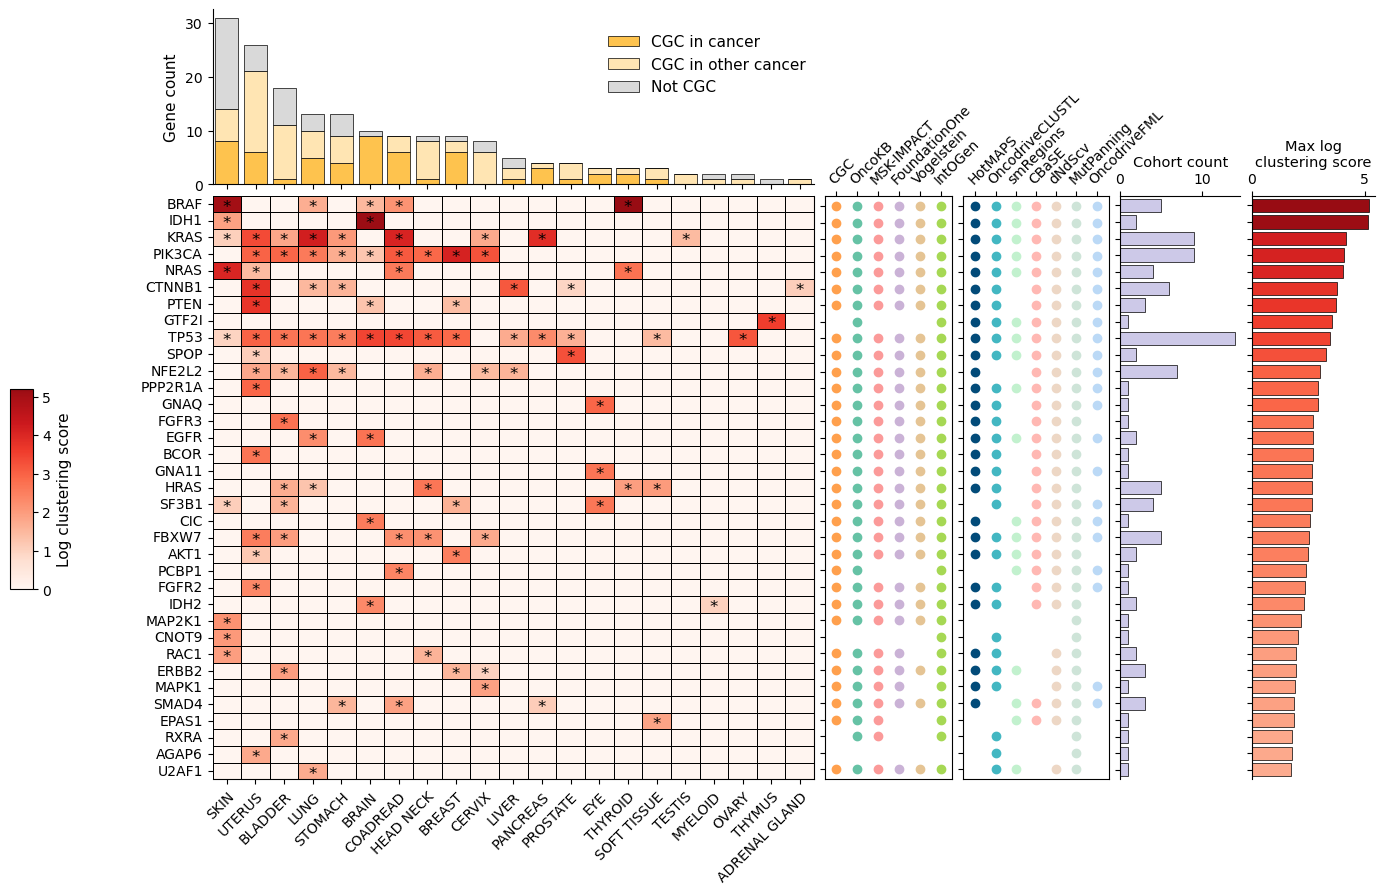

In [218]:
top_cohorts_n=None
top_genes_n=35

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True,
                                                                                             sort_by_score_only=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable_subset, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(15,10),
               width_ratios=[0.95, 0.2, 0.23, 0.19, 0.195],
               height_ratios=[0.3, 1],
               legend_box=(-3.5, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.03,
               plot_max_score=True)

#### All cohorts

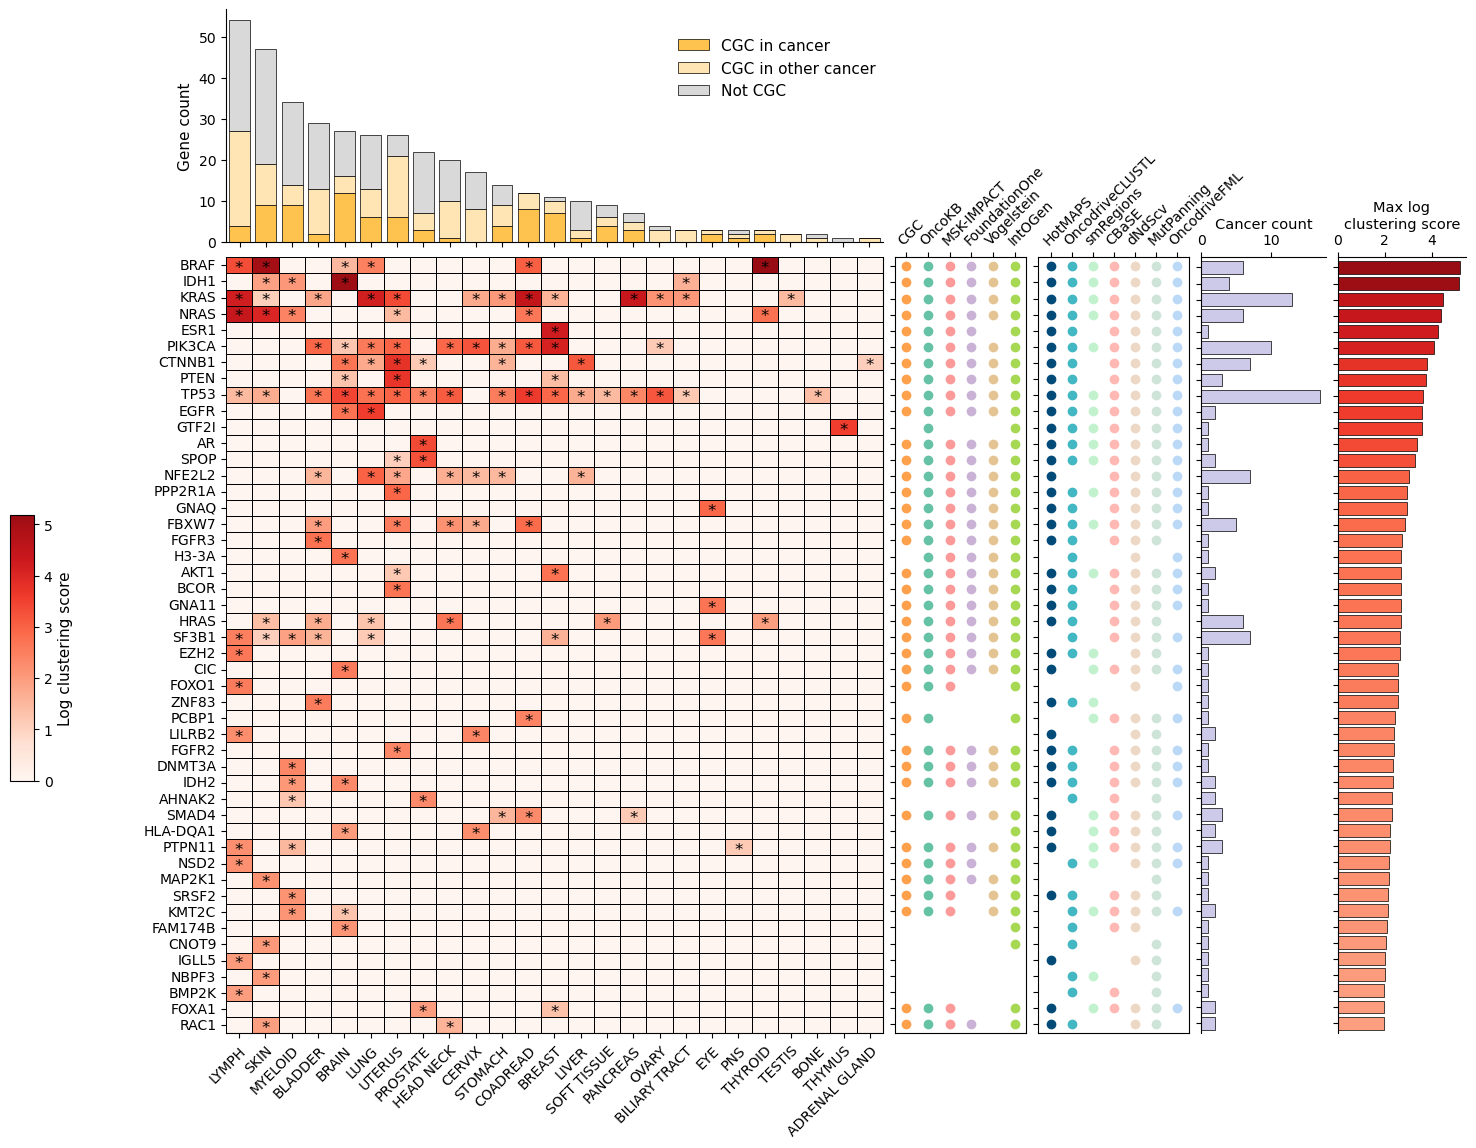

In [219]:
top_cohorts_n=None
top_genes_n=48

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True,
                                                                                             sort_by_score_only=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(16,13.3),
               width_ratios=[1, 0.2, 0.23, 0.19, 0.195],
               height_ratios=[0.3, 1],
               legend_box=(-3.5, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.012,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.03,
               plot_max_score=True,
               right_ax_ylabel="Cancer count",
               filename="landscape_heatmap_by_score.png",)

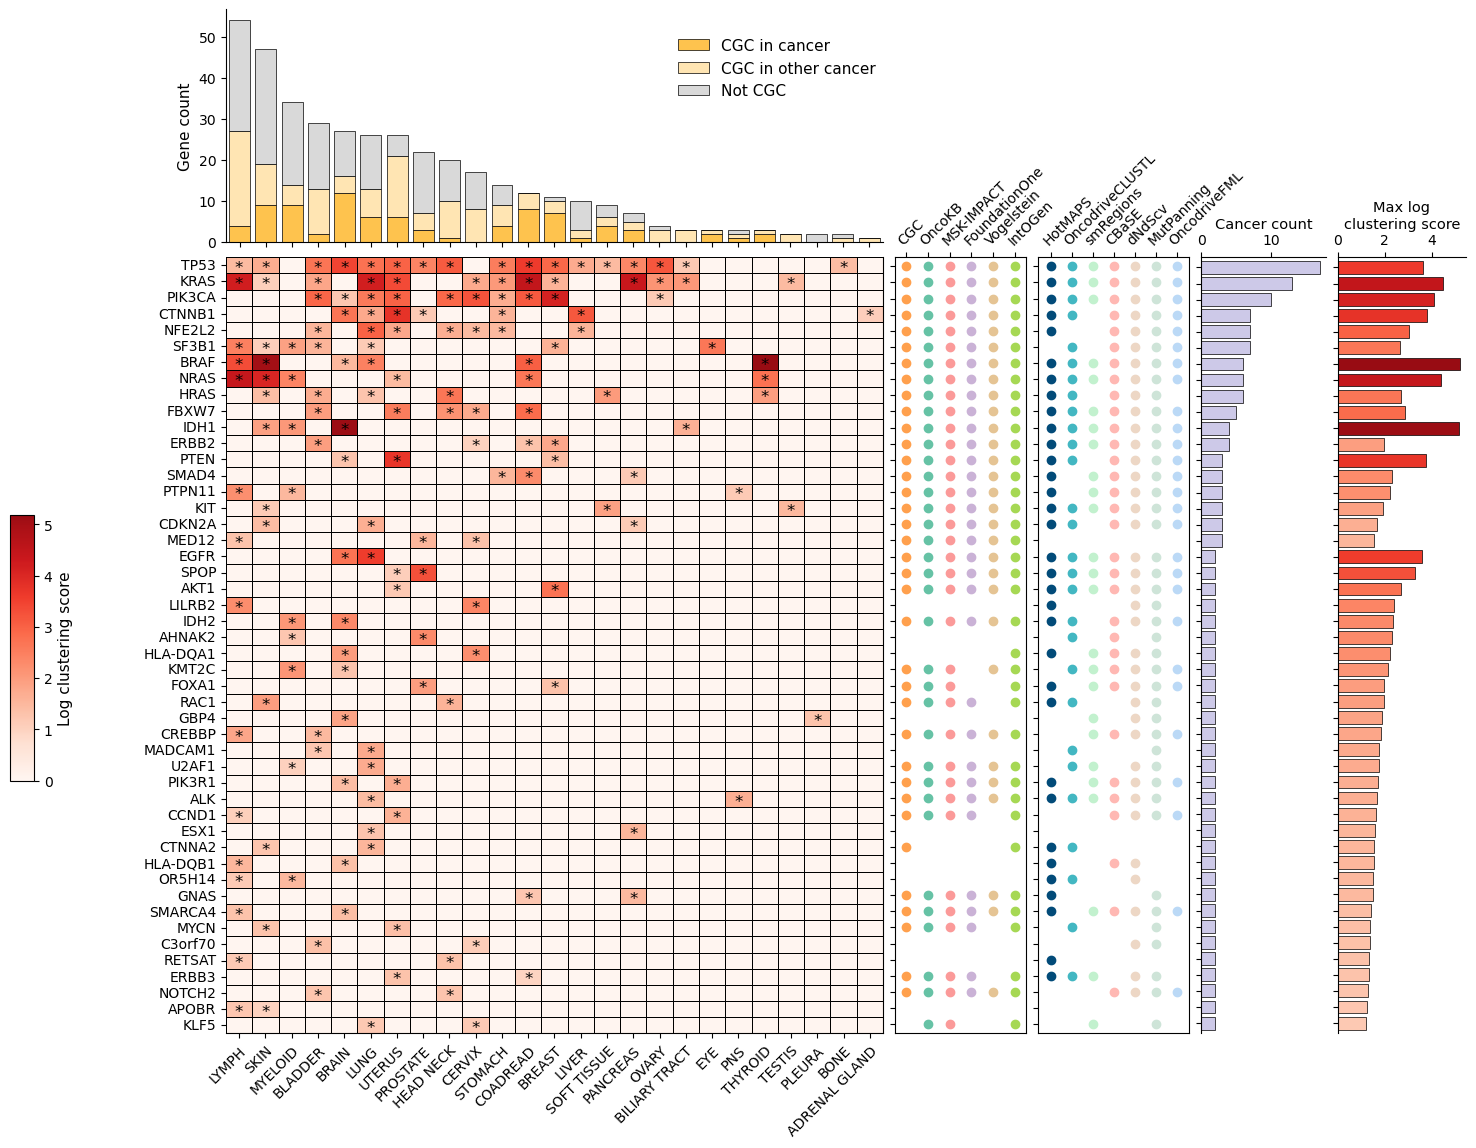

In [220]:
top_cohorts_n=None
top_genes_n=48

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True,
                                                                                             sort_by_score_only=False)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)

plot_landscape(df=df_binary, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(16,13.3),
               width_ratios=[1, 0.2, 0.23, 0.19, 0.195],
               height_ratios=[0.3, 1],
               legend_box=(-3.5, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.012,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.03,
               plot_max_score=True,
               right_ax_ylabel="Cancer count")

#### Look for interesting cases

In [240]:
#### MED12 in IntOGen results to be detected by combination, CBaSE, OncodriveCLUSTL but they all have a qval > 0.01
display(genetable[(genetable["Gene"] == "MED12") & (genetable["cbase_qval"] < 0.1)][["Gene", "Cancer", "Cohort", "cbase_pval", "cbase_qval"]])
display(genetable[(genetable["Gene"] == "MED12") & (genetable["clustl_qval"] < 0.1)][["Gene", "Cancer", "Cohort", "clustl_pval", "clustl_qval"]])

Gene  Cancer           Cohort  cbase_pval  cbase_qval
3321799  MED12  LGGNOS  TCGA_WXS_LGGNOS    0.000185    0.093243
4132040  MED12    CESC    TCGA_WXS_CESC    0.000110    0.068667

Gene Cancer                Cohort  clustl_pval  clustl_qval
1627394  MED12   PRAD  CBIOP_WXS_PRAD_BROAD     0.013592     0.084334

In [221]:
df_complete = o3d_output.groupby("Gene").apply(
    lambda x: x.sort_values("Clustering_score", ascending=False).iloc[0]).sort_values("Clustering_score", ascending=False)
df_complete[:30]

GENERAL_CANCER_TYPE     Gene  Clustering_score
Gene                                                  
BRAF                THYROID     BRAF        179.618281
IDH1                  BRAIN     IDH1        170.296501
KRAS               COADREAD     KRAS         88.347831
NRAS                  LYMPH     NRAS         81.875684
ESR1                 BREAST     ESR1         70.640336
PIK3CA               BREAST   PIK3CA         60.347787
CTNNB1               UTERUS   CTNNB1         43.402745
PTEN                 UTERUS     PTEN         41.634486
TP53               COADREAD     TP53         37.386387
EGFR                   LUNG     EGFR         35.581750
GTF2I                THYMUS    GTF2I         35.263297
AR                 PROSTATE       AR         28.932888
SPOP               PROSTATE     SPOP         26.355313
NFE2L2                 LUNG   NFE2L2         20.512420
PPP2R1A              UTERUS  PPP2R1A         18.677192
GNAQ                    EYE     GNAQ         18.591696
FBXW7              COADREAD    FBXW7         17.195667
FGFR3               BLADDER    FGFR3         15.401595
H3-3A                 BRAIN    H3-3A         14.937598
AKT1                 BREAST     AKT1         14.870668
BCOR                 UTERUS     BCOR         14.761121
GNA11                   EYE    GNA11         14.753669
HRAS              HEAD_NECK     HRAS         14.531444
SF3B1                   EYE    SF3B1         14.147752
EZH2                  LYMPH     EZH2         14.046783
CIC                   BRAIN      CIC         13.067384
FOXO1                 LYMPH    FOXO1         13.000404
ZNF83               BLADDER    ZNF83         12.892111
PCBP1              COADREAD    PCBP1         11.223980
LILRB2               CERVIX   LILRB2         10.958535

In [477]:
o3d_output[o3d_output["Gene"] == "ZNF83"]

Cohort   Gene Uniprot_ID    qval  C_gene  \
17443            CBIOP_WXS_BLCA_BGI  ZNF83     P51522  0.0000     1.0   
26444  CBIOP_WXS_SCLC_UCOLOGNE_2015  ZNF83     P51522  0.4982     0.0   
30109   OTHER_WGS_DLBCL_NATCOM_2018  ZNF83     P51522  1.0000     0.0   

           C_pos  Clustering_score  CGC  Fish  
17443  [293 290]         12.892111    0     0  
26444  [280 281]          3.046575    0     0  
30109        NaN          1.377934    0     0

In [476]:
o3d_output[o3d_output["Gene"] == "LILRB2"]

Cohort    Gene Uniprot_ID  qval  C_gene  \
19044    CGCI_WGS_CESC_2020  LILRB2     Q8N423   0.0     1.0   
19489    CBIOP_WXS_ACY_2019  LILRB2     Q8N423   1.0     0.0   
25265  CBIOP_WXS_LUAD_BROAD  LILRB2     Q8N423   1.0     0.0   
25759      CGCI_WGS_BL_2020  LILRB2     Q8N423   0.0     1.0   

                       C_pos  Clustering_score  CGC  Fish  
19044  [374 373 372 371 375]         10.958535    0     0  
19489                    NaN          1.630882    0     0  
25265                    NaN          0.924623    0     0  
25759  [374 373 372 371 375]          9.612547    0     0

In [465]:
def plot_landscape(df, 
                   gene_colors, 
                   lut, 
                   gene_hits_count, 
                   cohort_hits_count,
                   colors_dict,
                   names_dict,
                   annot_df,
                   df_anomaly=None,
                   figsize=(16,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.1),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   ax6_margin=0.018,
                   ax6_xmargin=0.07,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.3, 0.015, .2],
                   intogen_label=False,
                   intogen_label_table=None,
                   filename=None,
                   divergent_palette=False,
                   color_gene=False,
                   plot_cgc_specific=False,
                   right_ax_ylabel="Cohort count"):
    
    if df_anomaly is not None:
        df_binary = df
        df = df_anomaly
        cmap = "vlag"
        cmap = create_custom_colormap()
    else:
        colors = ["lightgray", "gray"] 
        cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
    if divergent_palette:
        cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    #col_labels = [ctype_dict[cohort] for cohort  in col_labels]
    
    gene_sums = gene_hits_count["Oncodrive3D"].values
    cohort_sums = cohort_hits_count["Oncodrive3D"].values
    
    if plot_cgc_specific:
        cgc_specific = cohort_hits_count["CGC_specific"].values
        cgc_not_specific = cohort_hits_count["CGC_not_specific"].values
        not_cgc = cohort_hits_count["Not_CGC"].values  
    else:
        cgc = cohort_hits_count["CGC"].values
        not_cgc = cohort_hits_count["Not_CGC"].values
    
    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(2, 3, 
                           figsize=figsize, 
                           gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios})
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,2]
    ax5 = ax[0,2]
    ax6 = ax[1,1]
    
    # Create the heatmap
    if df_anomaly is not None and divergent_palette:
        vmax = df_anomaly.max().max()
        vmin = -vmax
    else:
        vmax, vmin = None, None
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=0.5, 
                linecolor="black", vmax=vmax, vmin=vmin)
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)
    
    # Add bars for the right axis
    ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black", lw=0.5)
    ax4.set_yticks(np.arange(len(gene_sums)))
    ax4.set_yticklabels([])
    ax4.set_xlabel(right_ax_ylabel, fontsize=10.5)
    ax4.invert_yaxis()
    
    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top')
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['right'].set_visible(False)
    
    # Add annotation track
    # ====================
    
    genes = annot_df['Gene']
    annot_df = annot_df.drop(columns=['Gene'])
    
    # Loop through each column
    indices = annot_df.index.tolist()
    ax6.scatter([0] * len(indices), indices, color="white")
    for j, col in enumerate(annot_df.columns):
        # Get the indices where the value is 1
        indices = annot_df.index[annot_df[col] == 1].tolist()
        ax6.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax6.set_yticks(np.arange(len(gene_sums)))
    ax6.set_yticklabels([])
    ax6.set_xticks(range(len(annot_df.columns)))
    ax6.set_xticklabels([names_dict[col] for col in annot_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    ax6.invert_yaxis()
    
    ax6.xaxis.tick_top()
    ax6.xaxis.set_label_position('top')
    # ax6.spines['bottom'].set_visible(False)
    # ax6.spines['right'].set_visible(False)
    
    # Add bars for the top axis
    if plot_cgc_specific: 
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, 
                color="#fec34e", edgecolor='black', label='CGC in cancer', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_not_specific, bottom=cgc_specific, 
                color="#ffe5b3", edgecolor='black', label='CGC in other cancer', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), not_cgc, bottom=np.array(cgc_specific) + np.array(cgc_not_specific), 
                color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)
    else:
        ax1.bar(np.arange(len(cohort_hits_count)), cgc, color="#ffbb80", edgecolor='black', label='CGC', lw=0.5)
        ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, bottom=cgc, color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)
    ax1.set_xticks(np.arange(len(cohort_sums)))
    ax1.set_ylabel("Gene count", fontsize=11)
    ax1.set_xticklabels([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    # Details
    ax2.remove()
    ax5.remove()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    ax1.margins(x=ax1_margin, tight=True)
    ax4.margins(y=ax4_margin, tight=True)
    ax6.margins(y=ax6_margin, x=ax6_xmargin, tight=True)
    
    handles, labels = ax3.get_legend_handles_labels()
    if intogen_label:
        handles.append(mpatches.Patch(facecolor=lut["Detected"], edgecolor="black", label='Detected', lw=0.5))
        handles.append(mpatches.Patch(facecolor=lut["Not detected"], edgecolor="black", label="Not detected", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, 
                            title="Detected in IntOGen", title_fontsize=11, fontsize=11)
    elif plot_cgc_specific:
        handles.append(mpatches.Patch(facecolor="#fec34e", edgecolor="black", label='CGC in cancer', lw=0.5))
        handles.append(mpatches.Patch(facecolor="#ffe5b3", edgecolor="black", label="CGC in other cancer", lw=0.5))
        handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    else:
        handles.append(mpatches.Patch(facecolor="#ffbb80", edgecolor="black", label='CGC', lw=0.5))
        handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
        legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    if color_gene:
        for i, label in enumerate(ax3.get_yticklabels()):
            label.set_color(gene_colors[i])
        for text in legend.get_texts():
            text.set_color(lut[text.get_text()])
    
    if df_anomaly is not None:
        # Set cbar
        cbar_ax = fig.add_axes(cbar_loc) 
        cbar = fig.colorbar(ax3.collections[0], cax=cbar_ax)
        cbar.set_label('Log2 clustering score', fontsize=11) 
        
        # Overlay stars on top of the heatmap
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                if df_binary.iloc[i, j] == 1:
                    ax3.text(j + 0.5, i + 0.65, '*', ha='center', va='center', fontsize=12, color='black')
           
        # Overlay ^ for IntOGen hits
        if intogen_label_table is not None:   
            for i in range(len(row_labels)):
                for j in range(len(col_labels)):
                    if intogen_label_table.iloc[i, j] == 1:
                        ax3.text(j + 0.5, i + 0.65, '^', ha='center', va='top', fontsize=12, color='black')

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [393]:
oncokb_df

Hugo Symbol OncoKB Annotated MSK-IMPACT MSK-HEME FOUNDATION ONE  \
0           ABL1              Yes        Yes      Yes            Yes   
1           AKT1              Yes        Yes      Yes            Yes   
2            ALK              Yes        Yes      Yes            Yes   
3          AMER1              Yes        Yes      Yes            Yes   
4            APC              Yes        Yes      Yes            Yes   
...          ...              ...        ...      ...            ...   
1149     ZFP36L1              Yes         No       No             No   
1150     ZFP36L2              Yes         No       No             No   
1151       ZNF24               No         No       No             No   
1152      ZNF331               No         No       No             No   
1153      ZNF750              Yes         No       No             No   

     FOUNDATION ONE HEME Vogelstein  
0                    Yes        Yes  
1                    Yes        Yes  
2                    Yes        Yes  
3                    Yes        Yes  
4                    Yes        Yes  
...                  ...        ...  
1149                  No         No  
1150                  No         No  
1151                 Yes         No  
1152                  No         No  
1153                  No         No  

[1154 rows x 7 columns]

In [469]:
colors_dict = {"Oncodrive3D" : "#ffad48", 
              "HotMAPS" : "#024b79", 
              "OncodriveCLUSTL" : "#43b7c2", 
              "smRegions" : "#c2f1ce", 
              "CBaSE" : "#ffb8b3", 
              "SEISMIC" : "#ede5ff", 
              "dNdScv" : "#edd7c5", 
              "MutPanning" : "#cee4d8", 
              "OncodriveFML" : "#bbd9f6",
              "IntOGen" : "#A6D854",
              "OncoKB" : "#66C2A5",
              "CGC" : "#FFA04D",
              "MSK-IMPACT" : "#FB9A99",
              "MSK-IMPACT Heme" : "#E31A1C",
              "FoundationOne" : "#CAB2D6",
              "FoundationOne Heme" : "#6A3D9A",
              "Vogelstein" : "#E5C494"}


names_dict = {"o3d" : "Oncodrive3D", 
             "hotmaps" : "HotMAPS", 
             "clustl" : "OncodriveCLUSTL", 
             "smreg" : "smRegions", 
             "cbase" : "CBaSE", 
             "seismic" : "SEISMIC", 
             "dndscv" : "dNdScv", 
             "mutpan" : "MutPanning", 
             "fml" : "OncodriveFML",
             "intogen" : "IntOGen",
             "oncokb" : "OncoKB",
             "cgc" : "CGC",
             "msk_impact" : "MSK-IMPACT",
             "msk_heme" : "MSK-IMPACT Heme",
             "fondone" : "FoundationOne",
             "fondone_heme" : "FoundationOne Heme", 
             "vogelstein" : "Vogelstein"}


def get_annot_gene_df(genes_lst,
                      genetable_df,
                      intogen_drivers_df, 
                      oncokb_df, 
                      cgc_df, 
                      alpha = 0.01,
                      lst_methods = ["hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]):

    genes = pd.Series(genes_lst)
    
    unique_hits_dict = {}
    unique_hits_dict["cgc"] = cgc_df["Gene Symbol"].values
    unique_hits_dict["oncokb"] = oncokb_df.loc[oncokb_df["OncoKB Annotated"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["msk_impact"] = oncokb_df.loc[oncokb_df["MSK-IMPACT"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["msk_heme"] = oncokb_df.loc[oncokb_df["MSK-HEME"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["fondone"] = oncokb_df.loc[oncokb_df["FOUNDATION ONE"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["fondone_heme"] = oncokb_df.loc[oncokb_df["FOUNDATION ONE HEME"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["vogelstein"] = oncokb_df.loc[oncokb_df["Vogelstein"] == "Yes", "Hugo Symbol"].values
    unique_hits_dict["intogen"] = intogen_drivers_df.SYMBOL.values
    
    # Get unique hits for each method in Intogen and O3D
    for method in lst_methods:
        unique_hits_dict[method] = genetable_df[genetable_df[f"{method}_qval"] < alpha].Gene.unique()
    
    # Get df
    annot_df = {}
    annot_df["Gene"] = genes
    for annot in unique_hits_dict.keys():
        annot_df[annot] = genes.isin(unique_hits_dict[annot]).astype(int)
    
    return pd.DataFrame(annot_df)

drivers_df = pd.read_table(f"{input_path}/drivers.tsv")
uniq_drivers_df = pd.read_table(f"{input_path}/unique_drivers.tsv")
annot_df = get_annot_gene_df(df_binary.index, genetable_subset, uniq_drivers_df, oncokb_df, cgc_df)
annot_df

Gene  cgc  oncokb  msk_impact  msk_heme  fondone  fondone_heme  \
0       TP53    1       1           1         1        1             1   
1       KRAS    1       1           1         1        1             1   
2     PIK3CA    1       1           1         1        1             1   
3      SF3B1    1       1           1         1        1             1   
4     CTNNB1    1       1           1         1        1             1   
5     NFE2L2    1       1           1         1        1             1   
6       NRAS    1       1           1         1        1             1   
7       HRAS    1       1           1         1        1             1   
8       BRAF    1       1           1         1        1             1   
9      FBXW7    1       1           1         1        1             1   
10     ERBB2    1       1           1         1        1             1   
11      IDH1    1       1           1         1        1             1   
12    PTPN11    1       1           1         1        1             1   
13     MED12    1       1           1         1        1             1   
14      PTEN    1       1           1         1        1             1   
15       KIT    1       1           1         1        1             1   
16    CDKN2A    1       1           1         1        1             1   
17     SMAD4    1       1           1         1        1             1   
18     FOXA1    1       1           1         1        0             0   
19   SMARCA4    1       1           1         1        1             1   
20      EGFR    1       1           1         1        1             1   
21     ERBB3    1       1           1         1        1             1   
22      SPOP    1       1           1         1        1             1   
23    CTNNA2    1       0           0         0        0             0   
24     KMT2C    1       1           1         1        0             1   
25    RETSAT    0       0           0         0        0             0   
26      GBP4    0       0           0         0        0             0   
27      RAC1    1       1           1         1        1             0   
28      GNAS    1       1           1         1        1             1   
29  HLA-DQA1    0       0           0         0        0             0   
30  HLA-DQB1    0       0           0         0        0             0   
31    PIK3R1    1       1           1         1        1             1   
32      IDH2    1       1           1         1        1             1   
33    OR5H14    0       0           0         0        0             0   
34    NOTCH2    1       1           1         1        1             1   

    vogelstein  intogen  hotmaps  clustl  smreg  cbase  dndscv  mutpan  fml  
0            1        1        1       1      1      1       1       1    1  
1            1        1        1       1      1      1       1       1    1  
2            1        1        1       1      1      1       1       1    1  
3            1        1        0       1      0      1       1       1    1  
4            1        1        1       1      0      1       1       1    1  
5            1        1        1       0      0      1       1       1    1  
6            1        1        1       1      1      1       1       1    1  
7            1        1        1       1      0      1       1       1    0  
8            1        1        1       1      1      1       1       1    1  
9            1        1        1       1      1      1       1       1    1  
10           1        1        1       1      1      0       1       1    0  
11           1        1        1       1      1      1       1       1    1  
12           1        1        1       0      0      0       0       0    0  
13           1        1        0       0      0      0       0       0    0  
14           1        1        1       1      0      1       1       1    1  
15           1        1        1       1      1      1       1       1    1  
16           1   

In [470]:
annot_cols = ["Gene", "cgc", "oncokb", "msk_impact", "msk_heme", "fondone", "fondone_heme", "vogelstein", "intogen", "hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
annot_cols = ["Gene", "cgc", "oncokb", "intogen", "hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
annot_cols = ["Gene", "cgc", "oncokb", "msk_impact", "fondone", "vogelstein", "intogen"]

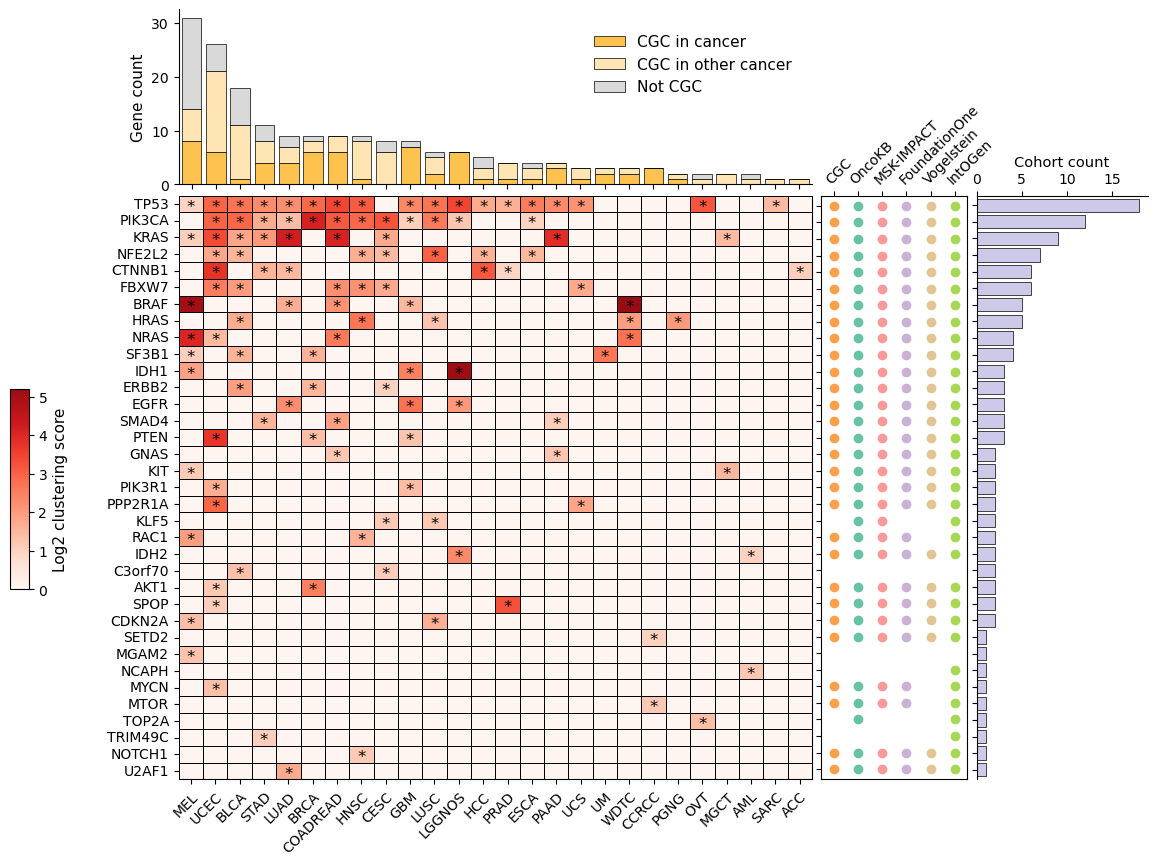

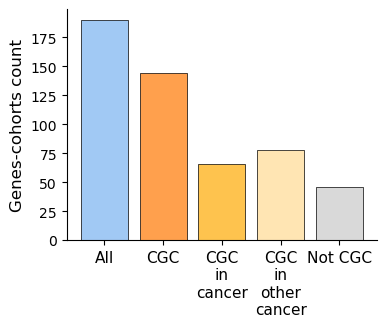

In [471]:
top_cohorts_n=None
top_genes_n=35

o3d_output = get_anomaly_df(genetable_subset, o3d_output_dir)
anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["Cohort"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                             cohort_df, 
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             anomaly_dict=anomaly_dict,
                                                                                             cgc_specific=True,
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict)

df_anomaly.columns = [cohort.split("_")[2] for cohort in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)
annot_cols = ["Gene", "cgc", "oncokb", "msk_impact", "fondone", "vogelstein", "intogen"]
annot_df = get_annot_gene_df(df_binary.index, genetable_subset, uniq_drivers_df, oncokb_df, cgc_df)[annot_cols]

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(12.5,10),
               width_ratios=[1, 0.23, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-1, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.1,
               wspace=0.03, 
               hspace=0.03,
               filename="landscape_heatmap_tcga.png",
               plot_cgc_specific=True)


# Get summary CGC hits across genetable
plot_o3d_cgc_hits(hits_df)

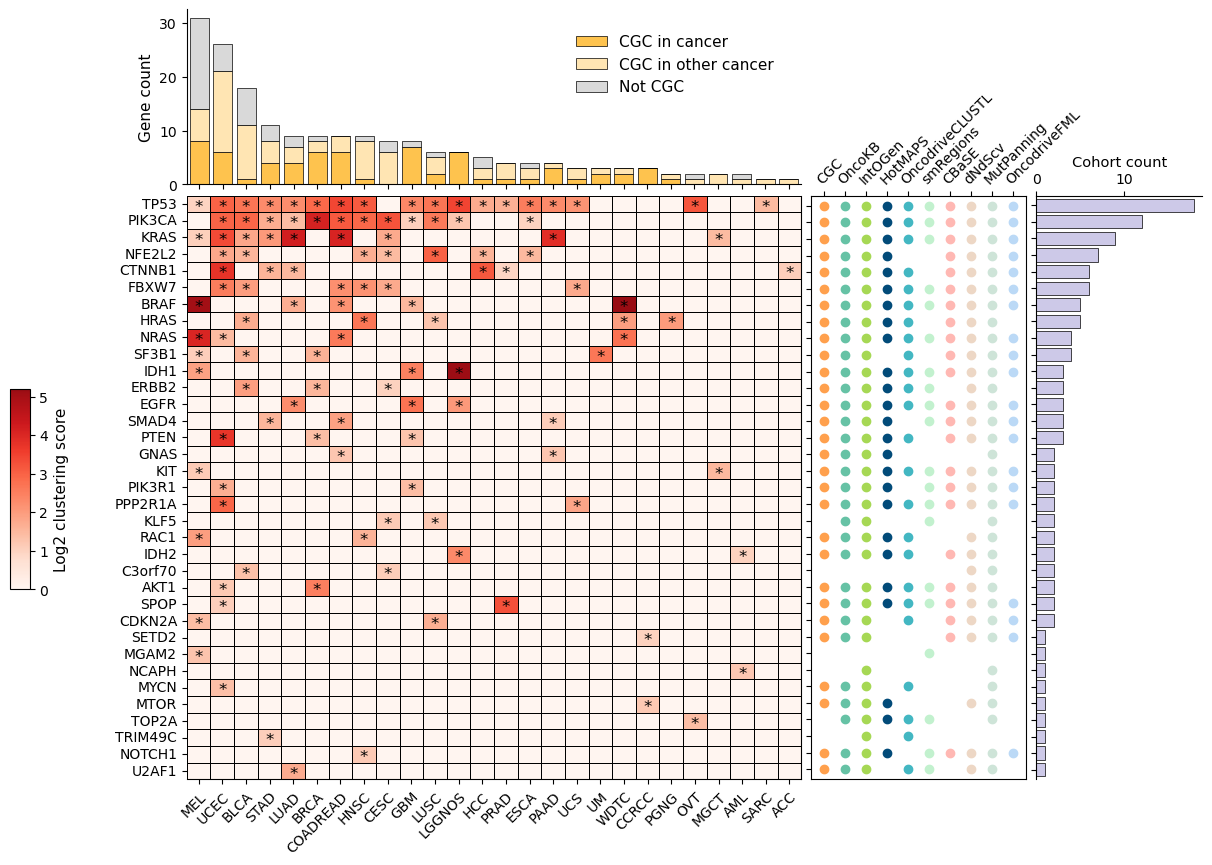

In [472]:
annot_cols = ["Gene", "cgc", "oncokb", "intogen", "hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
annot_df = get_annot_gene_df(df_binary.index, genetable_subset, uniq_drivers_df, oncokb_df, cgc_df)[annot_cols]

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(13.1,10),
               width_ratios=[1, 0.35, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-1.5, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.07,
               wspace=0.03, 
               hspace=0.03,
               plot_cgc_specific=True)

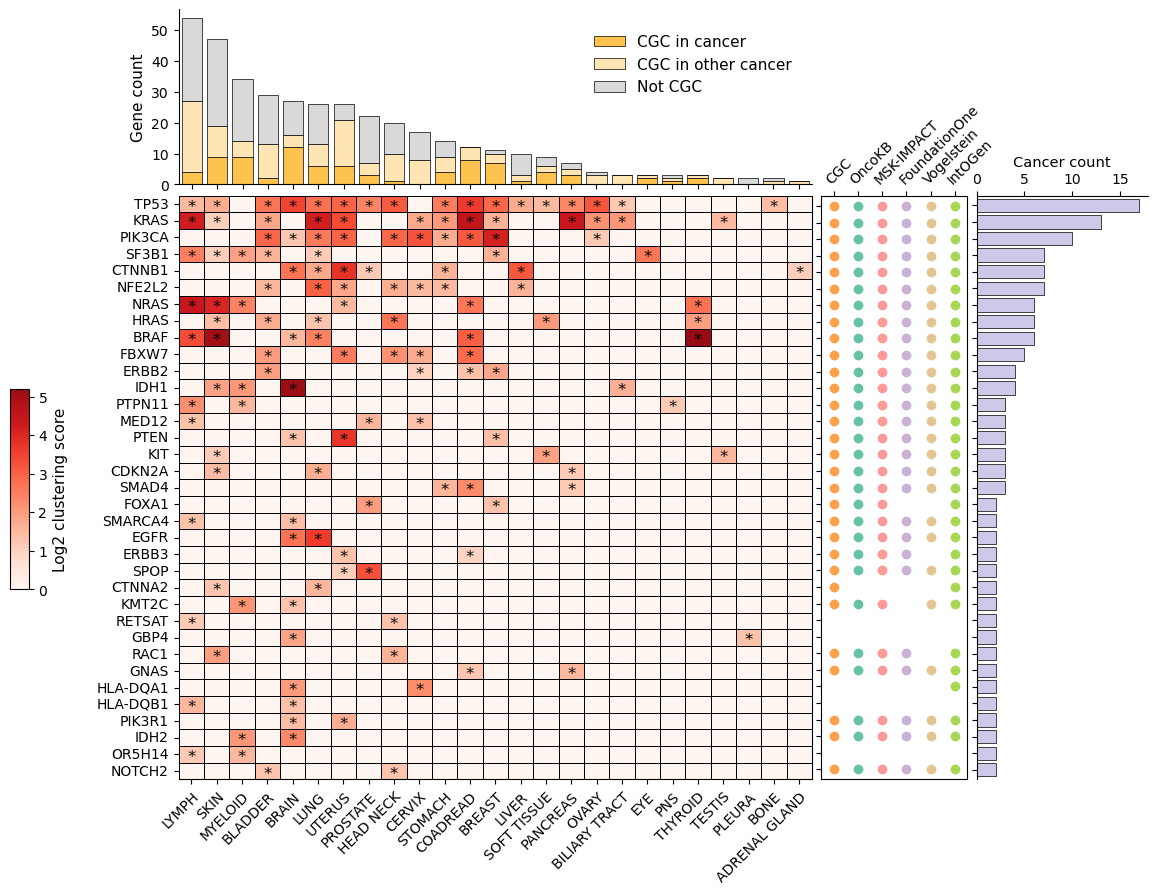

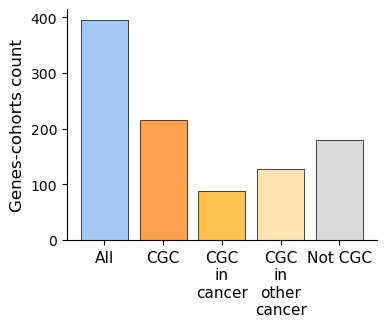

In [473]:
top_cohorts_n=None
top_genes_n=35 

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()

anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["GENERAL_CANCER_TYPE"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             anomaly_dict=anomaly_dict,
                                                                                             cgc_specific=True,
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)

annot_cols = ["Gene", "cgc", "oncokb", "msk_impact", "fondone", "vogelstein", "intogen"]
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)[annot_cols]

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(12.5,10),
               width_ratios=[1, 0.23, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-1, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.1,
               wspace=0.03, 
               hspace=0.03,
               plot_cgc_specific=True,
               right_ax_ylabel="Cancer count")
    

# Get summary CGC hits across genetable
plot_o3d_cgc_hits(hits_df)

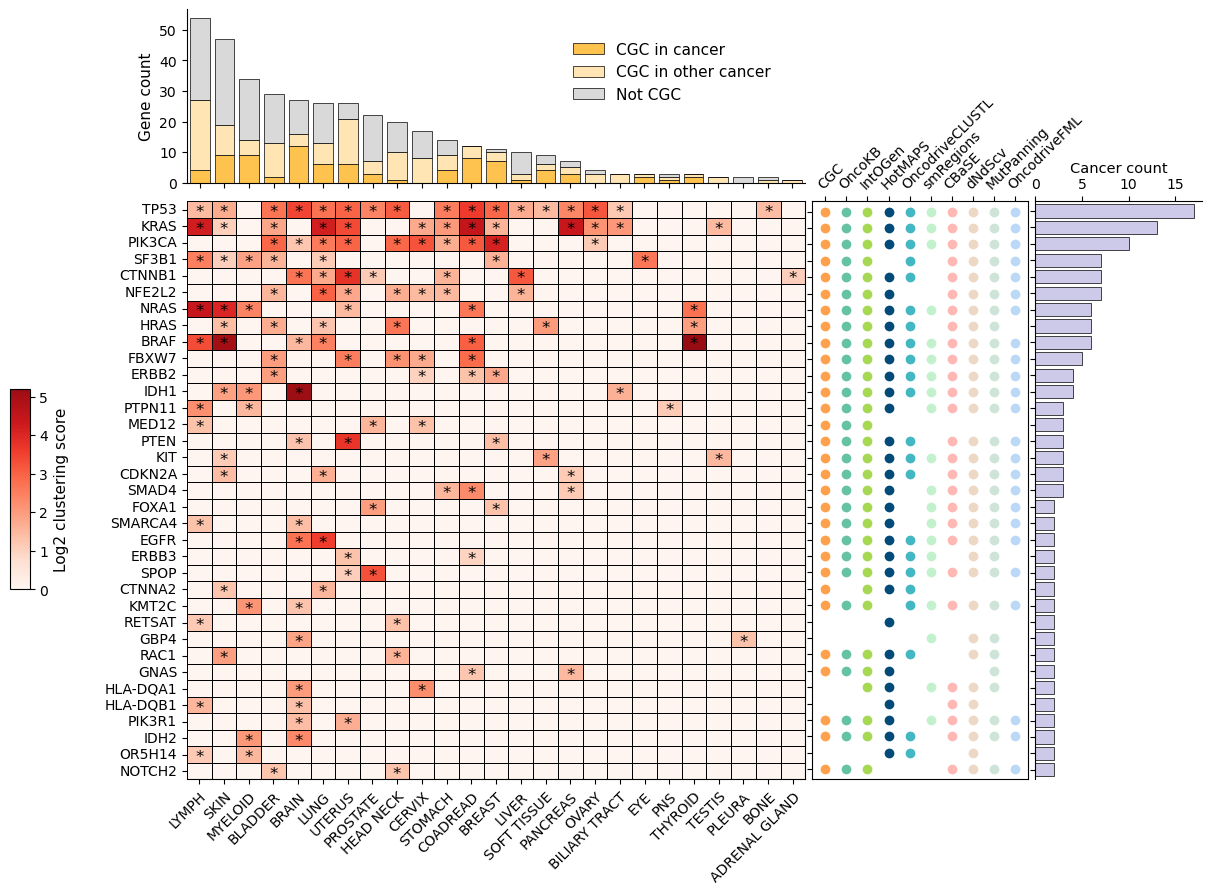

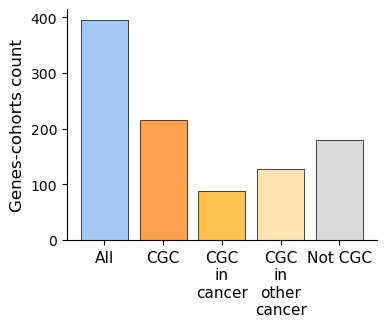

In [474]:
top_cohorts_n=None
top_genes_n=35 

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()

anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["GENERAL_CANCER_TYPE"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             anomaly_dict=anomaly_dict,
                                                                                             cgc_specific=True,
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)

annot_cols = ["Gene", "cgc", "oncokb", "intogen", "hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)[annot_cols]

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(13.1,10),
               width_ratios=[1, 0.35, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-1.5, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.07,
               plot_cgc_specific=True,
               right_ax_ylabel="Cancer count")
    

# Get summary CGC hits across genetable
plot_o3d_cgc_hits(hits_df)

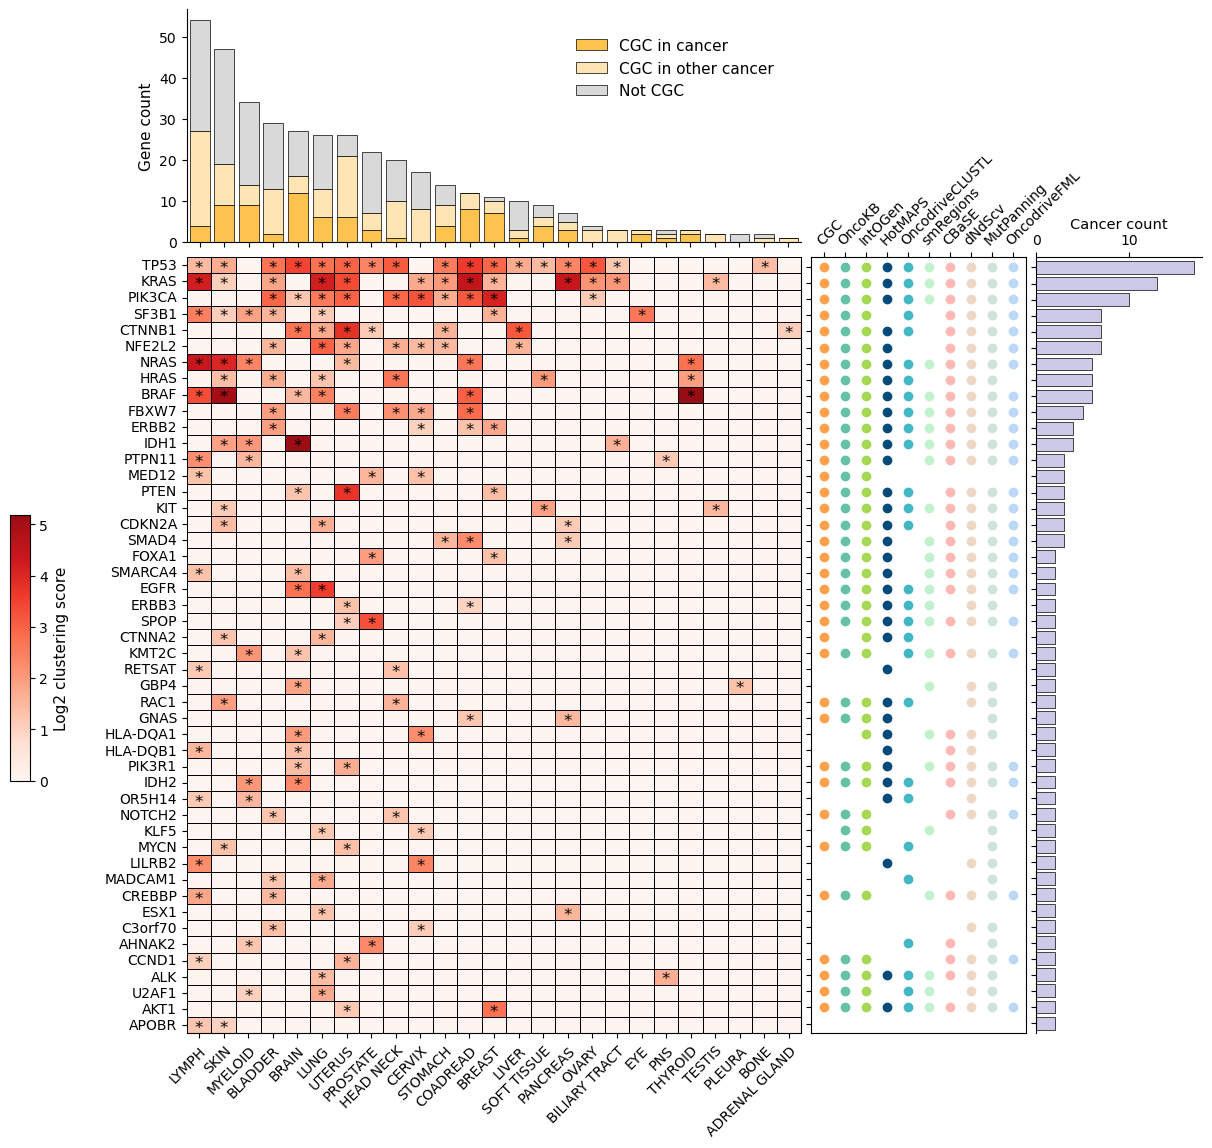

In [475]:
top_cohorts_n=None
top_genes_n=48

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()

anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["GENERAL_CANCER_TYPE"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             anomaly_dict=anomaly_dict,
                                                                                             cgc_specific=True,
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)

annot_cols = ["Gene", "cgc", "oncokb", "intogen", "hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)[annot_cols]


plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(13.1,13.3),
               width_ratios=[1, 0.35, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-1.5, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.013,
               ax6_xmargin=0.07,
               wspace=0.03, 
               hspace=0.03,
               plot_cgc_specific=True,
               right_ax_ylabel="Cancer count")

### Add additional annotation block for Intogen methods

Cohort    Gene  Uniprot_ID  qval  C_gene  \
0      HARTWIG_WGS_BLCA_2023  PIK3CA      P42336   0.0     1.0   
1      HARTWIG_WGS_BLCA_2023    RXRA      F1D8Q5   0.0     1.0   
2      HARTWIG_WGS_BLCA_2023   FGFR3      P22607   0.0     1.0   
3      HARTWIG_WGS_BLCA_2023   FBXW7      Q969H0   0.0     1.0   
4      HARTWIG_WGS_BLCA_2023    TP53      K7PPA8   0.0     1.0   
...                      ...     ...         ...   ...     ...   
71189          TCGA_WXS_PGNG   SUSD4      Q5VX71   1.0     0.0   
71190          TCGA_WXS_PGNG    PMM1  A0A024R1U5   1.0     0.0   
71191          TCGA_WXS_PGNG    NAGK  A0A384N6G7   1.0     0.0   
71192          TCGA_WXS_PGNG    ADH6      P28332   1.0     0.0   
71193          TCGA_WXS_PGNG     MAL  A0A024RE19   1.0     0.0   

                                                   C_pos  Clustering_score  \
0                                          [542 545 539]          6.608875   
1                                              [427 429]          5.260005   
2                                          [248 249 373]          5.135854   
3                                              [505 465]          3.409612   
4      [249 273 241 173 248 132 195 280 157 258 194 2...          3.377812   
...                                                  ...               ...   
71189                                                NaN          1.668006   
71190                                                NaN          1.332350   
71191                                                NaN          1.287737   
71192                                                NaN          1.279473   
71193                                                NaN          1.193756   

       CGC  Fish  
0      1.0   0.0  
1      0.0   0.0  
2      1.0   0.0  
3      1.0   0.0  
4      1.0   0.0  
...    ...   ...  
71189  0.0   0.0  
71190  0.0   0.0  
71191  0.0   0.0  
71192  0.0   1.0  
71193  1.0   0.0  

[71194 rows x 9 columns]

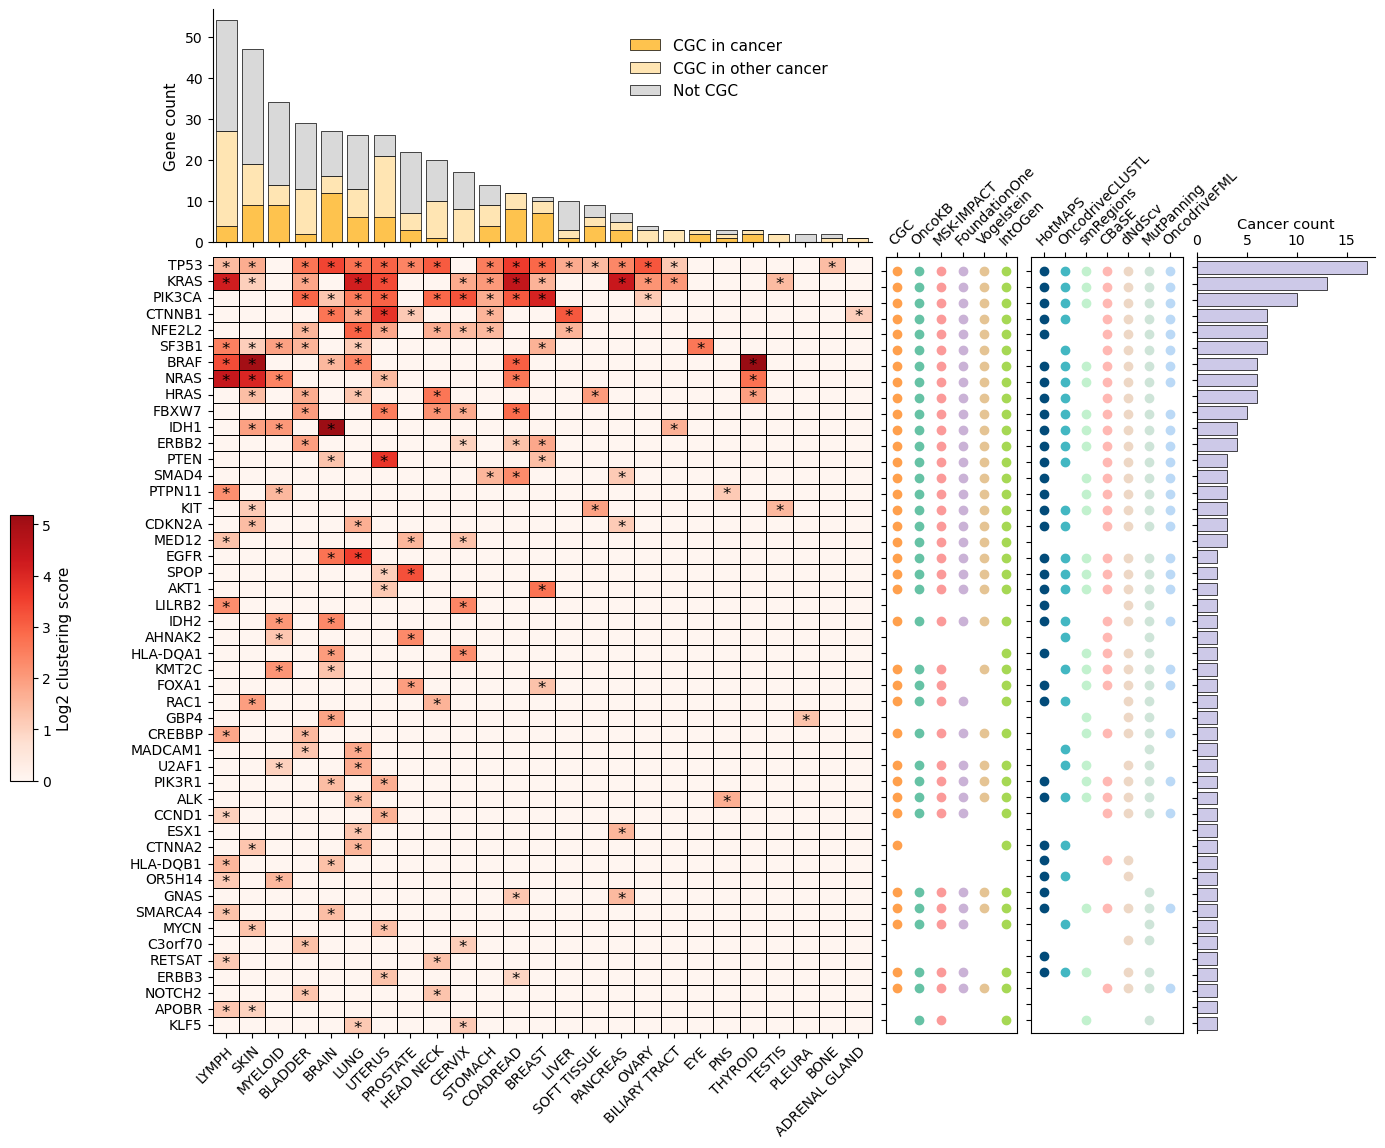

In [617]:
top_cohorts_n=None
top_genes_n=48

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_specific=True,
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)

annot_cols = ["Gene", "cgc", "oncokb", "msk_impact", "msk_heme", "fondone", "fondone_heme", "vogelstein", "intogen", "hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)[annot_cols]


plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(15,13.3),
               width_ratios=[1, 0.2, 0.23, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.03,
               plot_cgc_specific=True,
               right_ax_ylabel="Cancer count")

Cohort    Gene  Uniprot_ID  qval  C_gene  \
0      HARTWIG_WGS_BLCA_2023  PIK3CA      P42336   0.0     1.0   
1      HARTWIG_WGS_BLCA_2023    RXRA      F1D8Q5   0.0     1.0   
2      HARTWIG_WGS_BLCA_2023   FGFR3      P22607   0.0     1.0   
3      HARTWIG_WGS_BLCA_2023   FBXW7      Q969H0   0.0     1.0   
4      HARTWIG_WGS_BLCA_2023    TP53      K7PPA8   0.0     1.0   
...                      ...     ...         ...   ...     ...   
71189          TCGA_WXS_PGNG   SUSD4      Q5VX71   1.0     0.0   
71190          TCGA_WXS_PGNG    PMM1  A0A024R1U5   1.0     0.0   
71191          TCGA_WXS_PGNG    NAGK  A0A384N6G7   1.0     0.0   
71192          TCGA_WXS_PGNG    ADH6      P28332   1.0     0.0   
71193          TCGA_WXS_PGNG     MAL  A0A024RE19   1.0     0.0   

                                                   C_pos  Clustering_score  \
0                                          [542 545 539]          6.608875   
1                                              [427 429]          5.260005   
2                                          [248 249 373]          5.135854   
3                                              [505 465]          3.409612   
4      [249 273 241 173 248 132 195 280 157 258 194 2...          3.377812   
...                                                  ...               ...   
71189                                                NaN          1.668006   
71190                                                NaN          1.332350   
71191                                                NaN          1.287737   
71192                                                NaN          1.279473   
71193                                                NaN          1.193756   

       CGC  Fish  
0      1.0   0.0  
1      0.0   0.0  
2      1.0   0.0  
3      1.0   0.0  
4      1.0   0.0  
...    ...   ...  
71189  0.0   0.0  
71190  0.0   0.0  
71191  0.0   0.0  
71192  0.0   1.0  
71193  1.0   0.0  

[71194 rows x 9 columns]

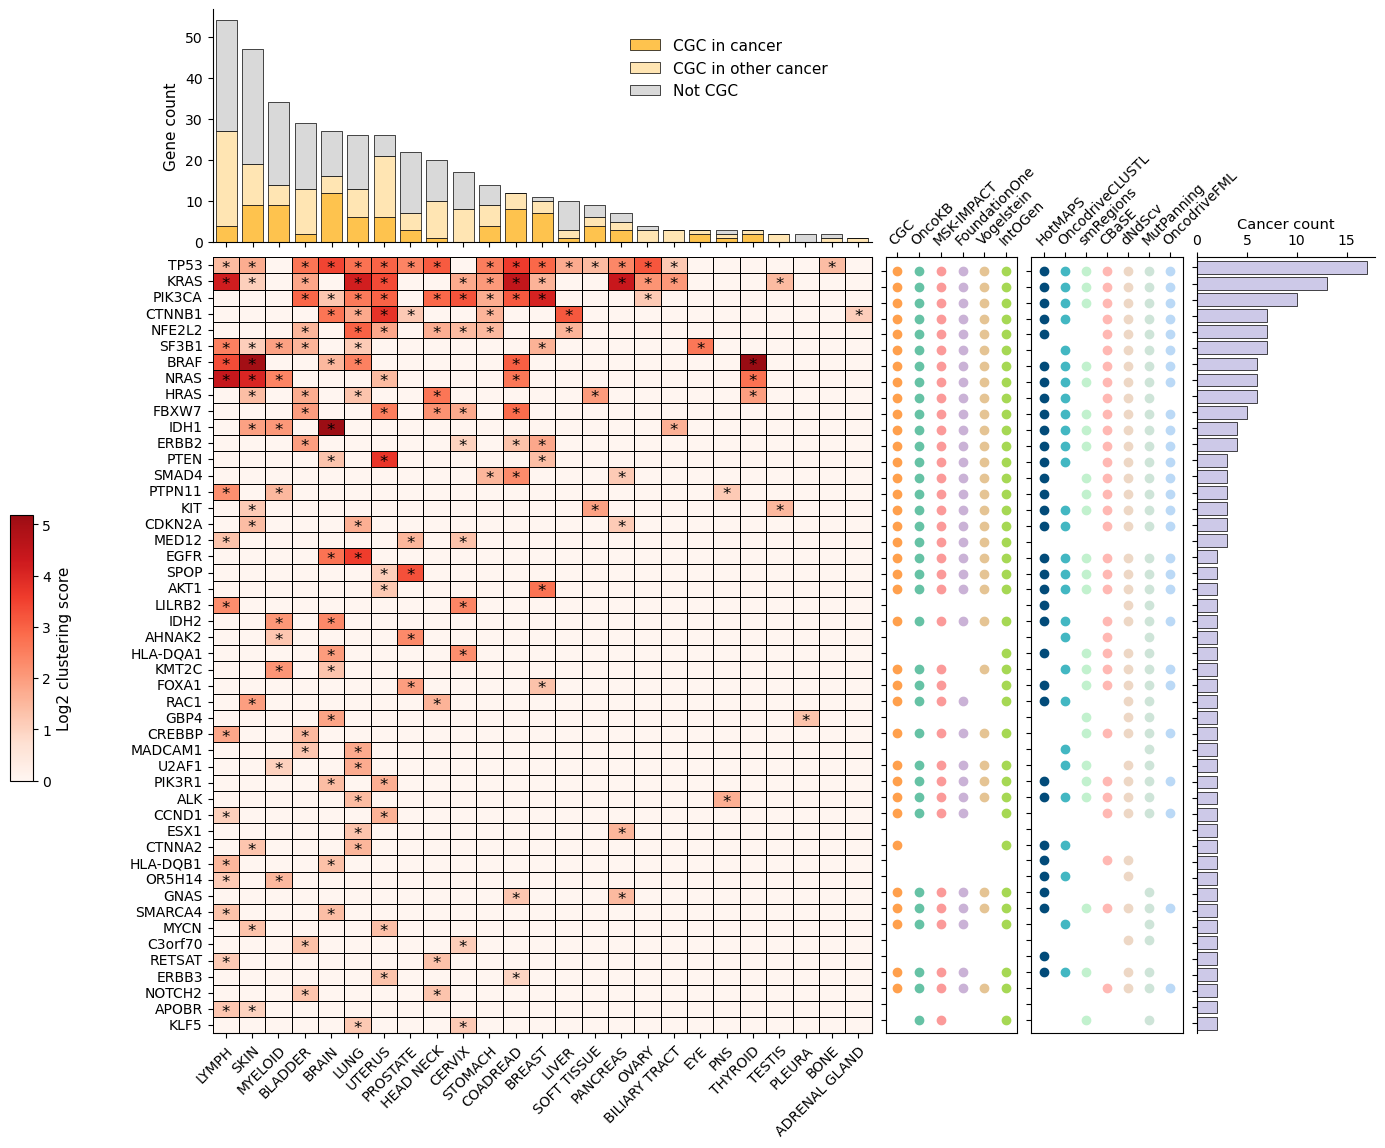

In [584]:
top_cohorts_n=None
top_genes_n=48

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_specific=True,
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)

annot_cols = ["Gene", "cgc", "oncokb", "msk_impact", "msk_heme", "fondone", "fondone_heme", "vogelstein", "intogen", "hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)[annot_cols]


plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(15,13.3),
               width_ratios=[1, 0.2, 0.23, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_xmargin=0.1,
               wspace=0.05, 
               hspace=0.03,
               plot_cgc_specific=True,
               right_ax_ylabel="Cancer count")

In [613]:
def get_gene_cohorts_binary(genetable_df, 
                            cohort_df, 
                            o3d_output_dir,
                            top_cohorts_n=None, 
                            top_genes_n=None, 
                            rm_empty_cols=True,
                            log_score=True,
                            cgc_specific=False,
                            cgc_df=None, 
                            cohorts_parent_dict=None,
                            grouped_by_cancer=False):

    # Get hits df and clustering score info
    hits_df = get_hits(genetable_df)
    o3d_output = get_anomaly_df(genetable_df, o3d_output_dir)

    # Count by general cancer
    if grouped_by_cancer:
        o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
        o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()
        anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
                                                                                  o3d_output["GENERAL_CANCER_TYPE"].values, 
                                                                                  o3d_output["Clustering_score"].values)}
        max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)
        target_col = "General_cancer"
        
    # Count by cohort
    else:
        o3d_output = get_anomaly_df(genetable_df, o3d_output_dir)
        anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                                  o3d_output["Cohort"].values, 
                                                                                  o3d_output["Clustering_score"].values)}
        max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)
        target_col = "Cohort"

    hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)
    cols_to_drop = ["Uniprot_ID", "Cancer", "Fish"]
    if grouped_by_cancer:
        cols_to_drop.append("Cohort")
    hits_df = hits_df.drop(columns=cols_to_drop).drop_duplicates().reset_index(drop=True)
    
    # Get count of cancer a gene has been detected as significant across all cohorts
    gene_hits_count = hits_df.groupby("Gene").apply(lambda x: len(x)).reset_index(name="Oncodrive3D")
    gene_hits_count = gene_hits_count.merge(
        max_score_df[["Gene", "Clustering_score"]], on="Gene", how="left").sort_values(
        by=['Oncodrive3D', 'Clustering_score'], ascending=[False, False]).set_index("Gene")
    # For a general cancer type get the number of unique CGC genes in that cancer, other cancer, not CGC
    cohort_hits_count = hits_df.groupby(target_col).apply(lambda x: get_cgc_specific_count_for_ttype(x)).sort_values("Oncodrive3D", ascending=False)
    
    if top_genes_n is None:
        top_genes_n = len(gene_hits_count)
    if top_cohorts_n is None:
        top_cohorts_n = len(cohort_hits_count)
    top_genes = gene_hits_count[:top_genes_n].index
    top_cohorts = cohort_hits_count[:top_cohorts_n].index

    # Get df anomaly and binary
    df_anomaly = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    df_binary = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    for cohort in top_cohorts:
        genes = hits_df[hits_df[target_col] == cohort].Gene.values
        genes = [gene for gene in genes if gene in df_anomaly.columns]
        # Df anomaly
        scores = [np.log(anomaly_dict[f"{gene}-{cohort}"]) if log_score else anomaly_dict[f"{gene}-{cohort}"] for gene in genes]    
        df_anomaly.loc[cohort, genes] = scores
        # Df binary
        df_binary.loc[cohort, genes] = 1

    df_anomaly = df_anomaly.T 
    df_binary = df_binary.T 
    if len(cohort_df) == 1:
        df_anomaly = df_anomaly.loc[hits_df.Gene]
        df_binary = df_binary.loc[hits_df.Gene]
        
    if rm_empty_cols:
        df_anomaly = df_anomaly.loc[:, ~(df_anomaly == 0).all()]
        df_binary = df_binary.loc[:, ~(df_binary == False).all()]

    gene_hits_count = gene_hits_count.loc[df_anomaly.index]
    cohort_hits_count = cohort_hits_count.loc[[cohort for cohort in cohort_hits_count.index if cohort in df_anomaly.columns]]

    return df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count

top_cohorts_n=None
top_genes_n=48

# df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
#                                                                                              cohort_df,
#                                                                                              o3d_output_dir=o3d_output_dir,
#                                                                                              top_cohorts_n=top_cohorts_n, 
#                                                                                              top_genes_n=top_genes_n, 
#                                                                                              cgc_specific=True,
#                                                                                              cgc_df=cgc_df, 
#                                                                                              cohorts_parent_dict=cohorts_tissue_parent_dict,
#                                                                                              grouped_by_cancer=True)


df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                             cohort_df,
                                                                                             o3d_output_dir=o3d_output_dir,
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             cgc_specific=True,
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=False)

Cohort    Gene  Uniprot_ID  qval  C_gene  \
0      TCGA_WXS_LUSC  NFE2L2      Q16236   0.0       1   
1      TCGA_WXS_LUSC    TP53      K7PPA8   0.0       1   
2      TCGA_WXS_LUSC  PIK3CA      P42336   0.0       1   
3      TCGA_WXS_LUSC  CDKN2A      K7PML8   0.0       1   
4      TCGA_WXS_LUSC    HRAS      P01112   0.0       1   
...              ...     ...         ...   ...     ...   
36091  TCGA_WXS_PGNG   SUSD4      Q5VX71   1.0       0   
36092  TCGA_WXS_PGNG    PMM1  A0A024R1U5   1.0       0   
36093  TCGA_WXS_PGNG    NAGK  A0A384N6G7   1.0       0   
36094  TCGA_WXS_PGNG    ADH6      P28332   1.0       0   
36095  TCGA_WXS_PGNG     MAL  A0A024RE19   1.0       0   

                                                   C_pos  Clustering_score  \
0                     [31 29 30 26 27 24 79 80 81 77 34]         20.512420   
1      [245 241 242 273 249 175 248 238 194 173 274 2...         14.640403   
2                        [ 542  545  547  539 1045 1047]         13.669229   
3          [ 83 114  84  85 118  81  50 108  53  20  48]          5.202005   
4                                             [13 12 61]          3.588907   
...                                                  ...               ...   
36091                                                NaN          1.668006   
36092                                                NaN          1.332350   
36093                                                NaN          1.287737   
36094                                                NaN          1.279473   
36095                                                NaN          1.193756   

       CGC  Fish  
0      1.0   0.0  
1      1.0   0.0  
2      1.0   0.0  
3      1.0   0.0  
4      1.0   0.0  
...    ...   ...  
36091  0.0   0.0  
36092  0.0   0.0  
36093  0.0   0.0  
36094  0.0   1.0  
36095  1.0   0.0  

[36096 rows x 9 columns]

/tmp/jobs/spellegrini/9964934/ipykernel_30761/3259731629.py:36: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)


In [611]:
gene_hits_count

Oncodrive3D  Clustering_score
Gene                                  
TP53              14         31.603613
KRAS               9         65.933711
PIK3CA             9         60.347787
NFE2L2             7         20.512420
CTNNB1             6         43.402745
BRAF               5        179.618281
HRAS               5         14.531444
FBXW7              5         12.655656
NRAS               4         57.088760
SF3B1              4         14.147752
PTEN               3         41.634486
ERBB2              3          7.057737
SMAD4              3          6.637406
IDH1               2        170.296501
SPOP               2         26.355313
EGFR               2         15.092119
AKT1               2         12.131780
IDH2               2         10.218917
RAC1               2          7.117122
PIK3R1             2          5.481215
CDKN2A             2          5.202005
KIT                2          4.565359
C3orf70            2          3.881935
GNAS               2          3.435434
KLF5               2          3.298833
GTF2I              1         35.263297
PPP2R1A            1         18.677192
GNAQ               1         18.591696
FGFR3              1         15.401595
BCOR               1         14.761121
GNA11              1         14.753669
CIC                1         13.067384
PCBP1              1         11.223980
FGFR2              1         10.722343
MAP2K1             1          8.864405
CNOT9              1          7.687517
MAPK1              1          6.810397
EPAS1              1          6.386988
RXRA               1          5.875343
AGAP6              1          5.845646
U2AF1              1          5.685302
SLC27A5            1          5.380448
RHOA               1          5.323195
KNSTRN             1          5.256621
SOX17              1          5.156049
CCND1              1          5.050030
DICER1             1          4.899068
VHL                1          4.372593

In [609]:
cohort_hits_count

Oncodrive3D  CGC_specific  Not_CGC  CGC_not_specific
General_cancer                                                      
SKIN                     31             8       17                 6
UTERUS                   26             6        5                15
BLADDER                  18             1        7                10
LUNG                     13             5        3                 5
STOMACH                  13             4        4                 5
BRAIN                    10             9        1                 0
COADREAD                  9             6        0                 3
HEAD_NECK                 9             1        1                 7
BREAST                    9             6        1                 2
CERVIX                    8             0        2                 6
LIVER                     5             1        2                 2
PANCREAS                  4             3        0                 1
PROSTATE                  4             1        0                 3
EYE                       3             2        0                 1
KIDNEY                    3             3        0                 0
THYROID                   3             2        0                 1
SOFT_TISSUE               3             1        0                 2
TESTIS                    2             0        0                 2
MYELOID                   2             0        1                 1
OVARY                     2             0        1                 1
THYMUS                    1             0        1                 0
ADRENAL_GLAND             1             0        0                 1

In [536]:

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()
max_score_df = o3d_output.groupby("Gene").max().reset_index().sort_values("Clustering_score", ascending=False)
max_score_df

Gene GENERAL_CANCER_TYPE  Clustering_score
1393     BRAF              UTERUS        179.618281
6045     IDH1                SKIN        170.296501
6870     KRAS              UTERUS         88.347831
8845     NRAS              UTERUS         81.875684
4182     ESR1              UTERUS         70.640336
...       ...                 ...               ...
4805    FRRS1                SKIN          0.410925
9819    PDE6D                SKIN          0.407732
10346  POLR2L           HEAD_NECK          0.392179
13628    TFPI                SKIN          0.370692
9922    PGAM2                SKIN          0.296727

[15821 rows x 3 columns]

In [540]:
get_hits(genetable)

Gene  Uniprot_ID       Cancer                 Cohort  CGC  Fish  \
0    PIK3CA      P42336         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
1      RXRA      F1D8Q5         BLCA  HARTWIG_WGS_BLCA_2023    0     0   
2     FGFR3      P22607         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
3     FBXW7      Q969H0         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
4      TP53      K7PPA8         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
..      ...         ...          ...                    ...  ...   ...   
614   MED12      Q93074         PRAD          TCGA_WXS_PRAD    1     0   
615  CTNNB1  A0A024R2Q3         PRAD          TCGA_WXS_PRAD    1     0   
616    TP53      K7PPA8  SOFT_TISSUE          TCGA_WXS_SARC    1     0   
617    HRAS      P01112         PGNG          TCGA_WXS_PGNG    1     0   
618   EPAS1      Q99814         PGNG          TCGA_WXS_PGNG    1     0   

     Oncodrive3D  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
614            1  
615            1  
616            1  
617            1  
618            1  

[619 rows x 7 columns]

In [568]:
hits_df = get_hits(genetable)
hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)
hits_df = hits_df.drop(columns=["Uniprot_ID", "Cancer", "Cohort", "Fish"]).drop_duplicates().reset_index(drop=True)
target_col = "General_cancer"
# Get count of cancer a gene has been detected as significant across all cohorts
gene_hits_count = hits_df.groupby("Gene").apply(lambda x: len(x)).reset_index(name="Oncodrive3D").sort_values("Oncodrive3D", ascending=False).set_index("Gene")
gene_hits_count

Oncodrive3D
Gene               
TP53             17
KRAS             13
PIK3CA           10
SF3B1             7
CTNNB1            7
...             ...
H3-3A             1
H3C2              1
HCAR3             1
HLA-A             1
ZNF93             1

[273 rows x 1 columns]

In [569]:
gene_hits_count.reset_index().merge(
    max_score_df[["Gene", "Clustering_score"]], on="Gene", how="left").sort_values(
    by=['Oncodrive3D', 'Clustering_score'], ascending=[False, False])[:60]

Gene  Oncodrive3D  Clustering_score
0        TP53           17         37.386387
1        KRAS           13         88.347831
2      PIK3CA           10         60.347787
4      CTNNB1            7         43.402745
5      NFE2L2            7         20.512420
3       SF3B1            7         14.147752
8        BRAF            6        179.618281
6        NRAS            6         81.875684
7        HRAS            6         14.531444
9       FBXW7            5         17.195667
11       IDH1            4        170.296501
10      ERBB2            4          7.057737
14       PTEN            3         41.634486
17      SMAD4            3          9.822950
12     PTPN11            3          9.258286
15        KIT            3          6.718944
16     CDKN2A            3          5.202005
13      MED12            3          4.689903
20       EGFR            2         35.581750
22       SPOP            2         26.355313
46       AKT1            2         14.870668
37     LILRB2            2         10.958535
32       IDH2            2         10.218917
42     AHNAK2            2          9.896982
29   HLA-DQA1            2          9.363782
24      KMT2C            2          8.272254
18      FOXA1            2          7.156568
27       RAC1            2          7.117122
26       GBP4            2          6.444293
39     CREBBP            2          6.160414
38    MADCAM1            2          5.788501
45      U2AF1            2          5.685302
31     PIK3R1            2          5.481215
44        ALK            2          5.235295
43      CCND1            2          5.050030
40       ESX1            2          4.759795
23     CTNNA2            2          4.683756
30   HLA-DQB1            2          4.612609
33     OR5H14            2          4.506515
28       GNAS            2          4.424640
19    SMARCA4            2          4.015552
36       MYCN            2          3.909558
41    C3orf70            2          3.881935
25     RETSAT            2          3.745953
21      ERBB3            2          3.717064
34     NOTCH2            2          3.656038
47      APOBR            2          3.397238
35       KLF5            2          3.298833
153      ESR1            1         70.640336
266     GTF2I            1         35.263297
196        AR            1         28.932888
58    PPP2R1A            1         18.677192
264      GNAQ            1         18.591696
251     FGFR3            1         15.401595
268     H3-3A            1         14.937598
206      BCOR            1         14.761121
261     GNA11            1         14.753669
212      EZH2            1         14.046783
156       CIC            1         13.067384
256     FOXO1            1         13.000404

In [518]:
hits_df.groupby("Gene").apply(lambda x: len(x)).reset_index(name="Oncodrive3D").sort_values("Oncodrive3D", ascending=False).set_index("Gene")

Oncodrive3D
Gene               
TP53             14
KRAS              9
PIK3CA            9
NFE2L2            7
CTNNB1            6
...             ...
ERBB3             1
EPAS1             1
EEF1A1            1
DICER1            1
ZNF665            1

[103 rows x 1 columns]

0
1
2
3
4
5
6
7
8
9


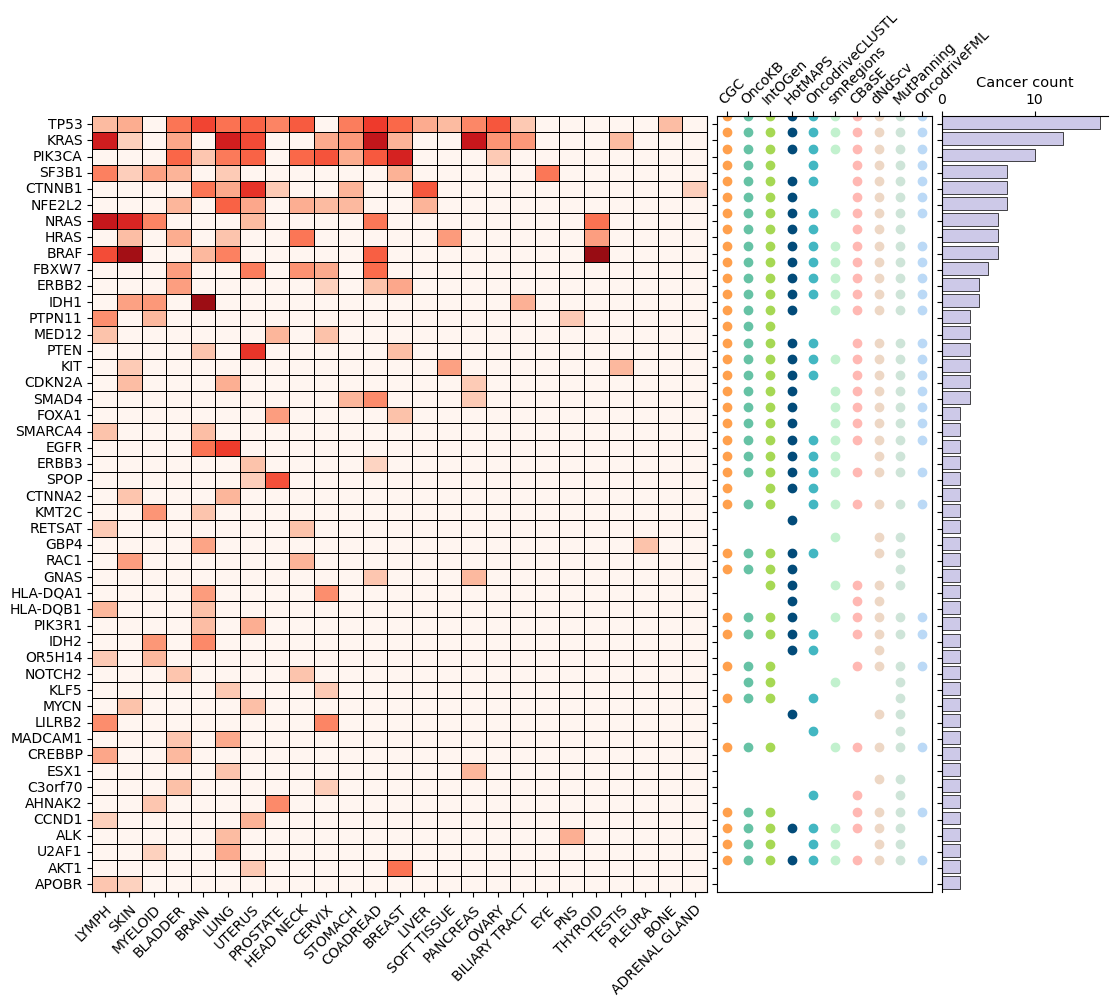

In [459]:
def plot_landscape(df, 
                   gene_colors, 
                   lut, 
                   gene_hits_count, 
                   cohort_hits_count,
                   colors_dict,
                   names_dict,
                   annot_df,
                   df_anomaly=None,
                   figsize=(16,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.1),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   ax6_margin=0.018,
                   ax6_xmargin=0.07,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.3, 0.015, .2],
                   intogen_label=False,
                   intogen_label_table=None,
                   filename=None,
                   divergent_palette=False,
                   color_gene=False,
                   plot_cgc_specific=False,
                   right_ax_ylabel="Cohort count"):
    
    if df_anomaly is not None:
        df_binary = df
        df = df_anomaly
        cmap = "vlag"
        cmap = create_custom_colormap()
    else:
        colors = ["lightgray", "gray"] 
        cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
    if divergent_palette:
        cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    #col_labels = [ctype_dict[cohort] for cohort  in col_labels]
    
    # gene_sums = gene_hits_count["Oncodrive3D"].values
    # cohort_sums = cohort_hits_count["Oncodrive3D"].values
    
    # if plot_cgc_specific:
    #     cgc_specific = cohort_hits_count["CGC_specific"].values
    #     cgc_not_specific = cohort_hits_count["CGC_not_specific"].values
    #     not_cgc = cohort_hits_count["Not_CGC"].values  
    # else:
    #     cgc = cohort_hits_count["CGC"].values
    #     not_cgc = cohort_hits_count["Not_CGC"].values
    
    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(2, 3, 
                           figsize=figsize, 
                           gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios},
                           sharey='row')
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,2]
    ax5 = ax[0,2]
    ax6 = ax[1,1]
    
    # Create the heatmap
    if df_anomaly is not None and divergent_palette:
        vmax = df_anomaly.max().max()
        vmin = -vmax
    else:
        vmax, vmin = None, None
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=0.5, 
                linecolor="black", vmax=vmax, vmin=vmin)
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)
    
    # Add bars for the right axis
    ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black", lw=0.5, align='edge')
    #ax4.set_yticks(np.arange(len(gene_sums)))
    #ax4.set_yticklabels(row_labels)  # Set y-tick labels to match the heatmap
    ax4.set_xlabel(right_ax_ylabel, fontsize=10.5)
    # ax4.invert_yaxis()
    
    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top')
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['right'].set_visible(False)
    
    # Add annotation track
    # ====================
    
    genes = annot_df['Gene']
    annot_df = annot_df.drop(columns=['Gene'])
    
    # Loop through each column
    for j, col in enumerate(annot_df.columns):
        # Get the indices where the value is 1
        indices = annot_df.index[annot_df[col] == 1].tolist()
        # indices = indices + 0.5
        
        ax6.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
        print(j)
    
    # ax6.set_yticks(np.arange(len(gene_sums)))
    # ax6.set_yticklabels([])
    ax6.set_xticks(range(len(annot_df.columns)))
    ax6.set_xticklabels([names_dict[col] for col in annot_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    # ax6.invert_yaxis()
    
    ax6.xaxis.tick_top()
    ax6.xaxis.set_label_position('top')
    # ax6.spines['bottom'].set_visible(False)
    # ax6.spines['right'].set_visible(False)
    
    # # Add bars for the top axis
    # if plot_cgc_specific: 
    #     ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, 
    #             color="#fec34e", edgecolor='black', label='CGC in cancer', lw=0.5)
    #     ax1.bar(np.arange(len(cohort_hits_count)), cgc_not_specific, bottom=cgc_specific, 
    #             color="#ffe5b3", edgecolor='black', label='CGC in other cancer', lw=0.5)
    #     ax1.bar(np.arange(len(cohort_hits_count)), not_cgc, bottom=np.array(cgc_specific) + np.array(cgc_not_specific), 
    #             color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)
    # else:
    #     ax1.bar(np.arange(len(cohort_hits_count)), cgc, color="#ffbb80", edgecolor='black', label='CGC', lw=0.5)
    #     ax1.bar(np.arange(len(cohort_hits_count)), cgc_specific, bottom=cgc, color="#d9d9d9", edgecolor='black', label='Not CGC', lw=0.5)
    # ax1.set_xticks(np.arange(len(cohort_sums)))
    # ax1.set_ylabel("Gene count", fontsize=11)
    # ax1.set_xticklabels([])
    # ax1.spines['top'].set_visible(False)
    # ax1.spines['right'].set_visible(False)
    
    # Details
    ax1.remove() #### TO DEL
    ax2.remove()
    ax5.remove()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    # ax1.margins(x=ax1_margin, tight=True)
    # ax4.margins(y=ax4_margin, tight=True)
    # ax6.margins(y=ax6_margin, x=ax6_xmargin, tight=True)
    
    # handles, labels = ax3.get_legend_handles_labels()
    # if intogen_label:
    #     handles.append(mpatches.Patch(facecolor=lut["Detected"], edgecolor="black", label='Detected', lw=0.5))
    #     handles.append(mpatches.Patch(facecolor=lut["Not detected"], edgecolor="black", label="Not detected", lw=0.5))
    #     legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, 
    #                         title="Detected in IntOGen", title_fontsize=11, fontsize=11)
    # elif plot_cgc_specific:
    #     handles.append(mpatches.Patch(facecolor="#fec34e", edgecolor="black", label='CGC in cancer', lw=0.5))
    #     handles.append(mpatches.Patch(facecolor="#ffe5b3", edgecolor="black", label="CGC in other cancer", lw=0.5))
    #     handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
    #     legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    # else:
    #     handles.append(mpatches.Patch(facecolor="#ffbb80", edgecolor="black", label='CGC', lw=0.5))
    #     handles.append(mpatches.Patch(facecolor="#d9d9d9", edgecolor="black", label="Not CGC", lw=0.5))
    #     legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, fontsize=11)
    # if color_gene:
    #     for i, label in enumerate(ax3.get_yticklabels()):
    #         label.set_color(gene_colors[i])
    #     for text in legend.get_texts():
    #         text.set_color(lut[text.get_text()])
    
    # if df_anomaly is not None:
    #     # Set cbar
    #     cbar_ax = fig.add_axes(cbar_loc) 
    #     cbar = fig.colorbar(ax3.collections[0], cax=cbar_ax)
    #     cbar.set_label('Log2 clustering score', fontsize=11) 
        
    #     # Overlay stars on top of the heatmap
    #     for i in range(len(row_labels)):
    #         for j in range(len(col_labels)):
    #             if df_binary.iloc[i, j] == 1:
    #                 ax3.text(j + 0.5, i + 0.65, '*', ha='center', va='center', fontsize=12, color='black')
           
    #     # Overlay ^ for IntOGen hits
    #     if intogen_label_table is not None:   
    #         for i in range(len(row_labels)):
    #             for j in range(len(col_labels)):
    #                 if intogen_label_table.iloc[i, j] == 1:
    #                     ax3.text(j + 0.5, i + 0.65, '^', ha='center', va='top', fontsize=12, color='black')

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()



plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(13.1,13.3),
               width_ratios=[1, 0.35, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-1.5, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.013,
               ax6_xmargin=0.07,
               wspace=0.03, 
               hspace=0.03,
               plot_cgc_specific=True,
               right_ax_ylabel="Cancer count")

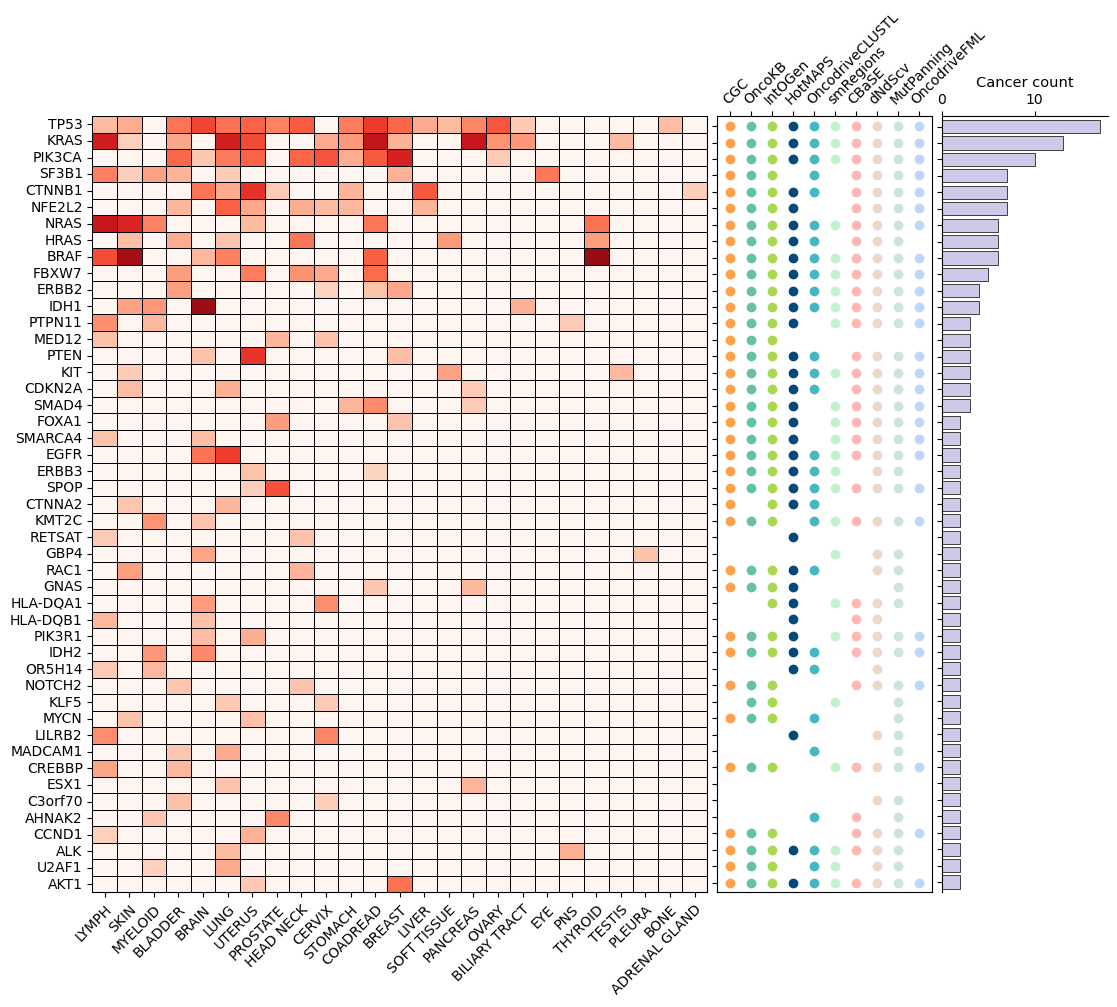

In [460]:
def plot_landscape(df, 
                   gene_colors, 
                   lut, 
                   gene_hits_count, 
                   cohort_hits_count,
                   colors_dict,
                   names_dict,
                   annot_df,
                   df_anomaly=None,
                   figsize=(16,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.1),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   ax6_margin=0.018,
                   ax6_xmargin=0.07,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.3, 0.015, .2],
                   intogen_label=False,
                   intogen_label_table=None,
                   filename=None,
                   divergent_palette=False,
                   color_gene=False,
                   plot_cgc_specific=False,
                   right_ax_ylabel="Cohort count"):
    
    if df_anomaly is not None:
        df_binary = df
        df = df_anomaly
        cmap = "vlag"
        cmap = create_custom_colormap()
    else:
        colors = ["lightgray", "gray"] 
        cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
    if divergent_palette:
        cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    gene_sums = gene_hits_count["Oncodrive3D"].values

    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(2, 3, 
                           figsize=figsize, 
                           gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios})
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,2]
    ax5 = ax[0,2]
    ax6 = ax[1,1]
    
    # Create the heatmap
    if df_anomaly is not None and divergent_palette:
        vmax = df_anomaly.max().max()
        vmin = -vmax
    else:
        vmax, vmin = None, None
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=0.5, 
                linecolor="black", vmax=vmax, vmin=vmin)
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)
    
    # Add bars for the right axis
    ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black", lw=0.5)
    ax4.set_yticks(np.arange(len(gene_sums)))
    ax4.set_yticklabels([])
    ax4.set_xlabel(right_ax_ylabel, fontsize=10.5)
    ax4.invert_yaxis()
    
    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top')
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['right'].set_visible(False)
    
    # Add annotation track
    # ====================
    
    genes = annot_df['Gene']
    annot_df = annot_df.drop(columns=['Gene'])
    
    # Loop through each column
    for j, col in enumerate(annot_df.columns):
        # Get the indices where the value is 1
        indices = annot_df.index[annot_df[col] == 1].tolist()
        ax6.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    ax6.set_yticks(np.arange(len(gene_sums)))
    ax6.set_yticklabels([])
    ax6.set_xticks(range(len(annot_df.columns)))
    ax6.set_xticklabels([names_dict[col] for col in annot_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    
    # ax6.set_xlabel("Annotation", fontsize=10.5)
    ax6.invert_yaxis()
    
    ax6.xaxis.tick_top()
    ax6.xaxis.set_label_position('top')
  
    
    # Details
    ax1.remove() #### TO DEL
    ax2.remove()
    ax5.remove()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    ax1.margins(x=ax1_margin, tight=True)
    ax4.margins(y=ax4_margin, tight=True)
    ax6.margins(y=ax6_margin, x=ax6_xmargin, tight=True)

    plt.show()


######## GO ########
# ---------------- #

top_cohorts_n=None
top_genes_n=47 

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()

anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["GENERAL_CANCER_TYPE"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                             cohort_df, 
                                                                                             top_cohorts_n=top_cohorts_n, 
                                                                                             top_genes_n=top_genes_n, 
                                                                                             anomaly_dict=anomaly_dict,
                                                                                             cgc_specific=True,
                                                                                             cgc_df=cgc_df, 
                                                                                             cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                             grouped_by_cancer=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)

annot_cols = ["Gene", "cgc", "oncokb", "intogen", "hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)[annot_cols]

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(13.1,13.3),
               width_ratios=[1, 0.35, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-1.5, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.013,
               ax6_xmargin=0.07,
               wspace=0.03, 
               hspace=0.03,
               plot_cgc_specific=True,
               right_ax_ylabel="Cancer count")

In [457]:
annot_df

Gene  cgc  oncokb  intogen  hotmaps  clustl  smreg  cbase  dndscv  \
0       TP53    1       1        1        1       1      1      1       1   
1       KRAS    1       1        1        1       1      1      1       1   
2     PIK3CA    1       1        1        1       1      1      1       1   
3      SF3B1    1       1        1        0       1      0      1       1   
4     CTNNB1    1       1        1        1       1      0      1       1   
5     NFE2L2    1       1        1        1       0      0      1       1   
6       NRAS    1       1        1        1       1      1      1       1   
7       HRAS    1       1        1        1       1      0      1       1   
8       BRAF    1       1        1        1       1      1      1       1   
9      FBXW7    1       1        1        1       1      1      1       1   
10     ERBB2    1       1        1        1       1      1      1       1   
11      IDH1    1       1        1        1       1      1      1       1   
12    PTPN11    1       1        1        1       0      1      1       1   
13     MED12    1       1        1        0       0      0      0       0   
14      PTEN    1       1        1        1       1      0      1       1   
15       KIT    1       1        1        1       1      1      1       1   
16    CDKN2A    1       1        1        1       1      0      1       1   
17     SMAD4    1       1        1        1       0      1      1       1   
18     FOXA1    1       1        1        1       0      1      1       1   
19   SMARCA4    1       1        1        1       0      1      1       1   
20      EGFR    1       1        1        1       1      1      1       1   
21     ERBB3    1       1        1        1       1      1      0       1   
22      SPOP    1       1        1        1       1      1      1       1   
23    CTNNA2    1       0        1        1       1      0      0       0   
24     KMT2C    1       1        1        0       1      1      1       1   
25    RETSAT    0       0        0        1       0      0      0       0   
26      GBP4    0       0        0        0       0      1      0       1   
27      RAC1    1       1        1        1       1      0      0       1   
28      GNAS    1       1        1        1       0      0      0       0   
29  HLA-DQA1    0       0        1        1       0      1      1       1   
30  HLA-DQB1    0       0        0        1       0      0      1       1   
31    PIK3R1    1       1        1        1       0      1      1       1   
32      IDH2    1       1        1        1       1      0      1       1   
33    OR5H14    0       0        0        1       1      0      0       1   
34    NOTCH2    1       1        1        0       0      0      1       1   
35      KLF5    0       1        1        0       0      1      0       0   
36      MYCN    1       1        1        0       1      0      0       0   
37    LILRB2    0       0        0        1       0      0      0       1   
38   MADCAM1    0       0        0        0       1      0      0       0   
39    CREBBP    1       1        1        0       0      1      1       1   
40      ESX1    0       0        0        0       0      0      0       0   
41   C3orf70    0       0        0        0       0      0      0       1   
42    AHNAK2    0       0        0        0       1      0      1       0   
43     CCND1    1       1        1        0       0      0      1       1   
44       ALK    1       1        1        1       1      1      1       1   
45     U2AF1    1       1        1        0       1      1      0       1   
46      AKT1    1       1        1        1       1      1      1       1   
47     APOBR    0       0        0        0       0      0      0       0   

    mutpan  fml  
0        1    1  
1        1    1  
2        1    1  
3        1    1  
4        1    1  
5        1    1  
6        1    1  
7        1    0  
8        1    1  
9        1    1  
10       1    1  
11       1    1  


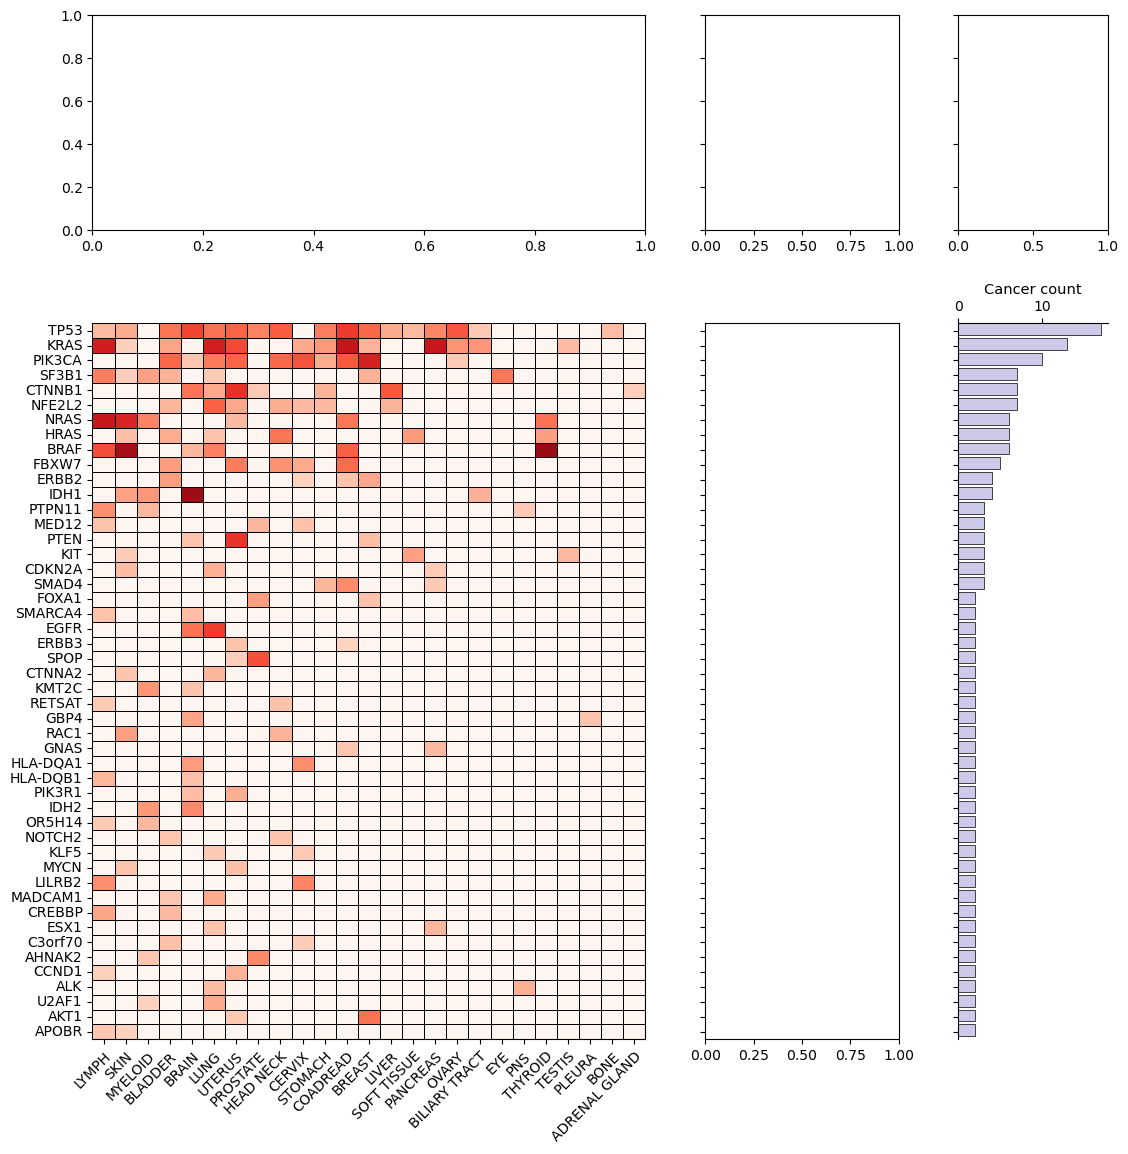

In [437]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def plot_landscape(df, 
                   gene_colors, 
                   lut, 
                   gene_hits_count, 
                   cohort_hits_count,
                   colors_dict,
                   names_dict,
                   annot_df,
                   df_anomaly=None,
                   figsize=(16,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.1),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   ax6_margin=0.018,
                   ax6_xmargin=0.07,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.3, 0.015, .2],
                   intogen_label=False,
                   intogen_label_table=None,
                   filename=None,
                   divergent_palette=False,
                   color_gene=False,
                   plot_cgc_specific=False,
                   right_ax_ylabel="Cohort count"):
    
    if df_anomaly is not None:
        df_binary = df
        df = df_anomaly
        cmap = "vlag"
        cmap = create_custom_colormap()
    else:
        colors = ["lightgray", "gray"] 
        cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
    if divergent_palette:
        cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    gene_sums = gene_hits_count["Oncodrive3D"].values

    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(2, 3, 
                           figsize=figsize, 
                           gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios})
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,2]
    ax5 = ax[0,2]
    ax6 = ax[1,1]
    
    # Create the heatmap
    if df_anomaly is not None and divergent_palette:
        vmax = df_anomaly.max().max()
        vmin = -vmax
    else:
        vmax, vmin = None, None
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=0.5, 
                linecolor="black", vmax=vmax, vmin=vmin)
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)
    
    # Add bars for the right axis
    ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black", lw=0.5)
    ax4.set_yticks(np.arange(len(gene_sums)))
    ax4.set_yticklabels([])  # Remove y-tick labels from the bar plot
    ax4.set_xlabel(right_ax_ylabel, fontsize=10.5)
    ax4.invert_yaxis()
    
    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top')
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['right'].set_visible(False)
    
    # Add annotation track
    # ====================
    
    genes = annot_df['Gene']
    annot_df = annot_df.drop(columns=['Gene'])
    
    # # Loop through each column
    # for j, col in enumerate(annot_df.columns):
    #     # Get the indices where the value is 1
    #     indices = annot_df.index[annot_df[col] == 1].tolist()
    #     ax6.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    # # Set y-ticks to match heatmap and bar plot
    # ax6.set_yticks(np.arange(len(gene_sums)))
    # ax6.set_yticklabels([])  # Remove y-tick labels from the scatter plot
    # ax6.set_xticks(range(len(annot_df.columns)))
    # ax6.set_xticklabels([names_dict[col] for col in annot_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    
    # # ax6.set_xlabel("Annotation", fontsize=10.5)
    # ax6.invert_yaxis()
    
    # ax6.xaxis.tick_top()
    # ax6.xaxis.set_label_position('top')
  
    
    # Details
    ax1.remove() #### TO DEL
    ax2.remove()
    ax5.remove()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    ax1.margins(x=ax1_margin, tight=True)
    ax4.margins(y=ax4_margin, tight=True)
    ax6.margins(y=ax6_margin, x=ax6_xmargin, tight=True)

    plt.show()



import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def plot_landscape(df, 
                   gene_colors, 
                   lut, 
                   gene_hits_count, 
                   cohort_hits_count,
                   colors_dict,
                   names_dict,
                   annot_df,
                   df_anomaly=None,
                   figsize=(16,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.1),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   ax6_margin=0.018,
                   ax6_xmargin=0.07,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.3, 0.015, .2],
                   intogen_label=False,
                   intogen_label_table=None,
                   filename=None,
                   divergent_palette=False,
                   color_gene=False,
                   plot_cgc_specific=False,
                   right_ax_ylabel="Cohort count"):
    
    if df_anomaly is not None:
        df_binary = df
        df = df_anomaly
        cmap = "vlag"
        cmap = create_custom_colormap()
    else:
        colors = ["lightgray", "gray"] 
        cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
    if divergent_palette:
        cmap = sns.color_palette("coolwarm", as_cmap=True)
    
    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    gene_sums = gene_hits_count["Oncodrive3D"].values

    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(2, 3, 
                           figsize=figsize, 
                           gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios},
                           sharey='row')  # Share y-axis across rows
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,2]
    ax5 = ax[0,2]
    ax6 = ax[1,1]
    
    # Create the heatmap
    if df_anomaly is not None and divergent_palette:
        vmax = df_anomaly.max().max()
        vmin = -vmax
    else:
        vmax, vmin = None, None
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=0.5, 
                linecolor="black", vmax=vmax, vmin=vmin)
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)
    
    # Add bars for the right axis
    ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black", lw=0.5, align='edge')
    #ax4.set_yticks(np.arange(len(gene_sums)))
    #ax4.set_yticklabels(row_labels)  # Set y-tick labels to match the heatmap
    ax4.set_xlabel(right_ax_ylabel, fontsize=10.5)
    # ax4.invert_yaxis()
    
    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top')
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['right'].set_visible(False)
    
    # # Add annotation track
    # # ====================
    
    # genes = annot_df['Gene']
    # annot_df = annot_df.drop(columns=['Gene'])
    
    # # Loop through each column
    # for j, col in enumerate(annot_df.columns):
    #     # Get the indices where the value is 1
    #     indices = annot_df.index[annot_df[col] == 1].tolist()
    #     ax6.scatter([j] * len(indices), indices, color=colors_dict[names_dict[col]])
    
    # # Set y-ticks to match heatmap and bar plot
    # ax6.set_yticks(np.arange(len(gene_sums)))
    # ax6.set_yticklabels([])  # Remove y-tick labels from the scatter plot
    # ax6.set_xticks(range(len(annot_df.columns)))
    # ax6.set_xticklabels([names_dict[col] for col in annot_df.columns], rotation=45, rotation_mode="anchor", ha='left') 
    
    # # ax6.set_xlabel("Annotation", fontsize=10.5)
    # ax6.invert_yaxis()
    
    # ax6.xaxis.tick_top()
    # ax6.xaxis.set_label_position('top')
  
    # # Details
    # ax1.remove() #### TO DEL
    # ax2.remove()
    # ax5.remove()
    # plt.subplots_adjust(wspace=wspace, hspace=hspace)
    # ax1.margins(x=ax1_margin, tight=True)
    # ax4.margins(y=ax4_margin, tight=True)
    # ax6.margins(y=ax6_margin, x=ax6_xmargin, tight=True)

    plt.show()


# top_cohorts_n=None
# top_genes_n=48 

# o3d_output = get_anomaly_df(genetable, o3d_output_dir)
# o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
# o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()

# anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
#                                                                           o3d_output["GENERAL_CANCER_TYPE"].values, 
#                                                                           o3d_output["Clustering_score"].values)}

# df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
#                                                                                              cohort_df, 
#                                                                                              top_cohorts_n=top_cohorts_n, 
#                                                                                              top_genes_n=top_genes_n, 
#                                                                                              anomaly_dict=anomaly_dict,
#                                                                                              cgc_specific=True,
#                                                                                              cgc_df=cgc_df, 
#                                                                                              cohorts_parent_dict=cohorts_tissue_parent_dict,
#                                                                                              grouped_by_cancer=True)

# df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
# gene_colors, lut = get_gene_annotation(df_binary, genetable)

# annot_cols = ["Gene", "cgc", "oncokb", "intogen", "hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]
# annot_df = get_annot_gene_df(df_binary.index, genetable, uniq_drivers_df, oncokb_df, cgc_df)[annot_cols]


plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               colors_dict=colors_dict,
               names_dict=names_dict,
               annot_df=annot_df,
               df_anomaly=df_anomaly,
               figsize=(13.1,13.3),
               width_ratios=[1, 0.35, 0.27],
               height_ratios=[0.3, 1],
               legend_box=(-1.5, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               ax6_margin=0.013,
               ax6_xmargin=0.07,
               wspace=0.03, 
               hspace=0.03,
               plot_cgc_specific=True,
               right_ax_ylabel="Cancer count")

### All cohorts grouped by general cancer type

In [36]:
def get_gene_cohorts_binary(genetable_df, 
                            cohort_df, 
                            top_cohorts_n=None, 
                            top_genes_n=None, 
                            anomaly_dict=None,
                            rm_empty_cols=True,
                            log_score=True,
                            cgc_specific=False,
                            cgc_df=None, 
                            cohorts_parent_dict=None,
                            grouped_by_cancer=False):

    hits_df = get_hits(genetable_df)

    # Count by general cancer
    if grouped_by_cancer:
        hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)
        hits_df = hits_df.drop(columns=["Uniprot_ID", "Cancer", "Cohort", "Fish"]).drop_duplicates().reset_index(drop=True)
        target_col = "General_cancer"
        # Get count of cancer a gene has been detected as significant across all cohorts
        gene_hits_count = hits_df.groupby("Gene").apply(lambda x: len(x)).reset_index(name="Oncodrive3D").sort_values("Oncodrive3D", ascending=False).set_index("Gene")
        # For a general cancer type get the number of unique CGC genes in that cancer, other cancer, not CGC
        cohort_hits_count = hits_df.groupby("General_cancer").apply(lambda x: get_cgc_specific_count_for_ttype(x)).sort_values("Oncodrive3D", ascending=False)

    # Count by cohort
    else:
        target_col = "Cohort"
        if cgc_specific:
            hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_parent_dict)
            cohort_cgc_count = hits_df.groupby("Cohort").apply(lambda x: pd.Series({
                    "CGC_specific": sum(x["CGC_specific"]),
                    "CGC_not_specific": sum(x["CGC_not_specific"]),
                    "Not_CGC": sum(x["Not_CGC"])
                })).reset_index()
        else:
            hits_df["Not_CGC"] = hits_df.apply(lambda x: 1 if x["CGC"] != 1 else 0, axis=1)
            cohort_cgc_count = hits_df.groupby("Cohort").apply(lambda x: pd.Series({
                "CGC": sum(x["CGC"]),
                "Not_CGC": sum(x["Not_CGC"])
            })).reset_index()
    
        gene_hits_count = hits_df.groupby("Gene").sum()[["Oncodrive3D"]].sort_values("Oncodrive3D", ascending=False)
        cohort_hits_count = hits_df.groupby("Cohort").sum()[["Oncodrive3D"]].sort_values("Oncodrive3D", ascending=False)
    
    if top_genes_n is None:
        top_genes_n = len(gene_hits_count)
    if top_cohorts_n is None:
        top_cohorts_n = len(cohort_hits_count)
    top_genes = gene_hits_count[:top_genes_n].index
    top_cohorts = cohort_hits_count[:top_cohorts_n].index

    # Get df anomaly and binary
    df_anomaly = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    df_binary = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    for cohort in top_cohorts:
        genes = hits_df[hits_df[target_col] == cohort].Gene.values
        genes = [gene for gene in genes if gene in df_anomaly.columns]
        # Df anomaly
        scores = [np.log(anomaly_dict[f"{gene}-{cohort}"]) if log_score else anomaly_dict[f"{gene}-{cohort}"] for gene in genes]    
        df_anomaly.loc[cohort, genes] = scores
        # Df binary
        df_binary.loc[cohort, genes] = 1

    df_anomaly = df_anomaly.T 
    df_binary = df_binary.T 
    if len(cohort_df) == 1:
        df_anomaly = df_anomaly.loc[hits_df.Gene]
        df_binary = df_binary.loc[hits_df.Gene]
        
    if rm_empty_cols:
        df_anomaly = df_anomaly.loc[:, ~(df_anomaly == 0).all()]
        df_binary = df_binary.loc[:, ~(df_binary == False).all()]

    gene_hits_count = gene_hits_count.loc[df_anomaly.index]
    cohort_hits_count = cohort_hits_count.loc[[cohort for cohort in cohort_hits_count.index if cohort in df_anomaly.columns]]

    if not grouped_by_cancer:
        cohort_hits_count = cohort_hits_count.merge(cohort_cgc_count, on="Cohort")
    
    return df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count

In [29]:

    



def get_gene_cohorts_binary(genetable_df, 
                            cohort_df, 
                            top_cohorts_n=None, 
                            top_genes_n=None, 
                            anomaly_dict=None,
                            rm_empty_cols=True,
                            log_score=True,
                            cgc_specific=False,
                            cgc_df=None, 
                            cohorts_parent_dict=None):

    hits_df = get_hits(genetable_df)
    
    gene_hits_count = hits_df.groupby("Gene").sum()[["Oncodrive3D"]].sort_values("Oncodrive3D", ascending=False)
    cohort_hits_count = hits_df.groupby("Cohort").sum()[["Oncodrive3D"]].sort_values("Oncodrive3D", ascending=False)
    
    if top_genes_n is None:
        top_genes_n = len(gene_hits_count)
    if top_cohorts_n is None:
        top_cohorts_n = len(cohort_hits_count)
    top_genes = gene_hits_count[:top_genes_n].index
    top_cohorts = cohort_hits_count[:top_cohorts_n].index
    
    df = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    for cohort in top_cohorts:
        genes = hits_df[hits_df["Cohort"] == cohort].Gene.values
        genes = [gene for gene in genes if gene in df.columns]
        if anomaly_dict:
            scores = [np.log(anomaly_dict[f"{gene}-{cohort}"]) if log_score else anomaly_dict[f"{gene}-{cohort}"] for gene in genes]    
            df.loc[cohort, genes] = scores
        else:
            df.loc[cohort, genes] = 1
    
    df = df.T 
    if len(cohort_df) == 1:
        df = df.loc[hits_df.Gene]
        
    if rm_empty_cols:
        if anomaly_dict:
            df = df.loc[:, ~(df == 0).all()]
        else:
            df = df.loc[:, ~(df == False).all()]

    gene_hits_count = gene_hits_count.loc[df.index]
    cohort_hits_count = cohort_hits_count.loc[[cohort for cohort in cohort_hits_count.index if cohort in df.columns]]

    if cgc_specific:
        hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_parent_dict)
        cohort_cgc_count = hits_df.groupby("Cohort").apply(lambda x: pd.Series({
                "CGC_specific": sum(x["CGC_specific"]),
                "CGC_not_specific": sum(x["CGC_not_specific"]),
                "Not_CGC": sum(x["Not_CGC"])
            })).reset_index()
        
    else:
        hits_df["Not_CGC"] = hits_df.apply(lambda x: 1 if x["CGC"] != 1 else 0, axis=1)
        cohort_cgc_count = hits_df.groupby("Cohort").apply(lambda x: pd.Series({
            "CGC": sum(x["CGC"]),
            "Not_CGC": sum(x["Not_CGC"])
        })).reset_index()

    
    cohort_hits_count = cohort_hits_count.merge(cohort_cgc_count, on="Cohort")
    
    return df, hits_df, gene_hits_count, cohort_hits_count


def get_gene_cancers_binary(genetable_df, 
                            cohort_df, 
                            top_cohorts_n=None, 
                            top_genes_n=None, 
                            anomaly_dict=None,
                            rm_empty_cols=True,
                            log_score=True,
                            cgc_specific=False,
                            cgc_df=None, 
                            cohorts_parent_dict=None):

    # Get hits with CGC specific info
    hits_df = get_hits(genetable)
    hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)
    hits_df = hits_df.drop(columns=["Uniprot_ID", "Cancer", "Cohort", "Fish"]).drop_duplicates().reset_index(drop=True)
    
    # Get count of cancer a gene has been detected as significant across all cohorts
    gene_hits_count = hits_df.groupby("Gene").apply(lambda x: len(x)).reset_index(name="Oncodrive3D").sort_values("Oncodrive3D", ascending=False).set_index("Gene")
    
    # For a general cancer type get the number of unique CGC genes in that cancer, other cancer, not CGC
    cancer_hits_count = hits_df.groupby("General_cancer").apply(lambda x: get_cgc_specific_count_for_ttype(x)).sort_values("Oncodrive3D", ascending=False)

    if top_genes_n is None:
        top_genes_n = len(gene_hits_count)
    if top_cohorts_n is None:
        top_cohorts_n = len(cancer_hits_count)
    
    top_genes = gene_hits_count[:top_genes_n].index
    top_cohorts = cancer_hits_count[:top_cohorts_n].index

    
    df = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    for cohort in top_cohorts:
        genes = hits_df[hits_df["General_cancer"] == cohort].Gene.values
        genes = [gene for gene in genes if gene in df.columns]
        if anomaly_dict:
            scores = [np.log(anomaly_dict[f"{gene}-{cohort}"]) if log_score else anomaly_dict[f"{gene}-{cohort}"] for gene in genes]    
            df.loc[cohort, genes] = scores
        else:
            df.loc[cohort, genes] = 1
    
    df = df.T 
    if len(cohort_df) == 1:
        df = df.loc[hits_df.Gene]
        
    if rm_empty_cols:
        if anomaly_dict:
            df = df.loc[:, ~(df == 0).all()]
        else:
            df = df.loc[:, ~(df == False).all()]


    gene_hits_count = gene_hits_count.loc[df.index]
    cancer_hits_count = cancer_hits_count.loc[[cohort for cohort in cancer_hits_count.index if cohort in df.columns]]

    return df, hits_df, gene_hits_count, cancer_hits_count

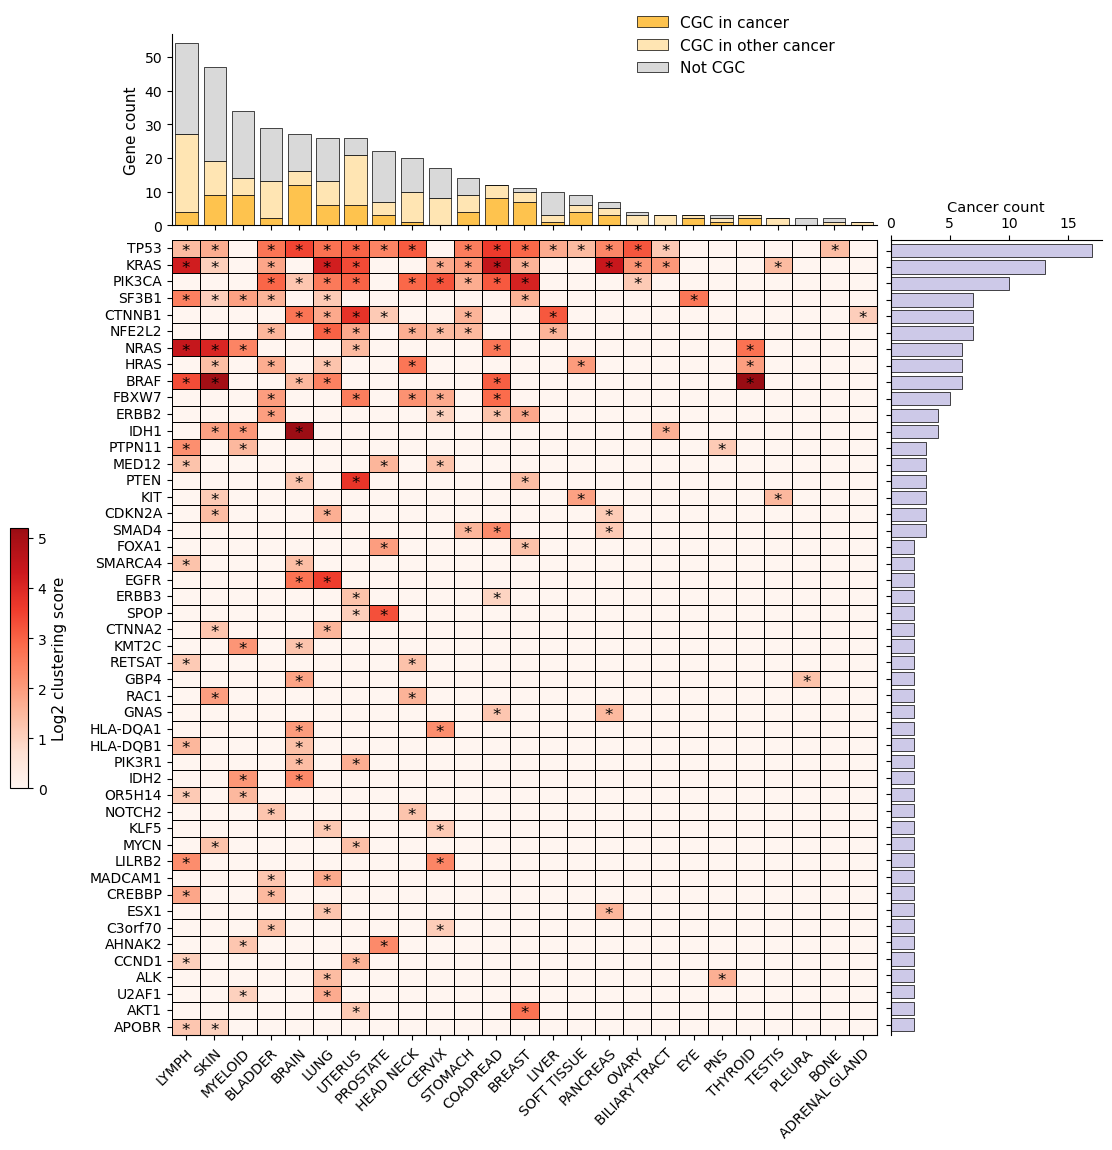

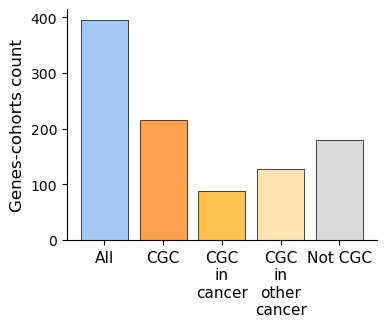

In [40]:
top_cohorts_n=None
top_genes_n=48 

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()

anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["GENERAL_CANCER_TYPE"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                  cohort_df, 
                                                                                  top_cohorts_n=top_cohorts_n, 
                                                                                  top_genes_n=top_genes_n, 
                                                                                  anomaly_dict=anomaly_dict,
                                                                                  cgc_specific=True,
                                                                                  cgc_df=cgc_df, 
                                                                                  cohorts_parent_dict=cohorts_tissue_parent_dict,
                                                                                  grouped_by_cancer=True)

df_anomaly.columns = [cancer.replace("_", " ") for cancer in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               df_anomaly=df_anomaly,
               figsize=(12,13),
               width_ratios=[1, 0.3],
               height_ratios=[0.24, 1],
               legend_box=(-0.2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.03, 
               hspace=0.03,
               plot_cgc_specific=True,
               right_ax_ylabel="Cancer count")
    

# Get summary CGC hits across genetable
plot_o3d_cgc_hits(hits_df)

### Clean up the following (AFTER RESTARTING THE KERNEL AND RE-RUNNING DOWN HERE)

In [1990]:
hits_df = get_hits(genetable)
hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)
hits_df

Gene  Uniprot_ID       Cancer                 Cohort  CGC  Fish  \
0    PIK3CA      P42336         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
1      RXRA      F1D8Q5         BLCA  HARTWIG_WGS_BLCA_2023    0     0   
2     FGFR3      P22607         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
3     FBXW7      Q969H0         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
4      TP53      K7PPA8         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
..      ...         ...          ...                    ...  ...   ...   
614   MED12      Q93074         PRAD          TCGA_WXS_PRAD    1     0   
615  CTNNB1  A0A024R2Q3         PRAD          TCGA_WXS_PRAD    1     0   
616    TP53      K7PPA8  SOFT_TISSUE          TCGA_WXS_SARC    1     0   
617    HRAS      P01112         PGNG          TCGA_WXS_PGNG    1     0   
618   EPAS1      Q99814         PGNG          TCGA_WXS_PGNG    1     0   

     Oncodrive3D General_cancer  CGC_specific  Not_CGC  CGC_not_specific  
0              1        BLADDER             0        0                 1  
1              1        BLADDER             0        1                 0  
2              1        BLADDER             1        0                 0  
3              1        BLADDER             0        0                 1  
4              1        BLADDER             0        0                 1  
..           ...            ...           ...      ...               ...  
614            1       PROSTATE             0        0                 1  
615            1       PROSTATE             0        0                 1  
616            1    SOFT_TISSUE             0        0                 1  
617            1    SOFT_TISSUE             0        0                 1  
618            1    SOFT_TISSUE             1        0                 0  

[619 rows x 11 columns]

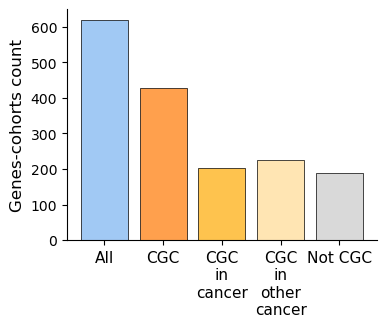

In [1991]:
## Get summary CGC hits across genetable
s = hits_df[["Oncodrive3D", "CGC", "CGC_specific", "CGC_not_specific", "Not_CGC"]].sum()
s.index = "All", "CGC", "CGC\nin\ncancer", "CGC\nin\nother\ncancer", "Not CGC"

plt.figure(figsize=(4, 3))
plt.bar(s.index, s.values, color=["#A1C9F4", "#ffa04d", "#fec34e", "#ffe5b3", "#d9d9d9"], edgecolor='black', lw=0.5)

plt.xlabel(None)
plt.ylabel('Genes-cohorts count', fontsize=12)
plt.xticks(fontsize=11)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [1992]:
# Get number of cohorts of a given general cancer type where each gene has been detected 
lung_df = hits_df[hits_df["General_cancer"] == "LUNG"]

lung_gene_hits_count = lung_df.groupby("Gene").sum()["Oncodrive3D"].reset_index()
lung_gene_hits_count = lung_gene_hits_count.sort_values("Oncodrive3D", ascending=False).reset_index(drop=True)
lung_gene_hits_count

Gene  Oncodrive3D
0      TP53           10
1      KRAS            8
2      EGFR            5
3    PIK3CA            4
4    NFE2L2            2
5      BRAF            2
6    CTNNB1            2
7     U2AF1            2
8    ZNF395            1
9   UGT2B17            1
10     TRIO            1
11  TMEM14B            1
12    TCAF1            1
13    SF3B1            1
14   PPP3CA            1
15      ALK            1
16     PER3            1
17    ATG2A            1
18  MADCAM1            1
19     KLF5            1
20     HRAS            1
21     ESX1            1
22    EPPK1            1
23   CTNNA2            1
24   CDKN2A            1
25   ZNF880            1

In [2111]:
def get_cgc_specific_count_for_ttype(hits_df_ttype):

    hits_df_ttype = hits_df_ttype[["Gene", "CGC_specific", "Not_CGC", "CGC_not_specific"]].drop_duplicates().reset_index(drop=True)
    hits_df_ttype = hits_df_ttype.drop(columns=["Gene", "Uniprot_ID"]).sum()

    return hits_df_ttype

# For a general cancer type get the number of unique CGC genes in that cancer, other cancer, not CGC
hits_df_ttype = hits_df.groupby("General_cancer").apply(lambda x: get_cgc_specific_count_for_ttype(x)).sort_values("Oncodrive3D", ascending=False).reset_index()
hits_df_ttype

In [2063]:
top_cohorts_n=40
top_genes_n=40 

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["Cohort"].values, 
                                                                          o3d_output["Clustering_score"].values)}

# df_anomaly, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
#                                                                                   cohort_df, 
#                                                                                   top_cohorts_n=top_cohorts_n, 
#                                                                                   top_genes_n=top_genes_n, 
#                                                                                   anomaly_dict=anomaly_dict)

# df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
#                                                                                   cohort_df, 
#                                                                                   top_cohorts_n=top_cohorts_n, 
#                                                                                   top_genes_n=top_genes_n, 
#                                                                                   anomaly_dict=False)

In [2045]:
cohort_df

COHORT CANCER_TYPE PLATFORM  MUTATIONS  SAMPLES  \
0         HARTWIG_WGS_BLCA_2023        BLCA      WGS    5017561      144   
1          HARTWIG_WGS_EGC_2023         EGC      WGS     573540       21   
2          HARTWIG_WGS_LMS_2023         LMS      WGS     339549       43   
3    CBIOP_WGS_STAD_ONCOSG_2018        STAD      WGS     861309      147   
4      CBIOP_WXS_CM_VALLEN_2018         MEL      WXS     132960      151   
..                          ...         ...      ...        ...      ...   
266               TCGA_WXS_PRCC        PRCC      WXS      34566      276   
267               TCGA_WXS_PRAD        PRAD      WXS      34239      494   
268             TCGA_WXS_PLMESO      PLMESO      WXS       3980       82   
269               TCGA_WXS_SARC        SARC      WXS      31484      234   
270               TCGA_WXS_PGNG        PGNG      WXS       2666      178   

    GENERAL_CANCER_TYPE  
0               BLADDER  
1               STOMACH  
2           SOFT_TISSUE  
3               STOMACH  
4                  SKIN  
..                  ...  
266              KIDNEY  
267            PROSTATE  
268              PLEURA  
269         SOFT_TISSUE  
270         SOFT_TISSUE  

[271 rows x 6 columns]

### Good one

In [2080]:
top_cohorts_n=40
top_genes_n=40 

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output = o3d_output.merge(cohort_df.rename(columns={"COHORT" : "Cohort"})[["Cohort", "GENERAL_CANCER_TYPE"]], on="Cohort")
o3d_output = o3d_output[["GENERAL_CANCER_TYPE", 'Gene', "Clustering_score"]].groupby(["GENERAL_CANCER_TYPE", 'Gene']).max().reset_index()

anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["GENERAL_CANCER_TYPE"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, hits_df, gene_hits_count, cohort_hits_count = get_gene_cancers_binary(genetable_subset, 
                                                                                  cohort_df, 
                                                                                  top_cohorts_n=top_cohorts_n, 
                                                                                  top_genes_n=top_genes_n, 
                                                                                  anomaly_dict=anomaly_dict,
                                                                                  cgc_specific=True,
                                                                                  cgc_df=cgc_df, 
                                                                                  cohorts_parent_dict=cohorts_tissue_parent_dict)

df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cancers_binary(genetable_subset, 
                                                                                  cohort_df, 
                                                                                  top_cohorts_n=top_cohorts_n, 
                                                                                  top_genes_n=top_genes_n, 
                                                                                  anomaly_dict=False,
                                                                                  cgc_specific=True,
                                                                                  cgc_df=cgc_df, 
                                                                                  cohorts_parent_dict=cohorts_tissue_parent_dict)

gene_colors, lut = get_gene_annotation(df_binary, genetable)

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               df_anomaly=df_anomaly,
               figsize=(11,10),
               width_ratios=[1, 0.2],
               height_ratios=[0.3, 1],
               legend_box=(-0.2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.03, 
               hspace=0.03,
               plot_cgc_specific=True)

GENERAL_CANCER_TYPE     Gene  Clustering_score
0           ADRENAL_GLAND   ADAM33          1.653467
1           ADRENAL_GLAND   ADGRL4          1.604568
2           ADRENAL_GLAND    BACH2          1.891935
3           ADRENAL_GLAND     CLTB          1.239211
4           ADRENAL_GLAND    CRYAB          1.467292
...                   ...      ...               ...
48227               VULVA   ZNF142          1.942959
48228               VULVA   ZNF285          1.809062
48229               VULVA  ZNF385B          1.458845
48230               VULVA   ZNF418          1.746603
48231               VULVA  ZNF518B          1.942406

[48232 rows x 3 columns]

In [2081]:
anomaly_dict = {f"{gene}-{cancer}" : score for gene, cancer, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["GENERAL_CANCER_TYPE"].values, 
                                                                          o3d_output["Clustering_score"].values)}
anomaly_dict

{'ADAM33-ADRENAL_GLAND': 1.653467166256414,
 'ADGRL4-ADRENAL_GLAND': 1.60456808287175,
 'BACH2-ADRENAL_GLAND': 1.8919352214734664,
 'CLTB-ADRENAL_GLAND': 1.2392110279502682,
 'CRYAB-ADRENAL_GLAND': 1.4672919514145064,
 'CTNNB1-ADRENAL_GLAND': 2.9687460714975957,
 'DLGAP3-ADRENAL_GLAND': 1.9291096350326784,
 'GLB1L2-ADRENAL_GLAND': 1.476214830039982,
 'MAP3K14-ADRENAL_GLAND': 1.846207608842762,
 'MICALL1-ADRENAL_GLAND': 1.810169022125833,
 'MTRFR-ADRENAL_GLAND': 0.9198072046128696,
 'OR4N2-ADRENAL_GLAND': 0.8705226732081196,
 'PLAGL1-ADRENAL_GLAND': 1.7100883404789358,
 'PLEKHG6-ADRENAL_GLAND': 1.2467086576029298,
 'POLE-ADRENAL_GLAND': 1.8797973489226292,
 'SDS-ADRENAL_GLAND': 1.2192647862500958,
 'SKIC2-ADRENAL_GLAND': 1.5051460461348627,
 'SLC10A2-ADRENAL_GLAND': 1.4032719984803392,
 'SLC25A37-ADRENAL_GLAND': 1.4732521149912188,
 'SLIT2-ADRENAL_GLAND': 1.5291625658616377,
 'SMC3-ADRENAL_GLAND': 1.2827438232386354,
 'TP53-ADRENAL_GLAND': 1.4984790586354684,
 'ZNF804B-ADRENAL_GLAND': 2

In [2170]:
df_anomaly, hits_df, gene_hits_count, cohort_hits_count = get_gene_cancers_binary(genetable_subset, 
                                                                                  cohort_df, 
                                                                                  top_cohorts_n=top_cohorts_n, 
                                                                                  top_genes_n=top_genes_n, 
                                                                                  anomaly_dict=anomaly_dict,
                                                                                  cgc_specific=True,
                                                                                  cgc_df=cgc_df, 
                                                                                  cohorts_parent_dict=cohorts_tissue_parent_dict)

df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cancers_binary(genetable_subset, 
                                                                                  cohort_df, 
                                                                                  top_cohorts_n=top_cohorts_n, 
                                                                                  top_genes_n=top_genes_n, 
                                                                                  anomaly_dict=False,
                                                                                  cgc_specific=True,
                                                                                  cgc_df=cgc_df, 
                                                                                  cohorts_parent_dict=cohorts_tissue_parent_dict)


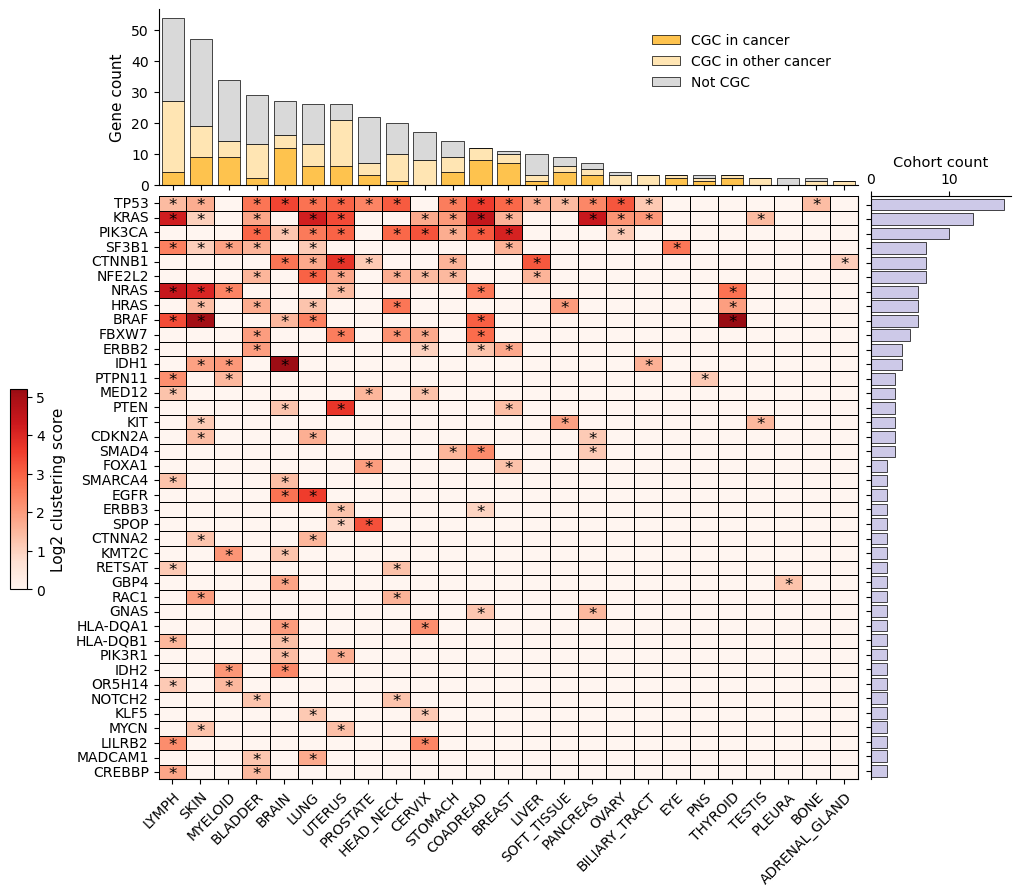

In [2171]:
gene_colors, lut = get_gene_annotation(df_binary, genetable)

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               df_anomaly=df_anomaly,
               figsize=(11,10),
               width_ratios=[1, 0.2],
               height_ratios=[0.3, 1],
               legend_box=(-0.2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.03, 
               hspace=0.03,
               plot_cgc_specific=True)

In [2114]:
# Get count of cancer a gene has been detected as significant across all cohorts

hits_df = get_hits(genetable)
hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)
hits_df = hits_df.drop(columns=["Uniprot_ID", "Cancer", "Cohort", "Fish"]).drop_duplicates().reset_index(drop=True)
gene_hits_count = hits_df.groupby("Gene").apply(lambda x: sum(x["Oncodrive3D"])).reset_index(name="Cancer_count").sort_values("Cancer_count", ascending=False)
gene_hits_count

Gene  Cancer_count
240    TP53            17
139    KRAS            13
180  PIK3CA            10
210   SF3B1             7
55   CTNNB1             7
..      ...           ...
104   H3-3A             1
105    H3C2             1
106   HCAR3             1
107   HLA-A             1
272   ZNF93             1

[273 rows x 2 columns]

In [2115]:
# lung_gene_hits_count = lung_df.groupby("Gene").sum()["Oncodrive3D"].reset_index()
# lung_gene_hits_count = lung_gene_hits_count.sort_values("Oncodrive3D", ascending=False).reset_index(drop=True)
# lung_gene_hits_count

In [ ]:
df_anomaly, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                  cohort_df, 
                                                                                  top_cohorts_n=top_cohorts_n, 
                                                                                  top_genes_n=top_genes_n, 
                                                                                  anomaly_dict=anomaly_dict,
                                                                                  cgc_specific=True,
                                                                                  cgc_df=cgc_df, 
                                                                                  cohorts_parent_dict=cohorts_tissue_parent_dict)

In [2122]:
def get_cgc_specific_count_for_ttype(hits_df_ttype):

    hits_df_ttype = hits_df_ttype[["Gene", "Oncodrive3D", "CGC_specific", "Not_CGC", "CGC_not_specific"]].drop_duplicates().reset_index(drop=True)
    hits_df_ttype = hits_df_ttype.drop(columns=["Gene"]).sum()

    return hits_df_ttype


# For a general cancer type get the number of unique CGC genes in that cancer, other cancer, not CGC
hits_df_ttype = hits_df.groupby("General_cancer").apply(lambda x: get_cgc_specific_count_for_ttype(x)).sort_values("Oncodrive3D", ascending=False).reset_index()
hits_df_ttype

General_cancer  Oncodrive3D  CGC_specific  Not_CGC  CGC_not_specific
0           LYMPH           54             4       27                23
1            SKIN           47             9       28                10
2         MYELOID           34             9       20                 5
3         BLADDER           29             2       16                11
4           BRAIN           27            12       11                 4
5            LUNG           26             6       13                 7
6          UTERUS           26             6        5                15
7        PROSTATE           22             3       15                 4
8       HEAD_NECK           20             1       10                 9
9          CERVIX           17             0        9                 8
10        STOMACH           14             4        5                 5
11       COADREAD           12             8        0                 4
12         BREAST           11             7        1                 3
13          LIVER           10             1        7                 2
14    SOFT_TISSUE            9             4        3                 2
15       PANCREAS            7             3        2                 2
16         KIDNEY            6             4        1                 1
17          OVARY            4             0        1                 3
18  BILIARY_TRACT            3             0        0                 3
19            EYE            3             2        0                 1
20            PNS            3             1        1                 1
21        THYROID            3             2        0                 1
22         TESTIS            2             0        0                 2
23         PLEURA            2             0        2                 0
24           BONE            2             0        1                 1
25         THYMUS            1             0        1                 0
26  ADRENAL_GLAND            1             0        0                 1

In [2119]:
hits_df

Gene  CGC  Oncodrive3D General_cancer  CGC_specific  Not_CGC  \
0     PIK3CA    1            1        BLADDER             0        0   
1       RXRA    0            1        BLADDER             0        1   
2      FGFR3    1            1        BLADDER             1        0   
3      FBXW7    1            1        BLADDER             0        0   
4       TP53    1            1        BLADDER             0        0   
..       ...  ...          ...            ...           ...      ...   
390  TRIM49C    0            1        STOMACH             0        1   
391    SPTA1    0            1        STOMACH             0        1   
392     TP53    1            1    SOFT_TISSUE             0        0   
393     HRAS    1            1    SOFT_TISSUE             0        0   
394    EPAS1    1            1    SOFT_TISSUE             1        0   

     CGC_not_specific  
0                   1  
1                   0  
2                   0  
3                   1  
4                   1  
..                ...  
390                 0  
391                 0  
392                 1  
393                 1  
394                 0  

[395 rows x 7 columns]

In [2118]:
hits_df.groupby("General_cancer").apply(lambda x: get_cgc_specific_count_for_ttype(x))

CGC_specific  Not_CGC  CGC_not_specific
General_cancer                                         
ADRENAL_GLAND              0        0                 1
BILIARY_TRACT              0        0                 3
BLADDER                    2       16                11
BONE                       0        1                 1
BRAIN                     12       11                 4
BREAST                     7        1                 3
CERVIX                     0        9                 8
COADREAD                   8        0                 4
EYE                        2        0                 1
HEAD_NECK                  1       10                 9
KIDNEY                     4        1                 1
LIVER                      1        7                 2
LUNG                       6       13                 7
LYMPH                      4       27                23
MYELOID                    9       20                 5
OVARY                      0        1                 3
PANCREAS                   3        2                 2
PLEURA                     0        2                 0
PNS                        1        1                 1
PROSTATE                   3       15                 4
SKIN                       9       28                10
SOFT_TISSUE                4        3                 2
STOMACH                    4        5                 5
TESTIS                     0        0                 2
THYMUS                     0        1                 0
THYROID                    2        0                 1
UTERUS                     6        5                15

In [2168]:
def get_gene_cancers_binary(genetable_df, 
                            cohort_df, 
                            top_cohorts_n=None, 
                            top_genes_n=None, 
                            anomaly_dict=None,
                            rm_empty_cols=True,
                            log_score=True,
                            cgc_specific=False,
                            cgc_df=None, 
                            cohorts_parent_dict=None):

    # Get hits with CGC specific info
    hits_df = get_hits(genetable)
    hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)
    hits_df = hits_df.drop(columns=["Uniprot_ID", "Cancer", "Cohort", "Fish"]).drop_duplicates().reset_index(drop=True)
    
    # Get count of cancer a gene has been detected as significant across all cohorts
    gene_hits_count = hits_df.groupby("Gene").apply(lambda x: len(x)).reset_index(name="Oncodrive3D").sort_values("Oncodrive3D", ascending=False).set_index("Gene")
    
    # For a general cancer type get the number of unique CGC genes in that cancer, other cancer, not CGC
    cancer_hits_count = hits_df.groupby("General_cancer").apply(lambda x: get_cgc_specific_count_for_ttype(x)).sort_values("Oncodrive3D", ascending=False)

    if top_genes_n is None:
        top_genes_n = len(gene_hits_count)
    if top_cohorts_n is None:
        top_cohorts_n = len(cancer_hits_count)
    
    top_genes = gene_hits_count[:top_genes_n].index
    top_cohorts = cancer_hits_count[:top_cohorts_n].index

    
    df = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
    for cohort in top_cohorts:
        genes = hits_df[hits_df["General_cancer"] == cohort].Gene.values
        genes = [gene for gene in genes if gene in df.columns]
        if anomaly_dict:
            scores = [np.log(anomaly_dict[f"{gene}-{cohort}"]) if log_score else anomaly_dict[f"{gene}-{cohort}"] for gene in genes]    
            df.loc[cohort, genes] = scores
        else:
            df.loc[cohort, genes] = 1
    
    df = df.T 
    if len(cohort_df) == 1:
        df = df.loc[hits_df.Gene]
        
    if rm_empty_cols:
        if anomaly_dict:
            df = df.loc[:, ~(df == 0).all()]
        else:
            df = df.loc[:, ~(df == False).all()]


    gene_hits_count = gene_hits_count.loc[df.index]
    cancer_hits_count = cancer_hits_count.loc[[cohort for cohort in cancer_hits_count.index if cohort in df.columns]]

    return df, hits_df, gene_hits_count, cancer_hits_count

In [2133]:
# Get hits with CGC specific info
hits_df = get_hits(genetable)
hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)
hits_df = hits_df.drop(columns=["Uniprot_ID", "Cancer", "Cohort", "Fish"]).drop_duplicates().reset_index(drop=True)

# Get count of cancer a gene has been detected as significant across all cohorts
gene_hits_count = hits_df.groupby("Gene").apply(lambda x: len(x)).reset_index(name="Cancer_count").sort_values("Cancer_count", ascending=False).set_index("Gene")

# For a general cancer type get the number of unique CGC genes in that cancer, other cancer, not CGC
cohort_hits_count = hits_df.groupby("General_cancer").apply(lambda x: get_cgc_specific_count_for_ttype(x)).sort_values("Oncodrive3D", ascending=False)

In [2136]:
if top_genes_n is None:
    top_genes_n = len(gene_hits_count)
if top_cohorts_n is None:
    top_cohorts_n = len(cohort_hits_count)

top_genes = gene_hits_count[:top_genes_n].index
top_cohorts = cohort_hits_count[:top_cohorts_n].index

In [2139]:
hits_df

Gene  CGC  Oncodrive3D General_cancer  CGC_specific  Not_CGC  \
0     PIK3CA    1            1        BLADDER             0        0   
1       RXRA    0            1        BLADDER             0        1   
2      FGFR3    1            1        BLADDER             1        0   
3      FBXW7    1            1        BLADDER             0        0   
4       TP53    1            1        BLADDER             0        0   
..       ...  ...          ...            ...           ...      ...   
390  TRIM49C    0            1        STOMACH             0        1   
391    SPTA1    0            1        STOMACH             0        1   
392     TP53    1            1    SOFT_TISSUE             0        0   
393     HRAS    1            1    SOFT_TISSUE             0        0   
394    EPAS1    1            1    SOFT_TISSUE             1        0   

     CGC_not_specific  
0                   1  
1                   0  
2                   0  
3                   1  
4                   1  
..                ...  
390                 0  
391                 0  
392                 1  
393                 1  
394                 0  

[395 rows x 7 columns]

In [2148]:
# log_score = True
rm_empty_cols=True


df = pd.DataFrame(0, index=top_cohorts, columns=top_genes)
for cohort in top_cohorts:
    genes = hits_df[hits_df["General_cancer"] == cohort].Gene.values
    genes = [gene for gene in genes if gene in df.columns]
    if anomaly_dict:
        scores = [np.log(anomaly_dict[f"{gene}-{cohort}"]) if log_score else anomaly_dict[f"{gene}-{cohort}"] for gene in genes]    
        df.loc[cohort, genes] = scores
    else:
        df.loc[cohort, genes] = 1

df = df.T 
if len(cohort_df) == 1:
    df = df.loc[hits_df.Gene]
    
if rm_empty_cols:
    if anomaly_dict:
        df = df.loc[:, ~(df == 0).all()]
    else:
        df = df.loc[:, ~(df == False).all()]

In [2151]:
gene_hits_count = gene_hits_count.loc[df.index]
cohort_hits_count = cohort_hits_count.loc[[cohort for cohort in cohort_hits_count.index if cohort in df.columns]]

### End

In [2026]:
def get_anomaly_df(genetable_df, o3d_output_dir):
    
    lst_cohort = []
    for cohort in genetable_df.Cohort.unique():
        cohort = "TCGA_WXS_SOFT_TISSUE" if cohort == "TCGA_WXS_SARC" else cohort
        df_cohort = pd.read_csv(f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_genes.csv")
        df_cohort = df_cohort[["Cohort", "Gene", "Uniprot_ID", "qval", "C_gene", "C_pos", "Score_obs_sim_top_vol"]]
        df_cohort = df_cohort.dropna(subset="qval").rename(columns={"Score_obs_sim_top_vol" : "Clustering_score"})
        lst_cohort.append(df_cohort)

    anomaly_df = pd.concat(lst_cohort).reset_index(drop=True)
    anomaly_df = anomaly_df.merge(genetable_df[["Cohort", "Gene", "CGC", "Fish"]].drop_duplicates(), on=["Cohort", "Gene"], how="left")
    anomaly_df.Cohort = anomaly_df.Cohort.replace("TCGA_WXS_SOFT_TISSUE", "TCGA_WXS_SARC")
    
    return anomaly_df

In [2027]:
o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output

Cohort    Gene  Uniprot_ID  qval  C_gene  \
0      HARTWIG_WGS_BLCA_2023  PIK3CA      P42336   0.0     1.0   
1      HARTWIG_WGS_BLCA_2023    RXRA      F1D8Q5   0.0     1.0   
2      HARTWIG_WGS_BLCA_2023   FGFR3      P22607   0.0     1.0   
3      HARTWIG_WGS_BLCA_2023   FBXW7      Q969H0   0.0     1.0   
4      HARTWIG_WGS_BLCA_2023    TP53      K7PPA8   0.0     1.0   
...                      ...     ...         ...   ...     ...   
71189          TCGA_WXS_PGNG   SUSD4      Q5VX71   1.0     0.0   
71190          TCGA_WXS_PGNG    PMM1  A0A024R1U5   1.0     0.0   
71191          TCGA_WXS_PGNG    NAGK  A0A384N6G7   1.0     0.0   
71192          TCGA_WXS_PGNG    ADH6      P28332   1.0     0.0   
71193          TCGA_WXS_PGNG     MAL  A0A024RE19   1.0     0.0   

                                                   C_pos  Clustering_score  \
0                                          [542 545 539]          6.608875   
1                                              [427 429]          5.260005   
2                                          [248 249 373]          5.135854   
3                                              [505 465]          3.409612   
4      [249 273 241 173 248 132 195 280 157 258 194 2...          3.377812   
...                                                  ...               ...   
71189                                                NaN          1.668006   
71190                                                NaN          1.332350   
71191                                                NaN          1.287737   
71192                                                NaN          1.279473   
71193                                                NaN          1.193756   

       CGC  Fish  
0      1.0   0.0  
1      0.0   0.0  
2      1.0   0.0  
3      1.0   0.0  
4      1.0   0.0  
...    ...   ...  
71189  0.0   0.0  
71190  0.0   0.0  
71191  0.0   0.0  
71192  0.0   1.0  
71193  1.0   0.0  

[71194 rows x 9 columns]

In [2031]:
anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["Cohort"].values, 
                                                                          o3d_output["Clustering_score"].values)}
hits_df = get_hits(genetable)
hits_df

Gene  Uniprot_ID       Cancer                 Cohort  CGC  Fish  \
0    PIK3CA      P42336         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
1      RXRA      F1D8Q5         BLCA  HARTWIG_WGS_BLCA_2023    0     0   
2     FGFR3      P22607         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
3     FBXW7      Q969H0         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
4      TP53      K7PPA8         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
..      ...         ...          ...                    ...  ...   ...   
614   MED12      Q93074         PRAD          TCGA_WXS_PRAD    1     0   
615  CTNNB1  A0A024R2Q3         PRAD          TCGA_WXS_PRAD    1     0   
616    TP53      K7PPA8  SOFT_TISSUE          TCGA_WXS_SARC    1     0   
617    HRAS      P01112         PGNG          TCGA_WXS_PGNG    1     0   
618   EPAS1      Q99814         PGNG          TCGA_WXS_PGNG    1     0   

     Oncodrive3D  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
614            1  
615            1  
616            1  
617            1  
618            1  

[619 rows x 7 columns]

In [2033]:
hits_df["Clustering_score"] = hits_df.apply(lambda x: anomaly_dict[f"{x.Gene}-{x.Cohort}"], axis=1)
hits_df

Gene  Uniprot_ID       Cancer                 Cohort  CGC  Fish  \
0    PIK3CA      P42336         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
1      RXRA      F1D8Q5         BLCA  HARTWIG_WGS_BLCA_2023    0     0   
2     FGFR3      P22607         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
3     FBXW7      Q969H0         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
4      TP53      K7PPA8         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
..      ...         ...          ...                    ...  ...   ...   
614   MED12      Q93074         PRAD          TCGA_WXS_PRAD    1     0   
615  CTNNB1  A0A024R2Q3         PRAD          TCGA_WXS_PRAD    1     0   
616    TP53      K7PPA8  SOFT_TISSUE          TCGA_WXS_SARC    1     0   
617    HRAS      P01112         PGNG          TCGA_WXS_PGNG    1     0   
618   EPAS1      Q99814         PGNG          TCGA_WXS_PGNG    1     0   

     Oncodrive3D  Clustering_score  
0              1          6.608875  
1              1          5.260005  
2              1          5.135854  
3              1          3.409612  
4              1          3.377812  
..           ...               ...  
614            1          3.834154  
615            1          2.550003  
616            1          4.302525  
617            1          7.463746  
618            1          6.386988  

[619 rows x 8 columns]

In [2034]:
hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_tissue_parent_dict)
hits_df

Gene  Uniprot_ID       Cancer                 Cohort  CGC  Fish  \
0    PIK3CA      P42336         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
1      RXRA      F1D8Q5         BLCA  HARTWIG_WGS_BLCA_2023    0     0   
2     FGFR3      P22607         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
3     FBXW7      Q969H0         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
4      TP53      K7PPA8         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
..      ...         ...          ...                    ...  ...   ...   
614   MED12      Q93074         PRAD          TCGA_WXS_PRAD    1     0   
615  CTNNB1  A0A024R2Q3         PRAD          TCGA_WXS_PRAD    1     0   
616    TP53      K7PPA8  SOFT_TISSUE          TCGA_WXS_SARC    1     0   
617    HRAS      P01112         PGNG          TCGA_WXS_PGNG    1     0   
618   EPAS1      Q99814         PGNG          TCGA_WXS_PGNG    1     0   

     Oncodrive3D  Clustering_score General_cancer  CGC_specific  Not_CGC  \
0              1          6.608875        BLADDER             0        0   
1              1          5.260005        BLADDER             0        1   
2              1          5.135854        BLADDER             1        0   
3              1          3.409612        BLADDER             0        0   
4              1          3.377812        BLADDER             0        0   
..           ...               ...            ...           ...      ...   
614            1          3.834154       PROSTATE             0        0   
615            1          2.550003       PROSTATE             0        0   
616            1          4.302525    SOFT_TISSUE             0        0   
617            1          7.463746    SOFT_TISSUE             0        0   
618            1          6.386988    SOFT_TISSUE             1        0   

     CGC_not_specific  
0                   1  
1                   0  
2                   0  
3                   1  
4                   1  
..                ...  
614                 1  
615                 1  
616                 1  
617                 1  
618                 0  

[619 rows x 12 columns]

In [2041]:
hits_df[hits_df["General_cancer"] == "LUNG"].groupby("Gene").max()

Uniprot_ID Cancer                      Cohort  CGC  Fish  \
Gene                                                                
ALK          Q9UM73  NSCLC      HARTWIG_WGS_NSCLC_2023    1     0   
ATG2A        Q2TAZ0   LUAD  CBIOP_WXS_LUAD_VALLEN_2018    0     0   
BRAF         P15056  NSCLC               TCGA_WXS_LUAD    1     0   
CDKN2A       K7PML8   LUSC               TCGA_WXS_LUSC    1     0   
CTNNA2       P26232   LUAD  CBIOP_WXS_LUAD_VALLEN_2018    1     0   
CTNNB1   A0A024R2Q3  NSCLC               TCGA_WXS_LUAD    1     0   
EGFR         P00533  NSCLC               TCGA_WXS_LUAD    1     0   
EPPK1        P58107   LUAD  CBIOP_WXS_LUAD_ONCOSG_2020    0     0   
ESX1         Q8N693   LUAD  CBIOP_WXS_LUAD_ONCOSG_2020    0     1   
HRAS         P01112   LUSC               TCGA_WXS_LUSC    1     0   
KLF5         Q13887   LUSC               TCGA_WXS_LUSC    0     0   
KRAS     A0A024RAV5  NSCLC               TCGA_WXS_LUAD    1     0   
MADCAM1      Q13477   LUAD  CBIOP_WXS_LUAD_ONCOSG_2020    0     0   
NFE2L2       Q16236   LUSC               TCGA_WXS_LUSC    1     0   
PER3         P56645   LUAD  CBIOP_WXS_LUAD_ONCOSG_2020    0     0   
PIK3CA       P42336  NSCLC               TCGA_WXS_LUSC    1     0   
PPP3CA   A0A0S2Z4C6   LUAD               TCGA_WXS_LUAD    0     0   
SF3B1        O75533   LUNG       HARTWIG_WGS_LUNG_2023    1     0   
TCAF1        Q9Y4C2   LUAD               TCGA_WXS_LUAD    0     0   
TMEM14B  A0A024QZV7   LUAD  CBIOP_WXS_LUAD_ONCOSG_2020    0     0   
TP53         K7PPA8   SCLC               TCGA_WXS_LUSC    1     0   
TRIO         O75962   LUSC         CPTAC_WXS_LUSC_2020    0     0   
U2AF1        Q01081  NSCLC               TCGA_WXS_LUAD    1     0   
UGT2B17      O75795  NSCLC      HARTWIG_WGS_NSCLC_2023    0     0   
ZNF395       Q9H8N7  NSCLC  CBIOP_WXS_NSCLC_MSKCC_2018    0     0   
ZNF880       Q6PDB4   LUAD  CBIOP_WXS_LUAD_ONCOSG_2020    0     0   

         Oncodrive3D  Clustering_score General_cancer  CGC_specific  Not_CGC  \
Gene                                                                           
ALK                1          4.137430           LUNG             1        0   
ATG2A              1          3.621890           LUNG             0        1   
BRAF               1         11.651959           LUNG             1        0   
CDKN2A             1          5.202005           LUNG             0        0   
CTNNA2             1          4.683756           LUNG             0        0   
CTNNB1             1          5.886094           LUNG             0        0   
EGFR               1         35.581750           LUNG             1        0   
EPPK1              1          5.047566           LUNG             0        1   
ESX1               1          3.558724           LUNG             0        1   
HRAS               1          3.588907           LUNG             0        0   
KLF5               1          3.298833           LUNG             0        1   
KRAS               1         65.933711           LUNG             1        0   
MADCAM1            1          5.788501           LUNG             0        1   
NFE2L2             1         20.512420           LUNG             1        0   
PER3               1          5.508618           LUNG             0        1   
PIK3CA             1         13.669229           LUNG             0        0   
PPP3CA             1          2.920869           LUNG             0        1   
SF3B1              1          3.168516           LUNG             0        0   
TCAF1              1          2.525149           LUNG             0        1   
TMEM14B            1          5.206546           LUNG             0        1   
TP53               1         15.691384           LUNG             1        0   
TRIO               1          2.530219           LUNG             0        1   
U2AF1              1          5.685302           LUNG             0        0   
UGT2B17            1          2.771478           LUNG             0        1

In [ ]:
def get_hits(genetable_df, alpha=0.01):
    
    genetable_df = genetable_df[genetable_df["o3d_qval"] < 0.01]
    genetable_df = genetable_df[["Gene", "Uniprot_ID", "Cancer", "Cohort", "CGC", "Fish", "o3d_qval"]].reset_index(drop=True)
    genetable_df = genetable_df.rename(columns={"o3d_qval" : "Oncodrive3D"})
    genetable_df["Oncodrive3D"] = 1
    
    return genetable_df


def get_cgc_specific(hits_df, cgc_df, cohorts_parent_dict):

    hits_df["General_cancer"] = hits_df.Cancer.apply(lambda x: cohorts_parent_dict[x])
    hits_df["CGC_specific"] = hits_df.apply(lambda x: 
                                        x["General_cancer"] in cgc_df[cgc_df["Gene Symbol"] == x["Gene"]].GENERAL_CANCER_TYPE.values[0] 
                                        if x["CGC"] == 1 else 0, axis=1).astype(int)

    return hits_df
    
hits_df = get_cgc_specific(hits_df, cgc_df, cohorts_parent_dict)

In [ ]:
    # hits_df["General_cancer"] = hits_df.Cancer.apply(lambda x: cohorts_parent_dict[x])
    # hits_df["CGC_specific"] = hits_df.apply(lambda x: 
    #                                     x["General_cancer"] in cgc_df[cgc_df["Gene Symbol"] == x["Gene"]].GENERAL_CANCER_TYPE.values[0] 
    #                                     if x["CGC"] == 1 else 0, axis=1).astype(int)

In [2023]:
hits_df

Gene  Uniprot_ID       Cancer                 Cohort  CGC  Fish  \
0    PIK3CA      P42336         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
1      RXRA      F1D8Q5         BLCA  HARTWIG_WGS_BLCA_2023    0     0   
2     FGFR3      P22607         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
3     FBXW7      Q969H0         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
4      TP53      K7PPA8         BLCA  HARTWIG_WGS_BLCA_2023    1     0   
..      ...         ...          ...                    ...  ...   ...   
614   MED12      Q93074         PRAD          TCGA_WXS_PRAD    1     0   
615  CTNNB1  A0A024R2Q3         PRAD          TCGA_WXS_PRAD    1     0   
616    TP53      K7PPA8  SOFT_TISSUE          TCGA_WXS_SARC    1     0   
617    HRAS      P01112         PGNG          TCGA_WXS_PGNG    1     0   
618   EPAS1      Q99814         PGNG          TCGA_WXS_PGNG    1     0   

     Oncodrive3D General_cancer  CGC_specific  Not_CGC  CGC_not_specific  
0              1        BLADDER             0        0                 1  
1              1        BLADDER             0        1                 0  
2              1        BLADDER             1        0                 0  
3              1        BLADDER             0        0                 1  
4              1        BLADDER             0        0                 1  
..           ...            ...           ...      ...               ...  
614            1       PROSTATE             0        0                 1  
615            1       PROSTATE             0        0                 1  
616            1    SOFT_TISSUE             0        0                 1  
617            1    SOFT_TISSUE             0        0                 1  
618            1    SOFT_TISSUE             1        0                 0  

[619 rows x 11 columns]

In [2018]:
anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["Cohort"].values, 
                                                                          o3d_output["Clustering_score"].values)}

In [1940]:
df_anomaly, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                  cohort_df, 
                                                                                  top_cohorts_n=top_cohorts_n, 
                                                                                  top_genes_n=top_genes_n, 
                                                                                  anomaly_dict=anomaly_dict,
                                                                                  cgc_specific=True,
                                                                                  cgc_df=cgc_df, 
                                                                                  cohorts_parent_dict=cohorts_tissue_parent_dict)

hits_df

KeyError: 'NRAS-OTHER_WXS_AML_PRY_BEAT_2018'

In [1729]:
cohort_hits_count

Cohort  Oncodrive3D  CGC_specific  CGC_not_specific  Not_CGC
0        TCGA_WXS_MEL           31             8                 6       17
1       TCGA_WXS_UCEC           26             6                15        5
2       TCGA_WXS_BLCA           18             1                10        7
3       TCGA_WXS_STAD           11             4                 4        3
4       TCGA_WXS_LUAD            9             4                 3        2
5       TCGA_WXS_BRCA            9             6                 2        1
6   TCGA_WXS_COADREAD            9             6                 3        0
7       TCGA_WXS_HNSC            9             1                 7        1
8       TCGA_WXS_CESC            8             0                 6        2
9        TCGA_WXS_GBM            8             7                 0        1
10      TCGA_WXS_LUSC            6             2                 3        1
11    TCGA_WXS_LGGNOS            6             6                 0        0
12       TCGA_WXS_HCC            5             1                 2        2
13      TCGA_WXS_PRAD            4             1                 3        0
14      TCGA_WXS_ESCA            4             1                 2        1
15      TCGA_WXS_PAAD            4             3                 1        0
16       TCGA_WXS_UCS            3             1                 2        0
17        TCGA_WXS_UM            3             2                 1        0
18      TCGA_WXS_WDTC            3             2                 1        0
19     TCGA_WXS_CCRCC            3             3                 0        0
20      TCGA_WXS_PGNG            2             1                 1        0
21       TCGA_WXS_OVT            2             0                 1        1
22      TCGA_WXS_MGCT            2             0                 2        0
23       TCGA_WXS_AML            2             0                 1        1
24      TCGA_WXS_SARC            1             0                 1        0
25       TCGA_WXS_ACC            1             0                 1        0

In [1676]:
cohort_hits_count

Cohort  Oncodrive3D  CGC  Not_CGC
0        TCGA_WXS_MEL           31   14       17
1       TCGA_WXS_UCEC           26   21        5
2       TCGA_WXS_BLCA           18   11        7
3       TCGA_WXS_STAD           11    8        3
4       TCGA_WXS_LUAD            9    7        2
5       TCGA_WXS_BRCA            9    8        1
6   TCGA_WXS_COADREAD            9    9        0
7       TCGA_WXS_HNSC            9    8        1
8       TCGA_WXS_CESC            8    6        2
9        TCGA_WXS_GBM            8    7        1
10      TCGA_WXS_LUSC            6    5        1
11    TCGA_WXS_LGGNOS            6    6        0
12       TCGA_WXS_HCC            5    3        2
13      TCGA_WXS_PRAD            4    4        0
14      TCGA_WXS_ESCA            4    3        1
15      TCGA_WXS_PAAD            4    4        0
16       TCGA_WXS_UCS            3    3        0
17        TCGA_WXS_UM            3    3        0
18      TCGA_WXS_WDTC            3    3        0
19     TCGA_WXS_CCRCC            3    3        0
20      TCGA_WXS_PGNG            2    2        0
21       TCGA_WXS_OVT            2    1        1
22      TCGA_WXS_MGCT            2    2        0
23       TCGA_WXS_AML            2    1        1
24      TCGA_WXS_SARC            1    1        0
25       TCGA_WXS_ACC            1    1        0

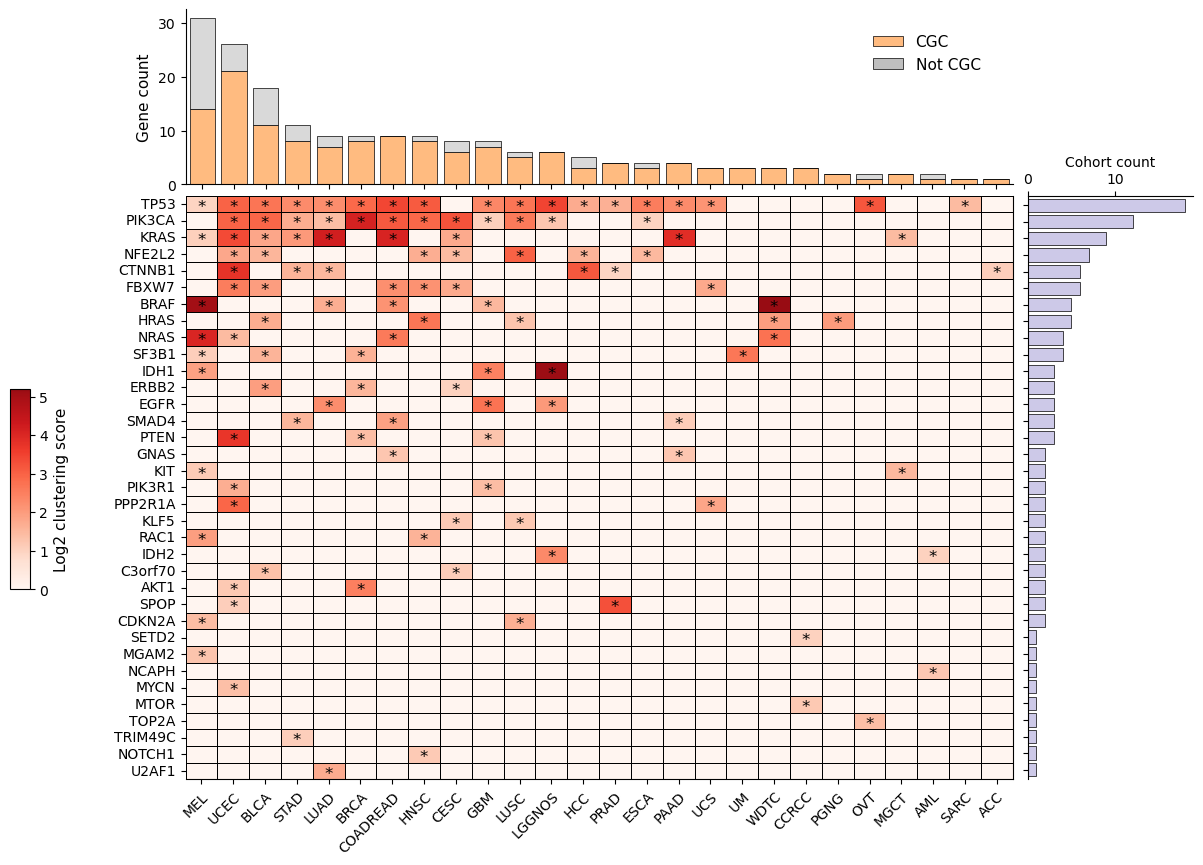

In [916]:
top_cohorts_n=None
top_genes_n=35

o3d_output = get_anomaly_df(genetable_subset, o3d_output_dir)
anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["Cohort"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                  cohort_df, 
                                                                                  top_cohorts_n=top_cohorts_n, 
                                                                                  top_genes_n=top_genes_n, 
                                                                                  anomaly_dict=anomaly_dict)

df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_subset, 
                                                                                 cohort_df, 
                                                                                 top_cohorts_n=top_cohorts_n, 
                                                                                 top_genes_n=top_genes_n, 
                                                                                 anomaly_dict=False)

df_anomaly.columns = [cohort.split("_")[2] for cohort in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, genetable)

plot_landscape(df=df_binary, 
               gene_colors=gene_colors, 
               gene_hits_count=gene_hits_count, 
               cohort_hits_count=cohort_hits_count,
               lut=lut, 
               df_anomaly=df_anomaly,
               figsize=(13,10),
               width_ratios=[1, 0.2],
               height_ratios=[0.3, 1],
               legend_box=(-0.2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.03, 
               hspace=0.03,
               filename="landscape_heatmap_tcga.png")

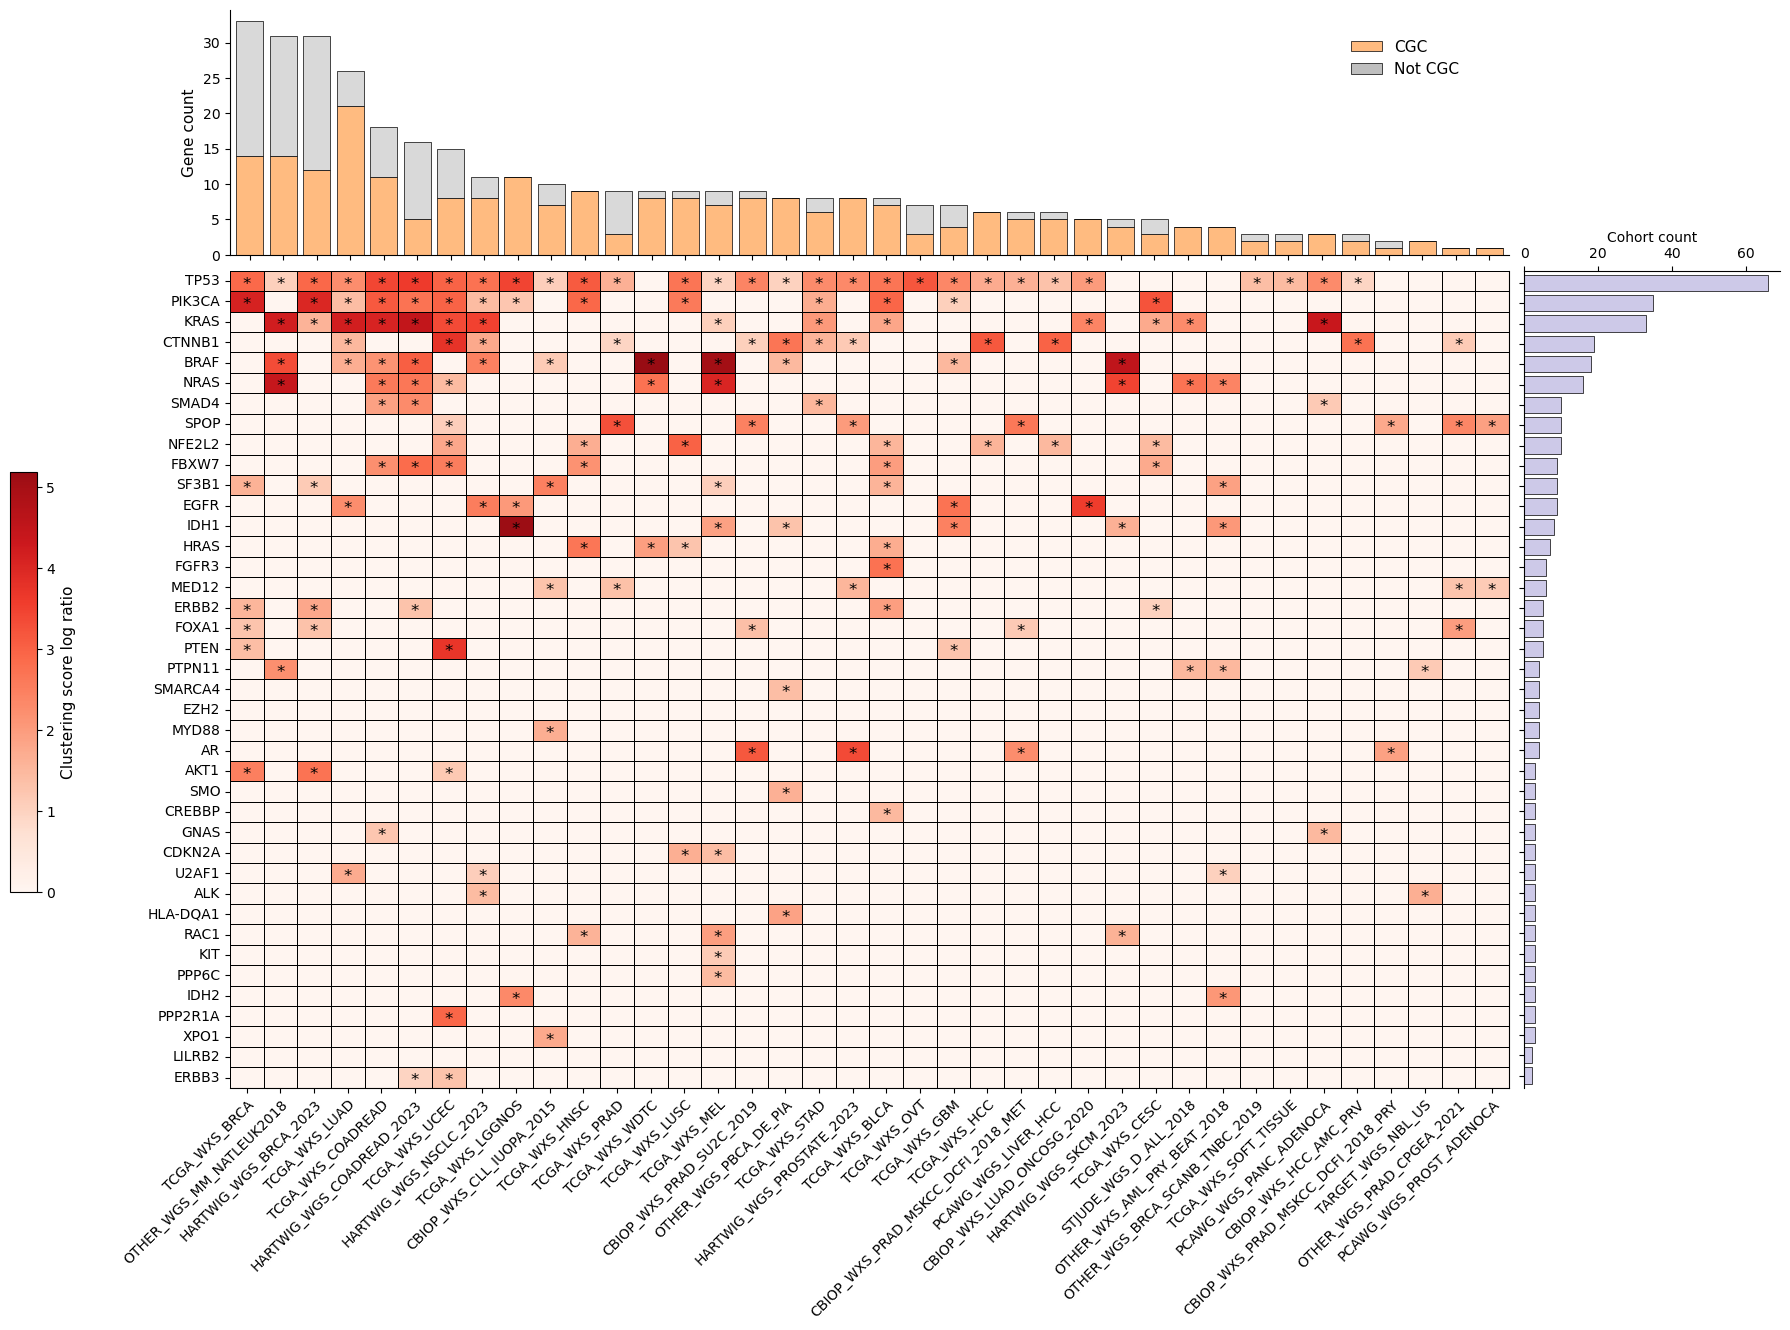

In [335]:
top_cohorts_n=40
top_genes_n=40 

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["Cohort"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                  cohort_df, 
                                                                                  top_cohorts_n=top_cohorts_n, 
                                                                                  top_genes_n=top_genes_n, 
                                                                                  anomaly_dict=anomaly_dict)

df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                  cohort_df, 
                                                                                  top_cohorts_n=top_cohorts_n, 
                                                                                  top_genes_n=top_genes_n, 
                                                                                  anomaly_dict=False)

gene_colors, lut = get_gene_annotation(df_binary, genetable)

plot_landscape(df=df_binary, gene_colors=gene_colors, lut=lut, df_anomaly=df_anomaly,
               gene_hits_count=gene_hits_count, cohort_hits_count=cohort_hits_count,
               figsize=(20,14),
               width_ratios=[1, 0.2],
               height_ratios=[0.3, 1],
               legend_box=(-0.2, 1.3),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.02, 
               hspace=0.03,
               cbar_loc=[0.015, 0.25, 0.0133, .3],
               filename="landscape_heatmap_all_cohorts.png")

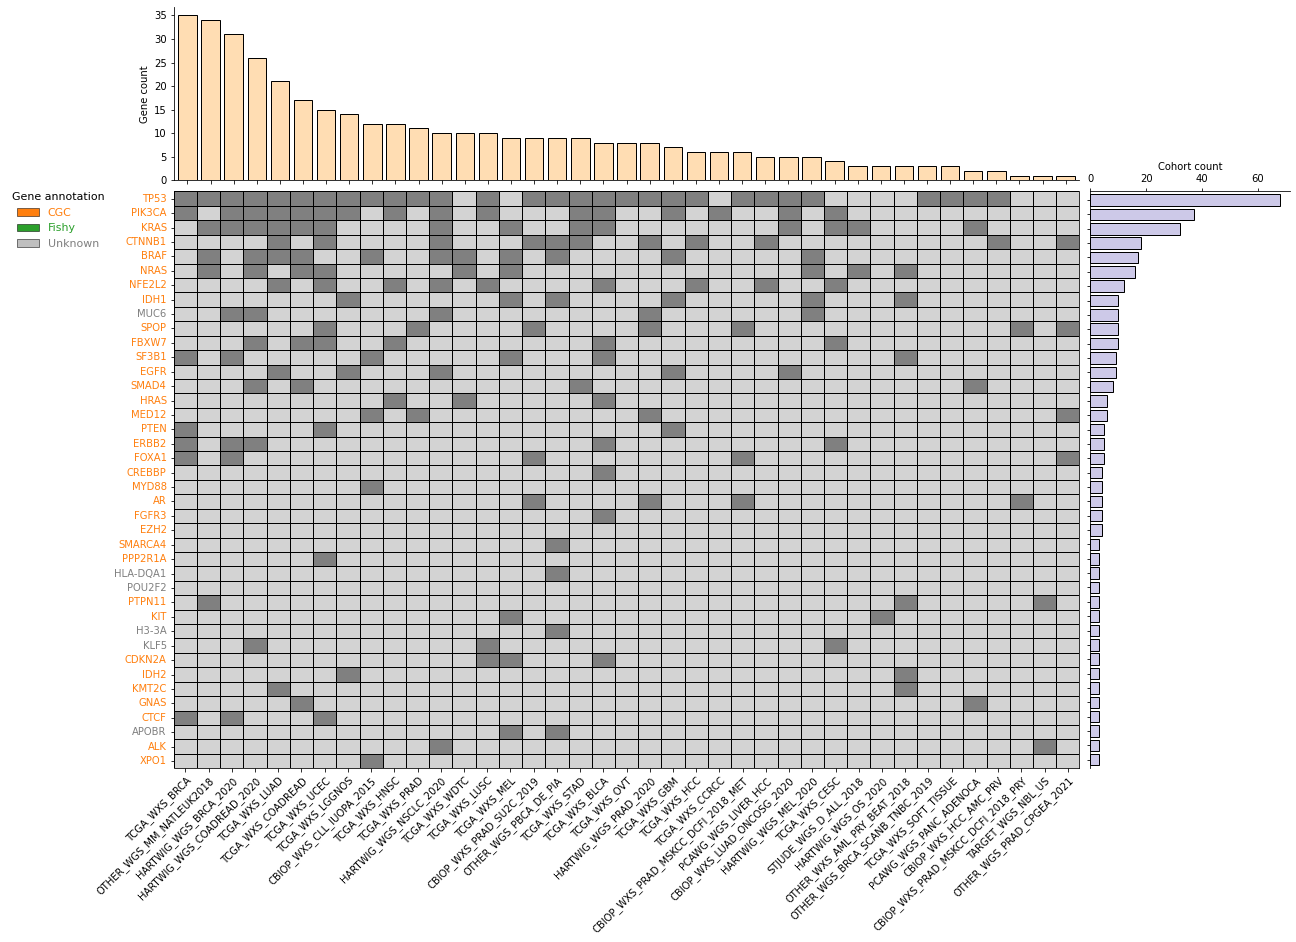

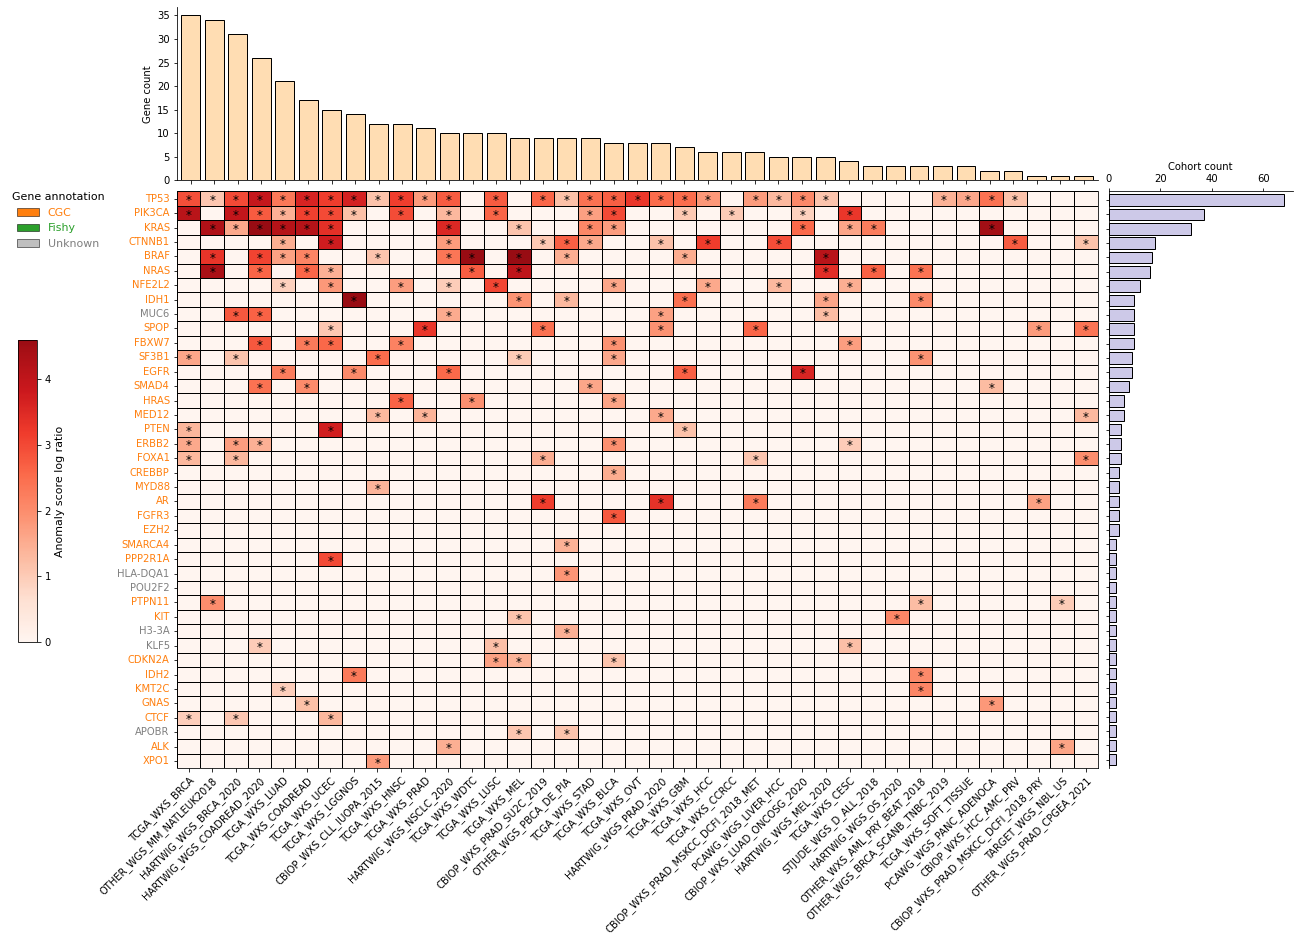

In [13]:
top_cohorts_n=40
top_genes_n=40

o3d_output = get_anomaly_df(genetable, o3d_output_dir)
anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["Cohort"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                  cohort_df, 
                                                                                  top_cohorts_n=top_cohorts_n, 
                                                                                  top_genes_n=top_genes_n, 
                                                                                  anomaly_dict=anomaly_dict)

df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable, 
                                                                                  cohort_df, 
                                                                                  top_cohorts_n=top_cohorts_n, 
                                                                                  top_genes_n=top_genes_n, 
                                                                                  anomaly_dict=False)

gene_colors, lut = get_gene_annotation(df_binary, genetable)

plot_landscape(df=df_binary, gene_colors=gene_colors, lut=lut, df_anomaly=None,
               gene_hits_count=gene_hits_count, cohort_hits_count=cohort_hits_count,
               figsize=(20,14),
               width_ratios=[1, 0.22],
               height_ratios=[0.3, 1],
               legend_box=(-4.9, 1.0156),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.02, 
               hspace=0.03)

plot_landscape(df=df_binary, gene_colors=gene_colors, lut=lut, df_anomaly=df_anomaly,
               gene_hits_count=gene_hits_count, cohort_hits_count=cohort_hits_count,
               figsize=(20,14),
               width_ratios=[1, 0.2],
               height_ratios=[0.3, 1],
               legend_box=(-5.4, 1.0156),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.02, 
               hspace=0.03,
               cbar_loc=[0.015, 0.25, 0.0133, .3],
               filename="landscape_heatmap_all_cohorts.png")

In [18]:
df_binary.loc[df_binary["OTHER_WGS_PBCA_DE_PIA"] == 1, "OTHER_WGS_PBCA_DE_PIA"]

Gene
TP53        1
CTNNB1      1
BRAF        1
IDH1        1
SMARCA4     1
HLA-DQA1    1
H3-3A       1
APOBR       1
Name: OTHER_WGS_PBCA_DE_PIA, dtype: int64

In [25]:
genetable[(genetable["Gene"] == "IGLL5") & (genetable["o3d_qval"] < 0.01)]

Gene Uniprot_ID o3d_status  CGC  Fish  o3d_rank  o3d_pval  o3d_qval  \
2428964  IGLL5     B9A064  Processed    0     0       2.0       0.0       0.0   
2642228  IGLL5     B9A064  Processed    0     0       4.0       0.0       0.0   

         cbase_rank  cbase_pval  ...  clustl_pval  clustl_qval  fml_rank  \
2428964     17734.0    1.000000  ...     0.077143     0.223067    7975.0   
2642228     11225.0    0.626789  ...     0.556394     0.592594   15605.0   

         fml_pval  fml_qval  smreg_rank  smreg_pval  smreg_qval    Cancer  \
2428964   1.00000       1.0         NaN         NaN         NaN  DLBCLNOS   
2642228   0.99999       1.0         NaN         NaN         NaN       PCM   

                              Cohort  
2428964  OTHER_WGS_DLBCL_NATCOM_2018  
2642228     OTHER_WGS_MM_NATLEUK2018  

[2 rows x 31 columns]

## Non annotated genes

In [499]:
intogen_df = pd.read_csv("/workspace/projects/clustering_3d/o3d_analysys/datasets/output/cancer_202404/intogen_output/drivers.tsv", sep="\t")
intogen_genes = intogen_df.SYMBOL.unique()

In [500]:
def get_intogen_annotation(df, intogen_genes):
    
    gene_annotation = ["Detected" if gene in intogen_genes else "Not detected" for gene in df.index]
    gene_annotation = pd.Series(gene_annotation, name="Annotation")
    lut = {"Detected": '#4d4dff', 
           "Not detected": '#b30000'}
    gene_colors = gene_annotation.map(lut)
    
    return gene_colors, lut


def get_intogen_genes_by_cohort(df_binary, intogen_df):

    df = pd.DataFrame(0, index=df_binary.index, columns=df_binary.columns)
    for gene in df.index:
        for cohort in df.columns:
            if len(intogen_df[(intogen_df["SYMBOL"] == gene) & (intogen_df["COHORT"] == cohort)]) > 0:
                df.loc[gene, cohort] = 1
                
    return df

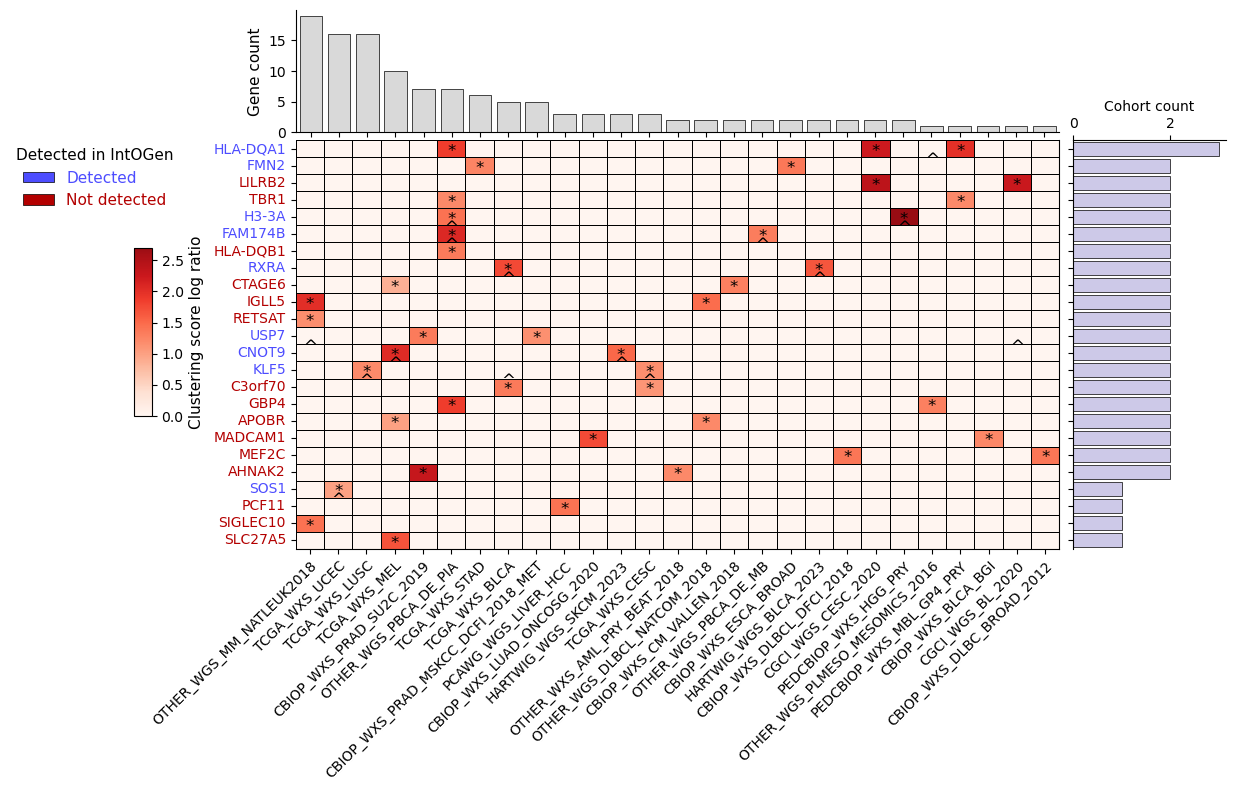

In [525]:
genetable_not_annot = genetable[(genetable["CGC"] == 0) & (genetable["Fish"] == 0)].reset_index(drop=True)
top_cohorts_n=150
top_genes_n=24

o3d_output = get_anomaly_df(genetable_not_annot, o3d_output_dir)
anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["Cohort"].values, 
                                                                          o3d_output["Clustering_score"].values)}

df_anomaly, _, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_not_annot, 
                                                      cohort_df, 
                                                      top_cohorts_n=top_cohorts_n, 
                                                      top_genes_n=top_genes_n, 
                                                      anomaly_dict=anomaly_dict)

df_binary, _, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(genetable_not_annot, 
                                                      cohort_df, 
                                                      top_cohorts_n=top_cohorts_n, 
                                                      top_genes_n=top_genes_n, 
                                                      anomaly_dict=False)

gene_colors, lut = get_intogen_annotation(df_binary, intogen_genes)
intogen_gene_by_cohort = get_intogen_genes_by_cohort(df_binary, intogen_df)

plot_landscape(df=df_binary, gene_colors=gene_colors, lut=lut, df_anomaly=df_anomaly,
               gene_hits_count=gene_hits_count, cohort_hits_count=cohort_hits_count,
               figsize=(12,7),
               width_ratios=[1, 0.2],
               height_ratios=[0.3, 1],
               legend_box=(-5.8, 1.0156),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.03, 
               hspace=0.03,
               cbar_loc=[-0.01, 0.3, 0.015, .24],
               intogen_label=True,
               intogen_label_table=intogen_gene_by_cohort,
               color_gene=True)

## Clustering score density plots

### TCGA

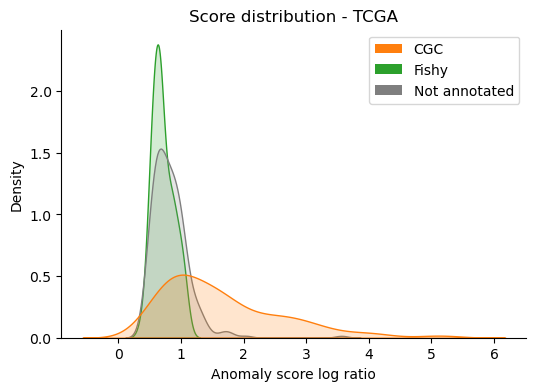

In [562]:
gene_colors, lut = get_gene_annotation(df_binary, genetable_subset)

# Get df with scores
o3d_output = get_anomaly_df(genetable_subset, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["Annotation"] = o3d_output.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)

## Plot 
plt.figure(figsize=(6, 4))
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], 'Not annotated': lut["Not annotated"]}
sns.kdeplot(data=o3d_output, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Add labels and a legend
plt.xlabel('Anomaly score log ratio')
plt.ylabel('Density')
plt.title("Score distribution - TCGA", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),
           mpatches.Patch(facecolor=lut["Not annotated"], label="Not annotated")]
plt.legend(handles=handles)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution_tcga.png", dpi=300, bbox_inches='tight')
plt.show()

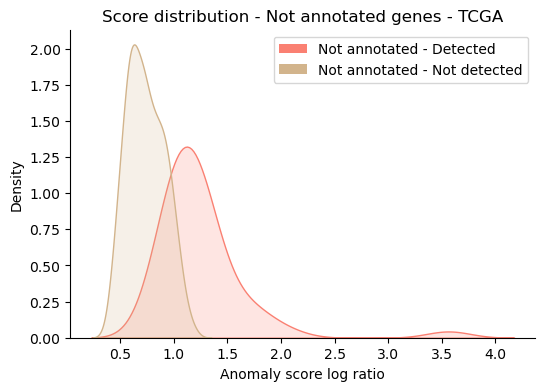

In [563]:
# Get df with scores
o3d_output = get_anomaly_df(genetable_subset, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[(o3d_output["CGC"] == 0) & (o3d_output["Fish"] == 0)]
o3d_output["Annotation"] = o3d_output["C_gene"]
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)

## Plot 
plt.figure(figsize=(6, 4))
palette = {1: "salmon", 0: "tan"}
sns.kdeplot(data=o3d_output, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Add labels and a legend
plt.xlabel('Anomaly score log ratio')
plt.ylabel('Density')
plt.title("Score distribution - Not annotated genes - TCGA", fontsize=12)

handles = [mpatches.Patch(facecolor="salmon", label="Not annotated - Detected"),
           mpatches.Patch(facecolor="tan", label="Not annotated - Not detected")]
plt.legend(handles=handles)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution_Not annotated_tcga.png", dpi=300, bbox_inches='tight')
plt.show()

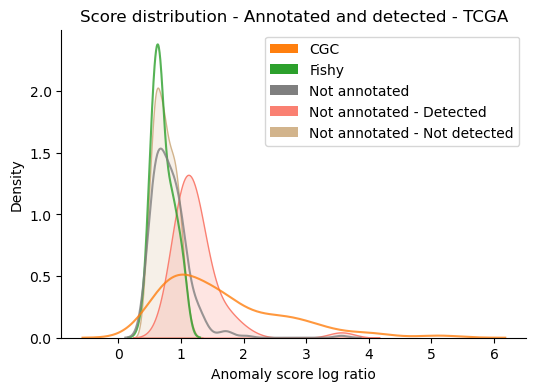

In [564]:
# Get df with scores with annotations
o3d_output = get_anomaly_df(genetable_subset, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output2 = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output2["Annotation"] = o3d_output2.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)

# Get df with scores of not annotated genes
o3d_output = get_anomaly_df(genetable_subset, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[(o3d_output["CGC"] == 0) & (o3d_output["Fish"] == 0)]
o3d_output["Annotation"] = o3d_output["C_gene"]
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["Annotation"] = o3d_output["Annotation"].map({1 : "Not annotated - Detected", 0 : "Not annotated - Not detected"})

# Concat
o3d_output = pd.concat((o3d_output, o3d_output2)).reset_index(drop=True)


## Plot 
plt.figure(figsize=(6, 4))
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], 'Not annotated': lut["Not annotated"], "Not annotated - Detected" : "salmon", "Not annotated - Not detected" : "tan"}
annotation_ix = (o3d_output["Annotation"] == "CGC") | (o3d_output["Annotation"] == "Fishy") | (o3d_output["Annotation"] == "Not annotated")
sns.kdeplot(data=o3d_output[~annotation_ix], x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2)
sns.kdeplot(data=o3d_output[annotation_ix], x='Clustering_score', hue='Annotation', fill=False, common_norm=False, palette=palette, alpha=0.8)

# Add labels and a legend
plt.xlabel('Anomaly score log ratio')
plt.ylabel('Density')
plt.title("Score distribution - Annotated and detected - TCGA", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),
           mpatches.Patch(facecolor=lut["Not annotated"], label="Not annotated"),
           mpatches.Patch(facecolor="salmon", label="Not annotated - Detected"),
           mpatches.Patch(facecolor="tan", label="Not annotated - Not detected")]
plt.legend(handles=handles)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution_annotated_detected_tcga.png", dpi=300, bbox_inches='tight')
plt.show()

### All cohorts

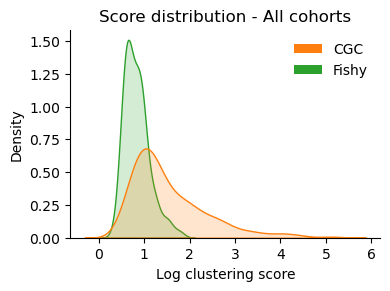

In [241]:
## Score distribution - CGC & Fishy - All cohorts

gene_colors, lut = get_gene_annotation(df_binary, genetable)

# Get df with scores
o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["Annotation"] = o3d_output.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)
o3d_output = o3d_output[o3d_output["Annotation"] != "Not annotated"]

# Plot
plt.figure(figsize=(4, 2.7))
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], 'Not annotated': lut["Not annotated"]}
sns.kdeplot(data=o3d_output, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Add labels and a legend
plt.xlabel('Log clustering score')
plt.ylabel('Density')
plt.title("Score distribution - All cohorts", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),]
           #mpatches.Patch(facecolor=lut["Not annotated"], label="Not annotated")]
plt.legend(handles=handles, frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

/tmp/jobs/spellegrini/9964934/ipykernel_20268/190091801.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o3d_output_noannot["Annotation"] = o3d_output_noannot["C_gene"]


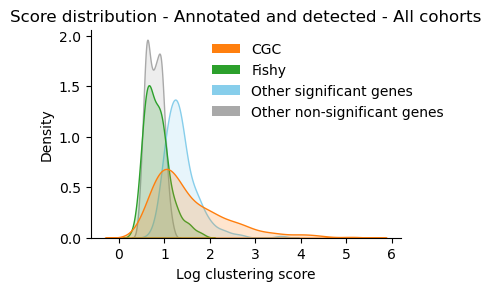

In [242]:
## Score distribution - Annotated and detected - All cohorts

# Get df with scores with annotations
o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])

o3d_output_annot = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output_annot["Annotation"] = o3d_output_annot.apply(lambda x: "CGC" if x["CGC"] == 1 else "Fishy" if x["Fish"] == 1 else "Not annotated", axis=1)
o3d_output_annot = o3d_output_annot[o3d_output_annot["Annotation"] != "Not annotated"]

# Get df with scores of not annotated genes
o3d_output_noannot = o3d_output[(o3d_output["CGC"] == 0) & (o3d_output["Fish"] == 0)]
o3d_output_noannot["Annotation"] = o3d_output_noannot["C_gene"]
o3d_output_noannot = o3d_output_noannot[o3d_output_noannot["qval"] < 1].reset_index(drop=True)
o3d_output_noannot["Annotation"] = o3d_output_noannot["Annotation"].map({1 : "Other significant genes", 0 : "Other non significant genes"})

o3d_output2 = pd.concat((o3d_output_annot, o3d_output_noannot)).reset_index(drop=True)


## Plot 
plt.figure(figsize=(4, 2.7))
palette = {'CGC': lut["CGC"], 'Fishy': lut["Fishy"], "Other significant genes" : "skyblue", "Other non significant genes" : "darkgray"}
# annotation_ix = (o3d_output["Annotation"] == "CGC") | (o3d_output["Annotation"] == "Fishy") | (o3d_output["Annotation"] == "Not annotated")
sns.kdeplot(data=o3d_output2, x='Clustering_score', hue='Annotation', fill=True, common_norm=False, palette=palette, alpha=0.2)
# sns.kdeplot(data=o3d_output[annotation_ix], x='Clustering_score', hue='Annotation', fill=False, common_norm=False, palette=palette, alpha=0.8)

# Add labels and a legend
plt.xlabel('Log clustering score')
plt.ylabel('Density')
plt.title("Score distribution - Annotated and detected - All cohorts", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["CGC"], label="CGC"),
           mpatches.Patch(facecolor=lut["Fishy"], label="Fishy"),
           mpatches.Patch(facecolor="skyblue", label="Other significant genes"),
           mpatches.Patch(facecolor="darkgray", label="Other non-significant genes")]
plt.legend(handles=handles, bbox_to_anchor=[0,0,1.18,1], frameon=False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution_annotated_detected.png", dpi=300, bbox_inches='tight')
plt.show()

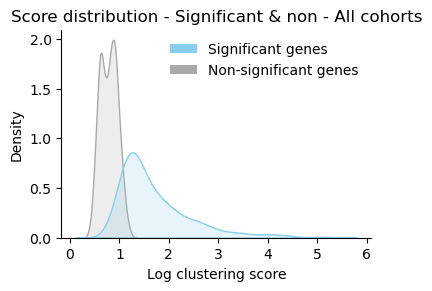

In [243]:
## Score distribution - Significant & non-significant - All cohorts

gene_colors, lut = get_gene_annotation(df_binary, genetable)

# Get df with scores
o3d_output = get_anomaly_df(genetable, o3d_output_dir)
o3d_output["Clustering_score"] = np.log(o3d_output["Clustering_score"])
o3d_output = o3d_output[o3d_output["qval"] < 1].reset_index(drop=True)
o3d_output["C_gene"] = o3d_output["C_gene"].map({1 : "Significant", 0 : "Non-significant"})

# Plot
plt.figure(figsize=(4, 2.7))
palette = {'Significant': "skyblue", 'Non-significant': "darkgray"}
sns.kdeplot(data=o3d_output, x='Clustering_score', hue='C_gene', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Add labels and a legend
plt.xlabel('Log clustering score')
plt.ylabel('Density')
plt.title("Score distribution - Significant & non - All cohorts", fontsize=12)

handles = [mpatches.Patch(facecolor="skyblue", label="Significant genes"),
           mpatches.Patch(facecolor="darkgray", label="Non-significant genes"),]
           #mpatches.Patch(facecolor=lut["Not annotated"], label="Not annotated")]
plt.legend(handles=handles, frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("score_distribution_significant_nonsignificant.png", dpi=300, bbox_inches='tight')
plt.show()

## Highlight some interesting cases

In [369]:
def int_lst_from_str(str_lst):
    
    numbers = re.findall(r'\d+', str_lst)
    
    return np.array([int(num) for num in numbers])


def get_pos_clust_freq(gene_df, pos):

    tot_count = len(gene_df)
    count = sum([pos in gene_df.iloc[i].C_pos for i in range(tot_count)])
    
    return count / tot_count


def get_gene_clust_conservation(anomaly_df, gene):
    
    # Get df with cluster pos as list
    df = anomaly_df.copy()
    df = df[df["C_gene"] == 1]
    df = df[df["Gene"] == gene]
    df["C_pos"] = df.apply(lambda x: int_lst_from_str(x["C_pos"]), axis=1)
    
    # Get conservation of each cluster pos
    cluster_pos = np.sort(np.unique(np.concatenate(df["C_pos"].values)))
    final_df = pd.DataFrame({"Pos" : cluster_pos})
    print("Cohorts:", len(df))
    final_df["clusters_conservation"] = final_df.apply(lambda x: get_pos_clust_freq(df, x["Pos"]), axis=1)
    
    return final_df


def write_defattr_file(file_path, gene, uni_id, df, attr_name="clusters_conservation"):

    header = f"""#
#  Cluster conservation for {uni_id} ({gene})
#
#  Use this file to assign the attribute in Chimera with the 
#  Define Attribute tool or the command defattr.
#"""

    with open(file_path, "w") as file:
        # Write the data to the file
        file.write(header)

    with open(file_path, "a") as file:
        file.write(f"\nattribute: {attr_name}")
        file.write("\nrecipient: residues")

        for res, attr in zip(df["Pos"], df[attr_name]):
            file.write('\n\t:' + str(res) + '\t' + str(attr))

In [370]:
gene = "IDH1"
df = get_anomaly_df(genetable, o3d_output_dir)

uni_id = df[df["Gene"] == gene].Uniprot_ID.unique()[0]
print("\n>", gene, uni_id)
gene_conservation = get_gene_clust_conservation(df, gene)
gene_conservation["Pos"].values


> IDH1 O75874
Cohorts: 10


array([132])

In [1503]:
gene_conservation

Pos  Conservation
0  132           1.0

In [371]:
for gene in ["PIK3CA", "MUC6", "BRAF", "KRAS", "TP53", "CTNNB1", "EGFR", "NFE2L2", "MUC6"]:

    df = get_anomaly_df(genetable, o3d_output_dir)

    uni_id = df[df["Gene"] == gene].Uniprot_ID.unique()[0]
    print("\n>", gene, uni_id)
    gene_conservation = get_gene_clust_conservation(df, gene)
    display(gene_conservation)

    file_path = f"{gene}_clusters_conservation.defattr"
    write_defattr_file(file_path, gene, uni_id, gene_conservation)


> PIK3CA P42336
Cohorts: 37


Pos  clusters_conservation
0      9               0.027027
1     38               0.108108
2     39               0.054054
3     69               0.027027
4     81               0.054054
5     83               0.027027
6     88               0.108108
7     90               0.027027
8     93               0.108108
9    104               0.054054
10   106               0.081081
11   107               0.027027
12   108               0.081081
13   111               0.081081
14   112               0.027027
15   115               0.081081
16   118               0.054054
17   344               0.108108
18   345               0.108108
19   378               0.054054
20   420               0.027027
21   449               0.027027
22   453               0.027027
23   471               0.027027
24   538               0.027027
25   539               0.135135
26   542               0.891892
27   545               0.972973
28   546               0.567568
29   547               0.027027
30   548               0.027027
31   549               0.027027
32   600               0.054054
33   905               0.027027
34   909               0.027027
35   956               0.027027
36  1037               0.027027
37  1040               0.054054
38  1043               0.324324
39  1044               0.108108
40  1045               0.027027
41  1047               0.513514
42  1048               0.027027
43  1049               0.243243
44  1052               0.027027


> MUC6 Q6W4X9
Cohorts: 10


Pos  clusters_conservation
0  213                    1.0


> BRAF P15056
Cohorts: 17


Pos  clusters_conservation
0   464               0.058824
1   466               0.117647
2   469               0.117647
3   501               0.117647
4   574               0.117647
5   581               0.176471
6   594               0.470588
7   596               0.176471
8   597               0.411765
9   600               1.000000
10  601               0.411765
11  602               0.058824
12  604               0.058824


> KRAS P01116
Cohorts: 32


Pos  clusters_conservation
0    12                1.00000
1    13                0.84375
2    14                0.09375
3    16                0.03125
4    18                0.06250
5    19                0.09375
6    22                0.03125
7    34                0.09375
8    58                0.03125
9    59                0.18750
10   60                0.06250
11   61                0.84375
12   62                0.06250
13   63                0.12500
14   64                0.06250
15   65                0.03125
16  117                0.06250
17  146                0.06250


> TP53 P04637
Cohorts: 68


Pos  clusters_conservation
0     95               0.014706
1    105               0.132353
2    106               0.044118
3    107               0.058824
4    109               0.044118
..   ...                    ...
131  287               0.044118
132  289               0.014706
133  331               0.014706
134  334               0.029412
135  337               0.029412

[136 rows x 2 columns]


> CTNNB1 P35222
Cohorts: 18


Pos  clusters_conservation
0    29               0.055556
1    31               0.055556
2    32               0.888889
3    33               0.888889
4    34               0.944444
5    35               0.222222
6    36               0.222222
7    37               0.777778
8    41               0.333333
9    45               0.277778
10  333               0.055556
11  335               0.055556


> EGFR P00533
Cohorts: 9


Pos  clusters_conservation
0    62               0.222222
1    63               0.111111
2    84               0.222222
3   108               0.444444
4   252               0.222222
5   254               0.111111
6   256               0.222222
7   263               0.333333
8   270               0.111111
9   289               0.444444
10  596               0.111111
11  598               0.222222
12  608               0.111111
13  620               0.111111
14  624               0.111111
15  628               0.111111
16  718               0.111111
17  719               0.111111
18  724               0.111111
19  750               0.111111
20  751               0.111111
21  752               0.111111
22  753               0.111111
23  769               0.111111
24  790               0.111111
25  796               0.111111
26  797               0.111111
27  833               0.111111
28  834               0.222222
29  835               0.111111
30  857               0.111111
31  858               0.555556
32  861               0.222222


> NFE2L2 Q16236
Cohorts: 12


Pos  clusters_conservation
0    24               0.583333
1    26               0.250000
2    27               0.166667
3    28               0.166667
4    29               0.666667
5    30               0.250000
6    31               0.583333
7    32               0.083333
8    34               0.500000
9    77               0.416667
10   79               0.666667
11   80               0.500000
12   81               0.666667
13   82               0.666667


> MUC6 Q6W4X9
Cohorts: 10


Pos  clusters_conservation
0  213                    1.0

In [1475]:
!ls

BRAF_clusters_conservation.defattr    landscape.ipynb
CTNNB1_clusters_conservation.defattr  NFE2L2_clusters_conservation.defattr
EGFR_clusters_conservation.defattr    TP53_clusters_conservation.defattr
KRAS_clusters_conservation.defattr    tp53_clusters_conservation_tcga.defattr


In [1478]:
!cat TP53_clusters_conservation.defattr | head

#
#  Cluster conservation for P04637 (TP53)
#
#  Use this file to assign the attribute in Chimera with the 
#  Define Attribute tool or the command defattr.
#
attribute: clusters_conservation
recipient: residues
	:95	0.014705882352941176
	:105	0.1323529411764706


## Show clusters in one protein-tissue

In [13]:
gene = "CTNNB1"
df = get_anomaly_df(genetable, o3d_output_dir)

uni_id = df[df["Gene"] == gene].Uniprot_ID.unique()[0]
print("\n>", gene, uni_id)
gene_conservation = get_gene_clust_conservation(df, gene)
gene_conservation["Pos"].values


> CTNNB1 P35222
Cohorts: 18


array([ 29,  31,  32,  33,  34,  35,  36,  37,  41,  45, 333, 335])

In [22]:
df[(df["Cohort"] == "TCGA_WXS_STAD") & (df["Gene"] == "CTNNB1")]

Cohort    Gene Uniprot_ID  qval  C_gene          C_pos  \
61111  TCGA_WXS_STAD  CTNNB1     P35222   0.0     1.0  [34 32 33 37]   

       Anomaly_score  CGC  Fish  
61111       4.839807    1     0

In [39]:
df = pd.read_csv(f"{o3d_output_dir}/TCGA_WXS_STAD.3d_clustering_pos.csv")
df = df[df["Gene"] == "CTNNB1"].iloc[:,:15]
df

Gene Uniprot_ID  F  Pos  Mut_in_gene  Mut_in_res  Mut_in_vol  \
2480  CTNNB1     P35222  1   34           15           3          10   
2481  CTNNB1     P35222  1   32           15           2           6   
2482  CTNNB1     P35222  1   33           15           1           6   
2483  CTNNB1     P35222  1   37           15           4           4   
2484  CTNNB1     P35222  1   84           15           1           1   
2485  CTNNB1     P35222  1  339           15           1           1   
2486  CTNNB1     P35222  1  123           15           1           1   
2487  CTNNB1     P35222  1  575           15           1           1   
2488  CTNNB1     P35222  1  622           15           1           1   

      Obs_anomaly  Ratio_obs_sim    pval  C  C_ext  Cluster  Rank  Tot_samples  
2480     0.553665       4.839807  0.0000  1    0.0      0.0     0           13  
2481     0.282225       2.723132  0.0000  1    0.0      0.0     1           13  
2482     0.282217       2.914884  0.0000  1    0.0      0.0     2           13  
2483     0.168252       1.832283  0.0023  1    0.0      1.0     3           13  
2484     0.025071       0.284954  1.0000  0    NaN      NaN     4           13  
2485     0.021566       0.255591  1.0000  0    NaN      NaN     5           13  
2486     0.021445       0.264853  1.0000  0    NaN      NaN     6           13  
2487     0.018637       0.238560  1.0000  0    NaN      NaN     7           13  
2488     0.018302       0.242417  1.0000  0    NaN      NaN     8           13

In [48]:
df_attr = df[["Pos", "Ratio_obs_sim"]].reset_index(drop=True)
df_attr["Ratio_obs_sim"] = np.log(df_attr["Ratio_obs_sim"])
df_attr = df_attr.rename(columns={"Ratio_obs_sim" : "log_ratio_obs_sim"})
df_attr

Pos  log_ratio_obs_sim
0   34           1.576875
1   32           1.001783
2   33           1.069830
3   37           0.605563
4   84          -1.255427
5  339          -1.364177
6  123          -1.328581
7  575          -1.433134
8  622          -1.417094

In [49]:
file_path = f"ctnnb1_log_ratio_obs_sim.defattr"
write_defattr_file(file_path, gene, uni_id, df_attr, "log_ratio_obs_sim")

# CH

In [263]:
def plot_landscape(df, gene_colors, lut, 
                   df_anomaly=None,
                   figsize=(16,14),
                   width_ratios=[1, 0.2],
                   height_ratios=[0.3, 1],
                   legend_box=(-5.5, 1.02),
                   ax1_margin=0.005,
                   ax4_margin=0.005,
                   wspace=0.02, 
                   hspace=0.05,
                   cbar_loc=[-0.01, 0.2, 0.02, .3],
                   filename="landscape_heatmap_tcga.png"):
    
    if df_anomaly is not None:
        df_binary = df
        df = df_anomaly
        cmap = "OrRd"
        cmap = create_custom_colormap()
    else:
        colors = ["lightgray", "gray"] 
        cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

    # Define the row and column labels
    row_labels = df.index
    col_labels = df.columns
    #col_labels = [ctype_dict[cohort] for cohort  in col_labels]

    gene_sums = gene_hits_count["Oncodrive3D"].values
    cohort_sums = cohort_hits_count["Oncodrive3D"].values

    # Create a figure with a grid layout for heatmap and bars
    fig, ax = plt.subplots(2, 2, figsize=figsize, gridspec_kw={'width_ratios': width_ratios, 'height_ratios': height_ratios})
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,1]

    # Create the heatmap
    sns.heatmap(df, annot=False, cmap=cmap, cbar=False, xticklabels=col_labels, yticklabels=row_labels, ax=ax3, lw=1, linecolor="black")
    ax3.set_xticklabels(col_labels, rotation=45, rotation_mode="anchor", ha='right') 
    ax3.set_xlabel("Cohort")
    ax3.set_ylabel("Gene")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['right'].set_visible(True)
    for i, label in enumerate(ax3.get_yticklabels()):
        label.set_color(gene_colors[i])

    # Add bars for the top axis
    ax4.barh(np.arange(len(gene_sums)), gene_sums, color='#cdc9e8', edgecolor="black")
    ax4.set_yticks(np.arange(len(gene_sums)))
    ax4.set_yticklabels([])
    ax4.set_xlabel("Cohort count")
    ax4.invert_yaxis()

    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top')
    ax4.spines['bottom'].set_visible(False)
    ax4.spines['right'].set_visible(False)

    # Add bars for the right axis
    row_sums = np.sum(df, axis=1)
    ax1.bar(np.arange(len(cohort_sums)), cohort_sums, color='#ffddb3', edgecolor="black")
    ax1.set_xticks(np.arange(len(cohort_sums)))
    ax1.set_ylabel("Gene count")
    ax1.set_xticklabels([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Details
    ax2.remove()
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    ax1.margins(x=ax1_margin, tight=True)
    ax4.margins(y=ax4_margin, tight=True)

    handles, labels = ax3.get_legend_handles_labels()
    handles.append(mpatches.Patch(facecolor=lut["CGC"], edgecolor="black", label='CGC', lw=0.5))
    handles.append(mpatches.Patch(facecolor=lut["Fishy"], edgecolor="black", label="Fishy", lw=0.5))
    handles.append(mpatches.Patch(facecolor="#bfbfbf", edgecolor="black", label="Not annotated", lw=0.5))
    legend = plt.legend(handles=handles, bbox_to_anchor=legend_box, frameon=False, 
                        title="Gene annotation", title_fontsize=11, fontsize=11)
    for text in legend.get_texts():
        text.set_color(lut[text.get_text()])
    
    if df_anomaly is not None:
        # Set cbar
        cbar_ax = fig.add_axes(cbar_loc) 
        cbar = fig.colorbar(ax3.collections[0], cax=cbar_ax)
        cbar.set_label('Anomaly score log ratio', fontsize=11) 
        
        # Overlay stars on top of the heatmap
        for i in range(len(row_labels)):
            for j in range(len(col_labels)):
                if df_binary.iloc[i, j] == 1:
                    ax3.text(j + 0.5, i + 0.65, '*', ha='center', va='center', fontsize=12, color='black')

    ax1.remove()
    ax4.remove()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [188]:
!ls /workspace/projects/clustering_3d/evaluation/genetables_dir/run_20230512_ch

OTHER_WGS_HMF_FULL.genetable.tsv	 OTHER_WXS_TCGA_FULL.genetable.tsv
OTHER_WXS_CH_IMPACT_PANEL.genetable.tsv


In [189]:
genetables_path = "/workspace/projects/clustering_3d/evaluation/genetables_dir/run_20230512_ch/OTHER_WXS_CH_IMPACT_PANEL.genetable.tsv"
df = pd.read_csv(genetables_path, sep="\t")
df = df.rename(columns={"3dclust_pval" : "o3d_pval",
                       "3dclust_qval" : "o3d_qval",
                       "3dclust_rank" : "o3d_rank",
                       "Fishy_Genes" : "Fish"})
df = df.drop(columns=["CGC"]).rename(columns={"CH" : "CGC"})
df["Cohort"] = "OTHER_WXS_CH_IMPACT_PANEL"

RUN = "run_20230512_ch"
datasets = "/workspace/projects/clustering_3d/o3d_analysys/datasets"
o3d_output_dir = "/workspace/projects/clustering_3d/o3d_analysys/datasets/output/ch/o3d_output/run_20230512_ch/results"

In [192]:
cohort_df = pd.DataFrame({"COHORT" : ["OTHER_WXS_CH_IMPACT_PANEL"], 
                          "MUTATIONS" : [10000], 
                          "SAMPLES" : [1000]})

top_cohorts_n=1
top_genes_n=30

o3d_output = get_anomaly_df(df, o3d_output_dir)
anomaly_dict = {f"{gene}-{cohort}" : score for gene, cohort, score in zip(o3d_output["Gene"].values, 
                                                                          o3d_output["Cohort"].values, 
                                                                          o3d_output["Clustering_score"].values)}

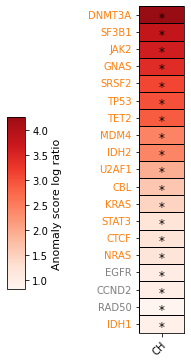

In [193]:
df_anomaly, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(df, 
                                                                                  cohort_df, 
                                                                                  top_cohorts_n=top_cohorts_n, 
                                                                                  top_genes_n=top_genes_n, 
                                                                                  anomaly_dict=anomaly_dict)

df_binary, hits_df, gene_hits_count, cohort_hits_count = get_gene_cohorts_binary(df, 
                                                                                 cohort_df, 
                                                                                 top_cohorts_n=top_cohorts_n, 
                                                                                 top_genes_n=top_genes_n, 
                                                                                 anomaly_dict=False)

df_binary.columns = [cohort.split("_")[2] for cohort in df_binary.columns]
df_anomaly.columns = [cohort.split("_")[2] for cohort in df_anomaly.columns]
gene_colors, lut = get_gene_annotation(df_binary, df)

plot_landscape(df=df_binary, gene_colors=gene_colors, lut=lut, df_anomaly=df_anomaly,
               figsize=(1,8),
               width_ratios=[1, 0.2],
               height_ratios=[0.3, 1],
               legend_box=(-10.5, 0.95),
               ax1_margin=0.005,
               ax4_margin=0.005,
               wspace=0.03, 
               hspace=0.05,
               cbar_loc=[-1.7, 0.2, 0.25, .3],
               filename="landscape_heatmap_ch.png")

# Mouse

In [283]:
genetables_path = "/workspace/projects/clustering_3d/evaluation/tool_output/run_20230608_mouse/Liver_strelka_2017.3d_clustering_genes.csv"
genetables_path

'/workspace/projects/clustering_3d/evaluation/tool_output/run_20230608_mouse/Liver_strelka_2017.3d_clustering_genes.csv'

In [284]:
df = pd.read_csv(genetables_path)
df = df[df["qval"] < 0.01]
df = df[["Gene", "Score_obs_sim_top_vol"]].set_index("Gene")
max_value = df.values[np.isfinite(df.values)].max()
df.replace([np.inf, -np.inf], max_value * 2, inplace=True)
df = np.log(df)
df

Ratio_obs_sim_top_vol
Gene                                
Hras                        5.200429
Braf                        4.507282
H2-M5                       4.181026
Nrcam                       4.026246
Ncl                         3.545151
Itga9                       3.314650
Nkx2-5                      3.080942
Olfr1242                    2.865297
Egfr                        2.791804
Gm5134                      2.790034
Oaf                         2.687669
Rdh10                       2.540607
9530002B09Rik               2.531061
Chd5                        2.478544
Fam126b                     2.426056
Zfp184                      2.238610
Pbp2                        2.072148
Kras                        2.037784
Olfr945                     2.000847
Ccdc9                       1.902428
Gm20721                     1.865102
Rap1gap                     1.842599
Mylk                        1.839614
Unk                         1.818758
Tdrd6                       1.793359
Mab21l4                     1.764456
Zmynd10                     1.658111
Plcl1                       1.469585
Vmn2r74                     1.394370
St8sia3                     1.289419
Soat2                       1.260621
Ebf3                        1.250487
Saxo1                       1.229132
Evpl                        1.222975
Tnc                         1.166462
Txk                         1.141845
Tepsin                      1.130674
Angel2                      1.123802
Ankrd63                     1.119855
Bpifb5                      1.092903
Rps25                       1.066693
Nol6                        1.010233
Lrfn5                       0.998239
Ifi47                       0.991459
Npas1                       0.980945
Pdxdc1                      0.980442
Ccdc178                     0.979058
Krt77                       0.976469
Dot1l                       0.969957
Sh2d3c                      0.964840
Vmn2r22                     0.964778
Ccdc54                      0.962734
Adamtsl3                    0.925541
Pum1                        0.911668
Ccdc33                      0.899077
Scn1a                       0.869858
Nbas                        0.862043
Zswim4                      0.789646

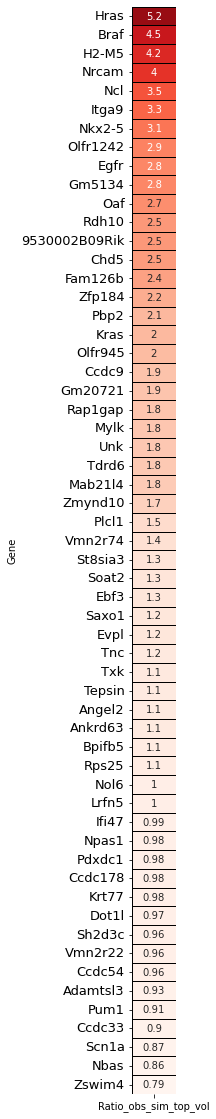

In [313]:
fig = plt.figure(figsize=(0.8,20))
sns.heatmap(df, annot=True, cmap=cmap, cbar=False, lw=1, linecolor="black")
plt.yticks(fontsize=13)

plt.savefig("landscape_mouse.png", dpi=300, bbox_inches='tight')
plt.show()

# Clusters solvent accessibility and more

In [245]:
import os
from tqdm.notebook import tqdm

o3d_datasets = "/workspace/nobackup/scratch/oncodrive3d/datasets_mane_240506"
cohort_df = pd.read_csv(f"{datasets}/cohorts.tsv", sep="\t")
seq_df = pd.read_csv(f"{o3d_datasets}/seq_for_mut_prob.tsv", sep="\t")
gene_to_uni_id_dict = {gene : uni_id for gene, uni_id in seq_df[["Gene", "Uniprot_ID"]].values}
plddt = pd.read_csv(f"{o3d_datasets}/confidence.tsv", sep="\t")
plddt = plddt[["Uniprot_ID", "Confidence"]]
pacc = pd.read_csv("/workspace/nobackup/scratch/oncodrive3d/annotations_mane_240506/pdb_tool_df.tsv", sep="\t")
pacc = pacc[["Uniprot_ID", "pACC"]]
intogen_df = pd.read_csv("/workspace/projects/clustering_3d/o3d_analysys/datasets/output/cancer_202404/intogen_output/drivers.tsv", sep="\t")

### Retrieve cluster mean of pACC and other metrics

In [770]:
%%time

lst_result = []
for cohort in cohort_df.COHORT:
    if not cohort.startswith("ICGC"):
        gene_df_path = f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_genes.csv"
        res_df_path = f"{o3d_output_dir}/{cohort}/{cohort}.3d_clustering_pos.csv"
        
        if os.path.isfile(gene_df_path) and os.path.isfile(res_df_path):
            gene_df = pd.read_csv(gene_df_path)
            res_df = pd.read_csv(res_df_path)

            hits = gene_df[gene_df["C_gene"] == 1]
            hits = hits["Gene"].values

            for gene in hits:
                print(cohort, gene)
                hits_res = res_df[(res_df["Gene"] == gene) & (res_df["C"] == 1)]
                plddt_gene = plddt[plddt["Uniprot_ID"] == gene_to_uni_id_dict[gene]]
                plddt_gene = plddt_gene.Confidence
                pacc_gene = pacc[pacc["Uniprot_ID"] == gene_to_uni_id_dict[gene]]
                pacc_gene = pacc_gene.pACC
                mean_values = hits_res.groupby("Cluster").apply(lambda x: lst_result.append((cohort, gene,
                                                                                             intogen_df[intogen_df["SYMBOL"] == gene].ROLE.unique()[0] 
                                                                                             if len(intogen_df[intogen_df["SYMBOL"] == gene].ROLE.unique()) > 0 
                                                                                             else "NA",
                                                                                             x.Cluster.unique()[0], x.Pos.values, 
                                                                                             np.mean(plddt_gene.iloc[x.Pos.values - 1]), 
                                                                                             np.mean(pacc_gene.iloc[x.Pos.values - 1]),
                                                                                             np.mean(x.PAE_vol))))

cluster_info = pd.DataFrame(lst_result, columns=["Cohort", "Gene", "Gene_action", "Cluster", "Pos", "pLDDT", "pACC", "PAE"])
cluster_info = cluster_info[cluster_info["Gene_action"] != "ambiguous"]
cluster_info

Cohort    Gene Gene_action  Cluster  \
0    HARTWIG_WGS_BLCA_2023  PIK3CA         Act      0.0   
1    HARTWIG_WGS_BLCA_2023    RXRA         Act      0.0   
2    HARTWIG_WGS_BLCA_2023   FGFR3         Act      0.0   
3    HARTWIG_WGS_BLCA_2023   FGFR3         Act      1.0   
4    HARTWIG_WGS_BLCA_2023   FBXW7         Act      0.0   
..                     ...     ...         ...      ...   
925   TCGA_WXS_SOFT_TISSUE    TP53         LoF      2.0   
926   TCGA_WXS_SOFT_TISSUE    TP53         LoF      3.0   
927          TCGA_WXS_PGNG    HRAS         Act      0.0   
928          TCGA_WXS_PGNG    HRAS         Act      1.0   
929          TCGA_WXS_PGNG   EPAS1         Act      0.0   

                                     Pos      pLDDT       pACC       PAE  
0                        [542, 545, 539]  93.733333  51.666667  0.841270  
1                             [427, 429]  97.750000  22.000000  0.500000  
2                             [248, 249]  53.510000  30.000000  0.850000  
3                                  [373]  65.940000  72.000000  0.000000  
4                             [505, 465]  98.680000  13.000000  0.500000  
..                                   ...        ...        ...       ...  
925  [273, 275, 272, 270, 132, 281, 278]  98.231429   7.857143  0.798923  
926                 [158, 156, 220, 203]  97.357500  16.250000  0.825893  
927                                 [13]  94.820000  36.000000  4.444444  
928                                 [61]  85.100000  34.000000  0.000000  
929                      [531, 530, 532]  52.330000  79.666667  1.000000  

[930 rows x 8 columns]

### Plot distributions

In [726]:
df_info_na = cluster_info[cluster_info["Gene_action"] == "NA"].groupby("Gene").apply(lambda x: (len(x.Cohort.unique()), len(x)))
pd.DataFrame(df_info_na.tolist(), index=df_info_na.index, columns=["# cohorts", "# clusters"]).sort_values("# clusters", ascending=False)[:30]

# cohorts  # clusters
Gene                           
IGLL5             2          14
EGR1              1           4
AHNAK2            2           3
OR5H14            2           2
ESX1              2           2
TBR1              2           2
GBP4              2           2
HLA-DQB1          2           2
RETSAT            2           2
CTAGE6            2           2
COL21A1           1           2
C3orf70           2           2
PLXNB1            1           2
ZAN               1           2
CDC27             1           2
SLC27A5           1           2
MADCAM1           2           2
APOBR             2           2
ANKRD30A          1           2
LILRB2            2           2
ZNF780B           1           2
MEF2C             2           2
SIGLEC10          1           1
SH3RF3            1           1
NBPF3             1           1
NDUFS1            1           1
NPEPPS            1           1
SEL1L2            1           1
SCEL              1           1
RIMS4             1           1

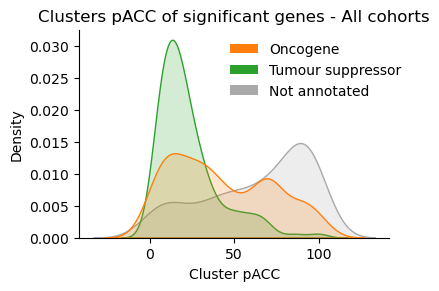

In [785]:
lut = {"Act": '#ff7f0e', 
       "LoF": '#2ca02c',
       "ambiguous" : "#b300b2",
       "NA": 'darkgray'}

## Plot 
plt.figure(figsize=(4, 2.7))
palette = {'Act': '#ff7f0e', 'LoF': '#2ca02c', "ambiguous" : "#b300b2", 'NA': 'darkgray'}
sns.kdeplot(data=cluster_info, x='pACC', hue='Gene_action', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Add labels and a legend
plt.xlabel('Cluster pACC')
plt.ylabel('Density')
plt.title("Clusters pACC of significant genes - All cohorts", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["Act"], label="Oncogene"),
           mpatches.Patch(facecolor=lut["LoF"], label="Tumour suppressor"),
           mpatches.Patch(facecolor=lut["NA"], label="Not annotated")]
plt.legend(handles=handles, frameon=False, bbox_to_anchor=[0,0,1.08,1])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.savefig("pacc_cluster_distribution_by_action.png", dpi=300, bbox_inches='tight')
plt.show()

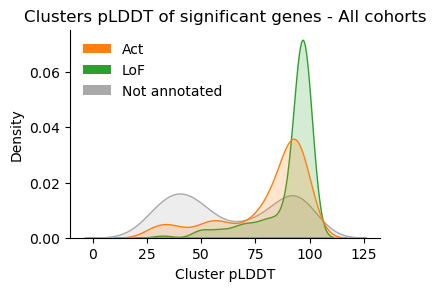

In [779]:
lut = {"Act": '#ff7f0e', 
       "LoF": '#2ca02c',
       "ambiguous" : "#b300b2",
       "NA": 'darkgray'}

## Plot 
plt.figure(figsize=(4, 2.7))
palette = {'Act': '#ff7f0e', 'LoF': '#2ca02c', "ambiguous" : "#b300b2", 'NA': 'darkgray'}
sns.kdeplot(data=cluster_info, x='pLDDT', hue='Gene_action', fill=True, common_norm=False, palette=palette, alpha=0.2)

# Add labels and a legend
plt.xlabel('Cluster pLDDT')
plt.ylabel('Density')
plt.title("Clusters pLDDT of significant genes - All cohorts", fontsize=12)

handles = [mpatches.Patch(facecolor=lut["Act"], label="Act"),
           mpatches.Patch(facecolor=lut["LoF"], label="LoF"),
           mpatches.Patch(facecolor=lut["NA"], label="Not annotated")]
plt.legend(handles=handles, loc="upper left", frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("plddt_cluster_distribution_by_action.png", dpi=300, bbox_inches='tight')
plt.show()

/tmp/jobs/spellegrini/9964934/ipykernel_1413/1621273303.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=cluster_info, x='PAE', fill=True, common_norm=False, palette=palette, alpha=0.2, color="skyblue")


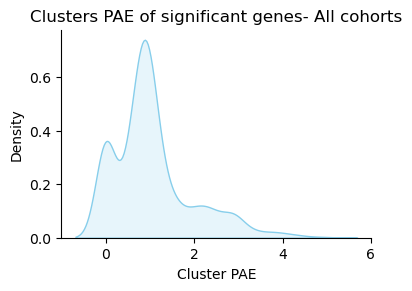

In [794]:
lut = {"Act": '#ff7f0e', 
       "LoF": '#2ca02c',
       "ambiguous" : "#b300b2",
       "NA": '#7f7f7f'}

# ## Plot 
# plt.figure(figsize=(6, 4))
# palette = {'Act': '#ff7f0e', 'LoF': '#2ca02c', "ambiguous" : "#b300b2", 'NA': '#7f7f7f'}
# sns.kdeplot(data=cluster_info, x='PAE', hue='Gene_action', fill=True, common_norm=False, palette=palette, alpha=0.2)

# # Add labels and a legend
# plt.xlabel('Cluster PAE')
# plt.ylabel('Density')
# plt.title("Clusters PAE of significant genes - All cohorts", fontsize=12)

# handles = [mpatches.Patch(facecolor=lut["Act"], label="Act"),
#            mpatches.Patch(facecolor=lut["LoF"], label="LoF"),
#            mpatches.Patch(facecolor=lut["ambiguous"], label="ambiguous"),
#            mpatches.Patch(facecolor=lut["NA"], label="NA")]
# plt.legend(handles=handles)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.savefig("pae_cluster_distribution_by_action.png", dpi=300, bbox_inches='tight')
# plt.show()

## Plot 
plt.figure(figsize=(4, 2.7))
#palette = {'Act': lut["Act"], 'LoF': lut["LoF"], "ambiguous" : lut["ambiguous"], 'NA': lut["NA"]}
sns.kdeplot(data=cluster_info, x='PAE', fill=True, common_norm=False, palette=palette, alpha=0.2, color="skyblue")

# Add labels and a legend
plt.xlabel('Cluster PAE')
plt.ylabel('Density')
plt.title("Clusters PAE of significant genes- All cohorts", fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("pae_cluster_distribution.png", dpi=300, bbox_inches='tight')
plt.show()